### Bank Credit Risk Case Study ###

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study

#### Problem Statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
 
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 The data given contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
 
**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

**All other cases:** All other cases when the payment is paid on time.

 When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
1. Approved: The Company has approved loan Application
2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.
3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
4. Unused offer:  Loan has been cancelled by the client but at different stages of the process.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency to default to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.


#### Importing the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

## Read in the Data set. 

In [3]:
#read the file 'previous_application.csv' with header
df_previous_application=pd.read_csv('previous_application.csv')

In [4]:
#read the file 'application_data.csv' with header
df_application_data=pd.read_csv('application_data.csv')

In [5]:
#print the head of the data frame.
df_application_data.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0           0.00         0.0690         0.0833         0.1250        0.0369   
1           0.08         0.0345         0.2917         0.3333        0.0130   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0202          0.0190                   0.0000   
1                0.0773          0.0549                   0.0039   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0000           0.0252             0.0383   
1             0.0098           0.0924             0.0538   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9722            0.6341           0.0144   
1                        0.9851            0.8040           0.0497   

   ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
0          0.0000          0.0690          0.0833          0.1250   
1          0.0806          0.0345          0.2917          0.3333   

   LANDAREA_MODE  

In [6]:
#Analysing the columns and its datatypes
df_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
#Analysing the number of rows and columns of dataset
df_application_data.shape

(307511, 122)

In [8]:
#Analysing the statistics of dataset
df_application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
#Checking the Columns Nullability
df_application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
#Finding the percentage of Nullability in columns
df_Null_Cols=(df_application_data.isnull().sum()/df_application_data.shape[0])*100
df_Null_Cols.head()

SK_ID_CURR            0.0
TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
dtype: float64

In [11]:
#Number of columns having NUll value Percentage<40
len(df_Null_Cols[df_Null_Cols<40])

73

In [12]:
#Number of columns having NUll value Percentage>40
len(df_Null_Cols[df_Null_Cols>=40])

49

In [13]:
##Columns with NUll value percentage<40 to keep for further analysis  
df_Null_Cols[df_Null_Cols<40]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

## Data Cleaning
#### Approach: 

columns having missing values **<40%** will be **imputed**

columns having missing values **>40%** and no meaningful way to impute will be preferably **dropped**

In [14]:
# Columns to be dropped from application dataset to be analyzed 
print('No. of Columns having missing values >40 % to be dropped: ', len(df_Null_Cols[df_Null_Cols>40]))
df_Null_Cols[df_Null_Cols>40]

No. of Columns having missing values >40 % to be dropped:  49


OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [15]:
# creating a backup copy of original current application data 
df_application_data_original = df_application_data.copy()

In [16]:
##Dropping columns with missing values><40% in 'application_data
cols_tobe_dropped=df_Null_Cols[df_Null_Cols>40].index.to_list()
df_application_data.drop(cols_tobe_dropped, axis = 1, inplace = True)
df_application_data.shape

(307511, 73)

## Missing Values treatement
### Data cleaning for columns with missing values percentage >40

In [17]:
#Columns to impute having missing values <40%
df_Null_Cols[(df_Null_Cols>0) & (df_Null_Cols<40)].index.sort_values(ascending=False).to_list()

['OCCUPATION_TYPE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY']

### 1. OCCUPATION_TYPE : Categorical (Missing 31.34%)

In [18]:
## OCCUPATION_TYPE 
df_application_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

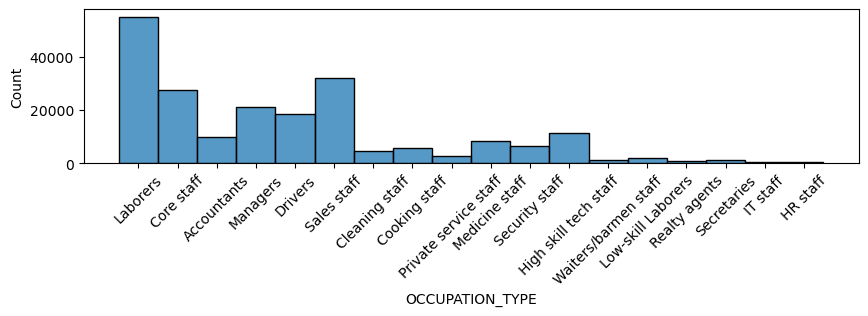

In [19]:
#Plotting a histogram to check the frequency distribution
plt.figure(figsize = (10,2))
sns.histplot(df_application_data['OCCUPATION_TYPE'])
plt.xticks(rotation = 45)
plt.show()

As records are more(31.34%) having null values in OCCUPATION_TYPE column, we are not dropping the records.
Updating the missing records with value 'NotAvailable'

In Occupation Type column ,'Laborers' have the highest frequency while 'IT Staff' has the lowest.

In [20]:
#Updating the records with 'NotAvailable' VALUE
df_application_data['OCCUPATION_TYPE'].fillna(value='NotAvailable',inplace=True)

In [21]:
#Checking the count of values in Occupation type
df_application_data['OCCUPATION_TYPE'].value_counts()

NotAvailable             96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
##checking No of Null Values in OCCUPATION_TYPE column after imputation
df_application_data['OCCUPATION_TYPE'].isnull().sum()

0

### EXT_SOURCE_3 : Numerical (Missing 19.83%)

In [23]:
#Checking the null values count of column EXT_SOURCE_3(Normalized score from external data source)
df_application_data['EXT_SOURCE_3'].isnull().sum()

60965

In [24]:
#Checking the count of values in column EXT_SOURCE_3
df_application_data['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [25]:
##checking statistic values for the column
df_application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

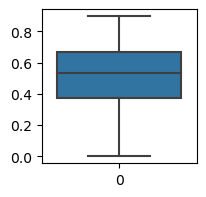

In [26]:
## checking for outliers
plt.figure(figsize=(2,2))
sns.boxplot(df_application_data['EXT_SOURCE_3'])
plt.show()

There are no outliers as per the box plot

<Axes: xlabel='EXT_SOURCE_3', ylabel='Density'>

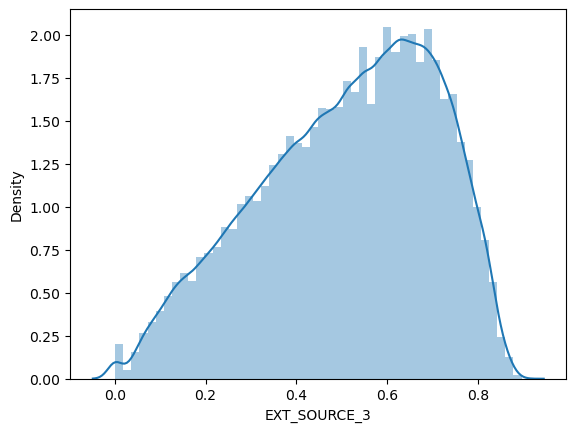

In [27]:
#Checking the distribution of column
sns.distplot(df_application_data['EXT_SOURCE_3'])

Distribution is slightly left skewed

In [28]:
#Finding the Median
df_application_data['EXT_SOURCE_3'].median()


0.53527625

In [29]:
#Finding the mode
df_application_data['EXT_SOURCE_3'].mode()

0    0.7463
Name: EXT_SOURCE_3, dtype: float64

The column EXT_SOURCE_3 has no outliers as shown in the Box plot.

mean and 50th percentile/median has not much difference.

In [30]:
#Imputing null values of column EXT_SOURCE_3 with median value.
df_application_data['EXT_SOURCE_3'].replace(np.NaN, df_application_data['EXT_SOURCE_3'].median() ,inplace=True)

In [31]:
##Cross validating that null values has been replaced
df_application_data['EXT_SOURCE_3'].isnull().sum()

0

 ## 2. All below columns are numerical and 13.5% missing
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR'

In [32]:
#Checking the count of values in columns
cols=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in cols:
    print(df_application_data[i].value_counts())

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0 

In [33]:
#checking the statistics of numerical columns
df_application_data[cols].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

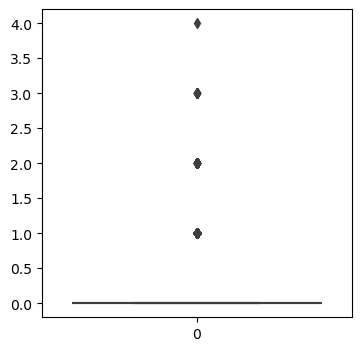

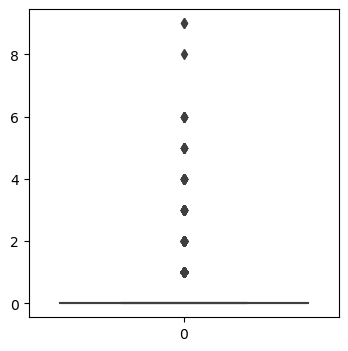

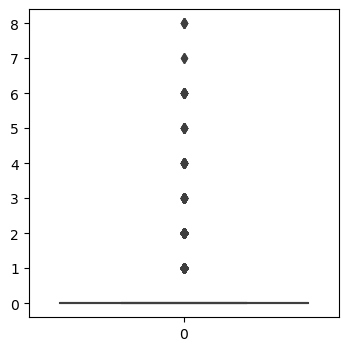

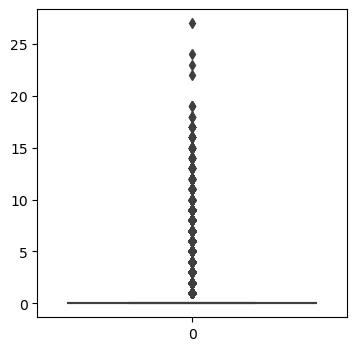

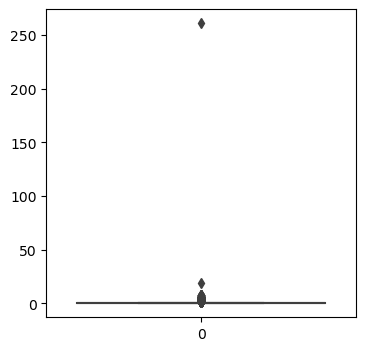

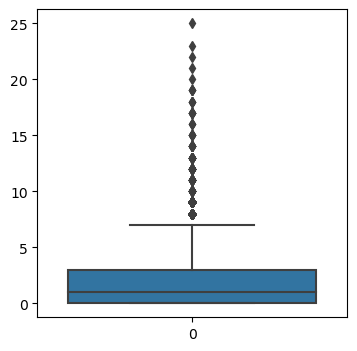

In [34]:
#plotting the box plot to check outliers
for i in cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(df_application_data[i])
    plt.show()


The data has outliers as seen by the plots above, it is good to consider using mode values for replacing the missing values

In [35]:
#No of Null values in column and mode
for i in cols:
    print('No of Null values in column ',i,'are: ', df_application_data[i].isnull().sum())
    print('mode of column ',i,'is: ', df_application_data[i].mode()[0])
    print()

No of Null values in column  AMT_REQ_CREDIT_BUREAU_HOUR are:  41519
mode of column  AMT_REQ_CREDIT_BUREAU_HOUR is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_DAY are:  41519
mode of column  AMT_REQ_CREDIT_BUREAU_DAY is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_WEEK are:  41519
mode of column  AMT_REQ_CREDIT_BUREAU_WEEK is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_MON are:  41519
mode of column  AMT_REQ_CREDIT_BUREAU_MON is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_QRT are:  41519
mode of column  AMT_REQ_CREDIT_BUREAU_QRT is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_YEAR are:  41519
mode of column  AMT_REQ_CREDIT_BUREAU_YEAR is:  0.0



In [36]:
#Imputing null values of column with mode value 
for i in cols:
    df_application_data[i].fillna(df_application_data[i].mode()[0],inplace=True)

In [37]:
#cross checking the Imputation done
for i in cols:
    print('No of Null values in column ',i,'are: ', df_application_data[i].isnull().sum())
    print('mode of column ',i,'is: ', df_application_data[i].mode()[0])
    print()

No of Null values in column  AMT_REQ_CREDIT_BUREAU_HOUR are:  0
mode of column  AMT_REQ_CREDIT_BUREAU_HOUR is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_DAY are:  0
mode of column  AMT_REQ_CREDIT_BUREAU_DAY is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_WEEK are:  0
mode of column  AMT_REQ_CREDIT_BUREAU_WEEK is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_MON are:  0
mode of column  AMT_REQ_CREDIT_BUREAU_MON is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_QRT are:  0
mode of column  AMT_REQ_CREDIT_BUREAU_QRT is:  0.0

No of Null values in column  AMT_REQ_CREDIT_BUREAU_YEAR are:  0
mode of column  AMT_REQ_CREDIT_BUREAU_YEAR is:  0.0



### 3. NAME_TYPE_SUITE: Categorical (Missing 0.42%)
Column describes "Who accompanied client when applying for the previous application"

In [38]:
#Checking values and counts of column
df_application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

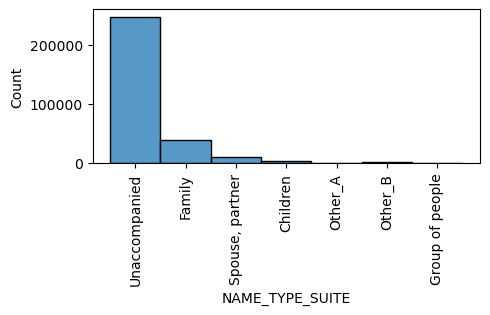

In [39]:
#Plotting Histogram for frequency distribution
plt.figure(figsize = (5,2))
sns.histplot(df_application_data['NAME_TYPE_SUITE'])
plt.xticks(rotation = 90)
plt.show()

The column NAME_TYPE_SUITE has 'Unaccompanied' has highest frequency and 'Group of people' lowest

In [40]:
#Number of null values to be imputed
df_application_data['NAME_TYPE_SUITE'].isnull().sum()

1292

In [41]:
#impute the null values with most common value 'Unaccompanied'
df_application_data['NAME_TYPE_SUITE'].fillna(value='Unaccompanied',inplace=True)

In [42]:
#Number of null values after imputation
df_application_data['NAME_TYPE_SUITE'].isnull().sum()

0

### 4.  'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', : Numerical (Missing 0.33%)
The column describes:
How many observation of client's social surroundings with observable 30 DPD (days past due) default

How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

How many observation of client's social surroundings with observable 60 DPD (days past due) default

How many observation of client's social surroundings defaulted on 60 (days past due) DPD

In [43]:
cols=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [44]:
#Checking values and counts of column
for i in cols:
    print('no of null values in column ',i,'is: ', df_application_data[i].isnull().sum())
    print(df_application_data[i].value_counts())
    print()

no of null values in column  OBS_30_CNT_SOCIAL_CIRCLE is:  1021
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

no of null values in column  DEF_30_CNT_SOCIAL_CIRCLE is:  1021
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

no of null values in column  OBS_60_CNT_SOCIAL_CIRCLE is:  1021
0.0      164666
1.0       48870
2.0   

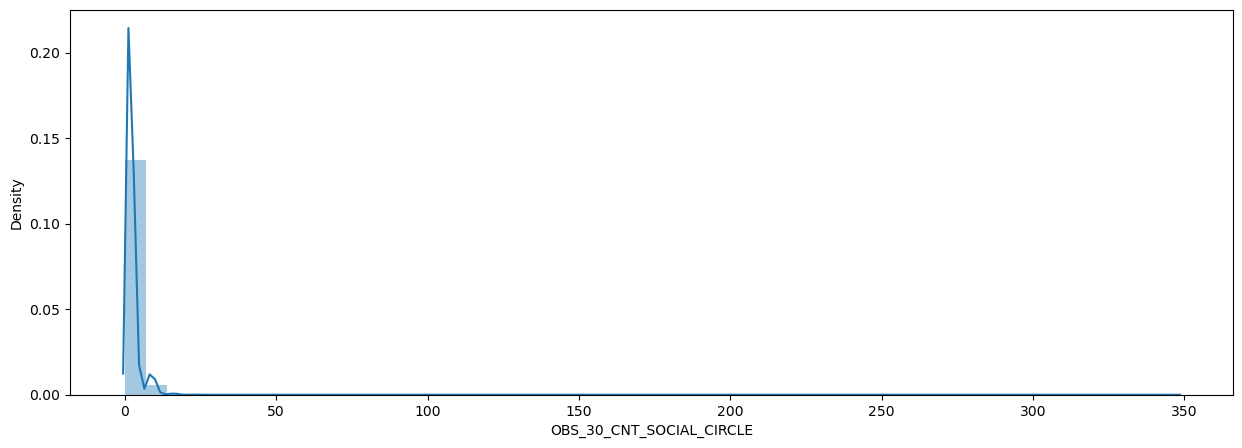

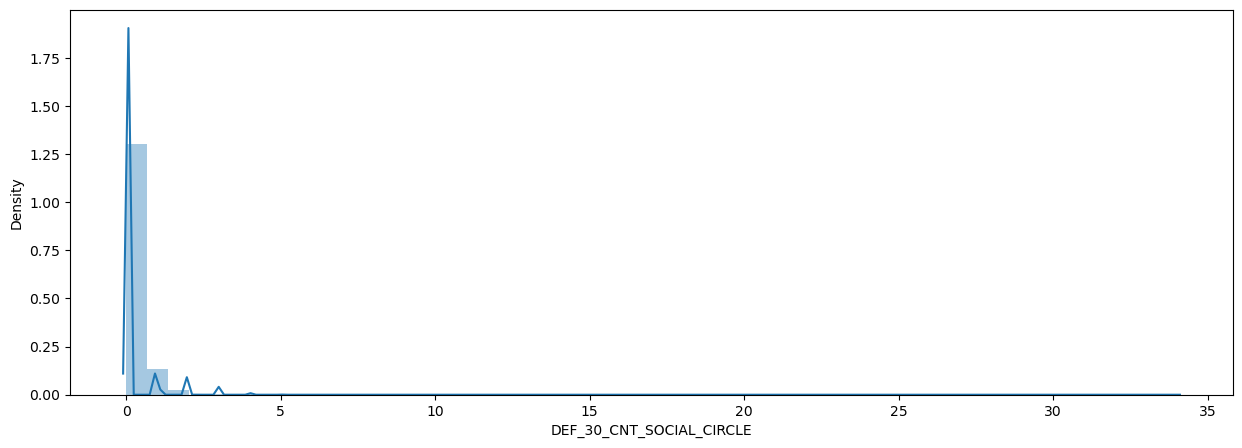

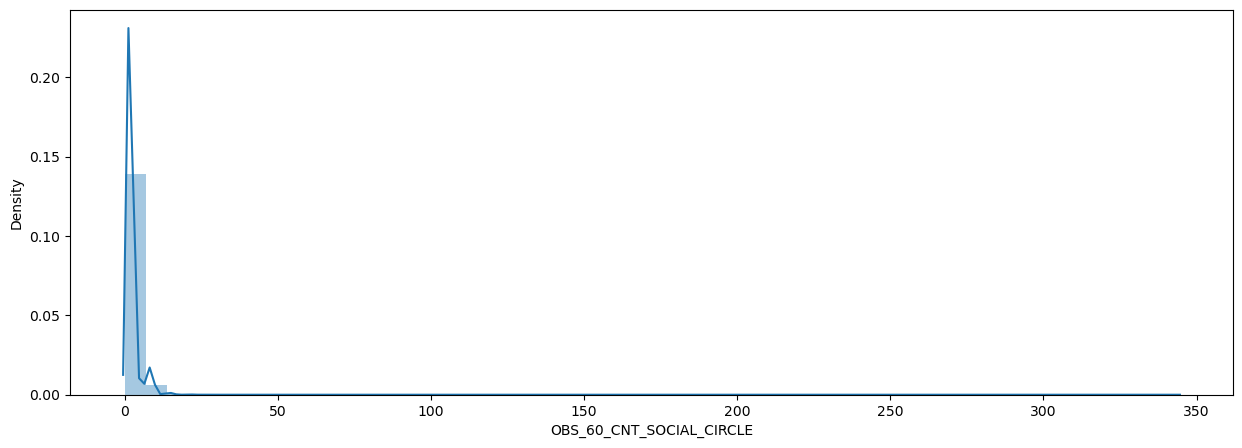

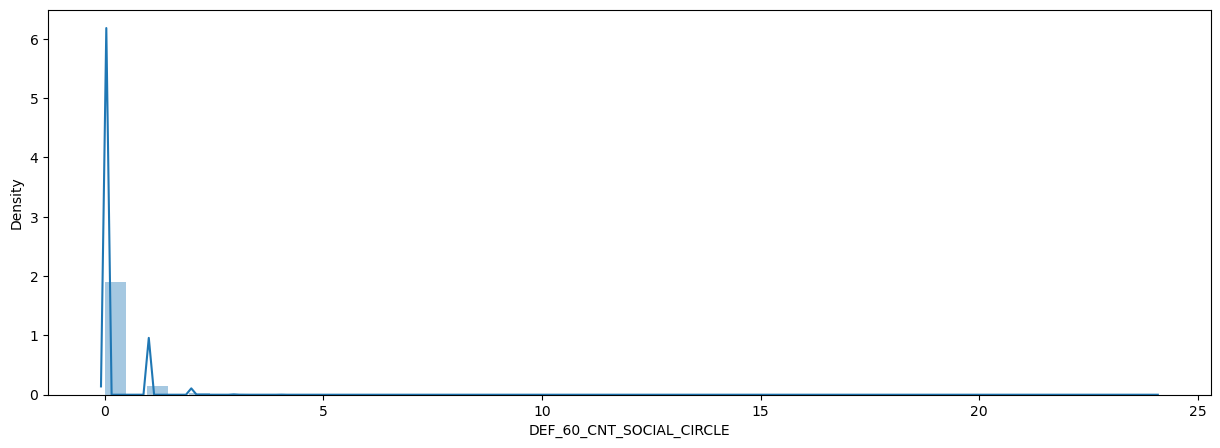

In [45]:
#Distplot for checking distribution
for i in cols:
    plt.figure(figsize=(15,5))
    sns.distplot(df_application_data[i])
    plt.show()

All the above Graph shows majorly right skewness

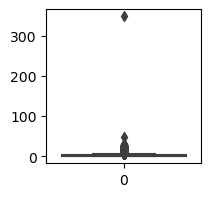

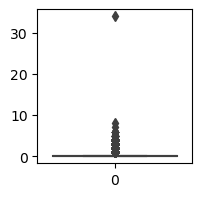

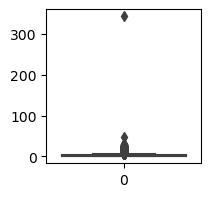

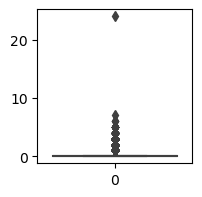

In [46]:
#Boxplot for checking outliers
for i in cols:
    plt.figure(figsize=(2,2))
    sns.boxplot(df_application_data[i])
    plt.show()

Columns 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE' has outliers.

In [47]:
#statiscal values of the columns
df_application_data[cols].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

As the column has outliers and skewness, its better to use mode for imputation

In [48]:
df_application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [49]:
#the data is right skewed and has outliers as seen by the plots above, it is good to consider using mean values for replacing the missing values
for i in cols:
    print('mode of column ',i,'is: ', df_application_data[i].mode())
    df_application_data[i]= df_application_data[i].fillna(df_application_data[i].mode()[0])
    print()

mode of column  OBS_30_CNT_SOCIAL_CIRCLE is:  0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

mode of column  DEF_30_CNT_SOCIAL_CIRCLE is:  0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

mode of column  OBS_60_CNT_SOCIAL_CIRCLE is:  0    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

mode of column  DEF_60_CNT_SOCIAL_CIRCLE is:  0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64



In [50]:
#checking null values after Imputation
for i in cols:
    print('no of null values in column ',i,'is: ', df_application_data[i].isnull().sum())
    print()

no of null values in column  OBS_30_CNT_SOCIAL_CIRCLE is:  0

no of null values in column  DEF_30_CNT_SOCIAL_CIRCLE is:  0

no of null values in column  OBS_60_CNT_SOCIAL_CIRCLE is:  0

no of null values in column  DEF_60_CNT_SOCIAL_CIRCLE is:  0



Removing the outliers in columns 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'

In [51]:
cols=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [52]:
#Replacing the outlier with mode from columns
for i in cols:
    print(df_application_data[i].shape)
    print('name of column: ', i)

    outlier=max(df_application_data[i])
    print('outlier value: ', outlier)

    mode_value=df_application_data[i].mode()[0] 
    print('mode value: ', mode_value)

    df_application_data[i].replace(outlier,mode_value, inplace=True)
    print(df_application_data[i].shape)

(307511,)
name of column:  OBS_30_CNT_SOCIAL_CIRCLE
outlier value:  348.0
mode value:  0.0
(307511,)
(307511,)
name of column:  DEF_30_CNT_SOCIAL_CIRCLE
outlier value:  34.0
mode value:  0.0
(307511,)
(307511,)
name of column:  OBS_60_CNT_SOCIAL_CIRCLE
outlier value:  344.0
mode value:  0.0
(307511,)
(307511,)
name of column:  DEF_60_CNT_SOCIAL_CIRCLE
outlier value:  24.0
mode value:  0.0
(307511,)


In [53]:
#CHecking the statistics of numerical columns
df_application_data[cols].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.416392                  0.142834   
std                    2.315532                  0.441834   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                   47.000000                  8.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             307511.000000             307511.000000  
mean                   1.399508                  0.099639  
std                    2.295541                  0.359158  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                   47.000000                  7.000000

### 5. EXT_SOURCE_2 : Numerical (Missing 0.214%) 

In [54]:
#Checking values and counts of column
df_application_data['EXT_SOURCE_2'].value_counts().sort_values(ascending=False)

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.467705      1
0.224068      1
0.185482      1
0.794734      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119828, dtype: int64

In [55]:
#Checking the statistics of numerical columns
df_application_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.170000e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

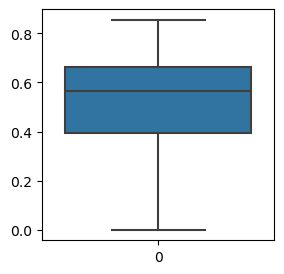

In [56]:
#Plotting the boxplot for outliers and quantiles
plt.figure(figsize=(3,3))
sns.boxplot(df_application_data['EXT_SOURCE_2'])
plt.show()

There are no outliers in the column

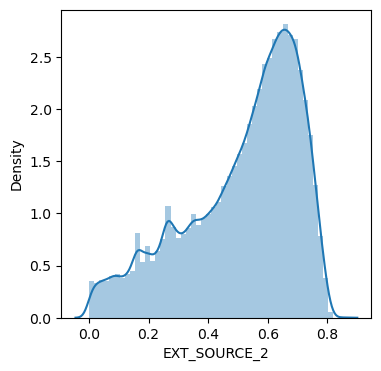

In [57]:
plt.figure(figsize=(4,4))
sns.distplot(df_application_data['EXT_SOURCE_2'])
plt.show()

As observed from the above 2 graphs , EXT_SOURCE_2 is little left skewed with no outliers

In [58]:
#Finding the mean,median,mode
print('Mean:= ',df_application_data['EXT_SOURCE_2'].mean())
print('Median:= ',df_application_data['EXT_SOURCE_2'].median())
print('Mode:= ', df_application_data['EXT_SOURCE_2'].mode())

Mean:=  0.5143926741305576
Median:=  0.565961426
Mode:=  0    0.285898
Name: EXT_SOURCE_2, dtype: float64


In [59]:
# Number of Null Values in the column
df_application_data['EXT_SOURCE_2'].isnull().sum()

660

In [60]:
# Mean/Median can be used for imputation
df_application_data['EXT_SOURCE_2']= df_application_data['EXT_SOURCE_2'].fillna(df_application_data['EXT_SOURCE_2'].median())

In [61]:
#checking null values after Imputation
df_application_data['EXT_SOURCE_2'].isnull().sum()

0

### 6. AMT_GOODS_PRICE : Numerical (Missing 0.09%) 

In [62]:
#Checking values and counts of column
df_application_data['AMT_GOODS_PRICE'].value_counts().sort_values(ascending=False)

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
384772.5         1
1259671.5        1
1324962.0        1
766444.5         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [63]:
#Checking the statistics of numerical columns
df_application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

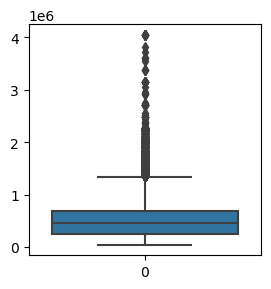

In [64]:
#Plotting boxplot for outlier checking
plt.figure(figsize=(3,3))
sns.boxplot(df_application_data['AMT_GOODS_PRICE'])
plt.show()

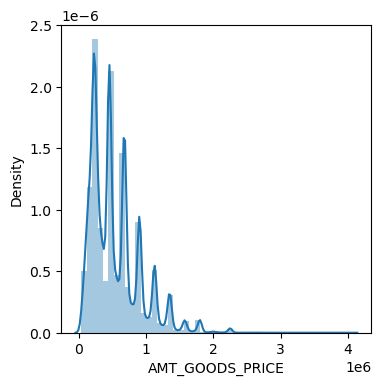

In [65]:
#Plotting distplot for skewness and distribution checking
plt.figure(figsize=(4,4))
sns.distplot(df_application_data['AMT_GOODS_PRICE'])
plt.show()

In [66]:
# Number of Null Values in the column
df_application_data['AMT_GOODS_PRICE'].isnull().sum()

278

In [67]:
# Checking statistics of the column
print(df_application_data['AMT_GOODS_PRICE'].mean())
print(df_application_data['AMT_GOODS_PRICE'].median())
print(df_application_data['AMT_GOODS_PRICE'].mode()[0])

538396.2074288895
450000.0
450000.0


AMT_GOODS_PRICE is slighlty skewed with outliers. Mode/Median are same.

In [68]:
#Mode can be used for imputation
df_application_data['AMT_GOODS_PRICE']= df_application_data['AMT_GOODS_PRICE'].fillna(df_application_data['AMT_GOODS_PRICE'].mode()[0])

In [69]:
#checking null values after Imputation
df_application_data['AMT_GOODS_PRICE'].isnull().sum()

0

### 7. AMT_ANNUITY : Numerical (Missing 0.0039%) 

In [70]:
#Checking values and counts of column
df_application_data['AMT_ANNUITY'].value_counts().sort_values(ascending=False)

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
72067.5       1
62856.0       1
60975.0       1
47655.0       1
77809.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [71]:
#Checking the statistics of numerical columns
df_application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

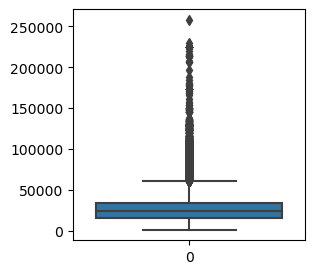

In [72]:
#Plotting boxplot for outlier checking
plt.figure(figsize=(3,3))
sns.boxplot(df_application_data['AMT_ANNUITY'])
plt.show()

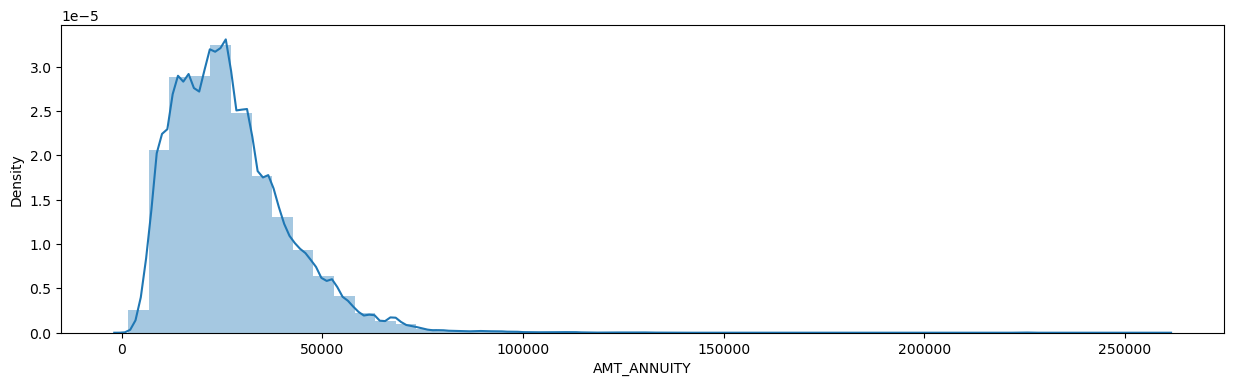

In [73]:
#Plotting distplot for skewness and distribution checking
plt.figure(figsize=(15,4))
sns.distplot(df_application_data['AMT_ANNUITY'])
plt.show()

AMT_GOODS_PRICE is right skewed with outliers. Mode/Median are same and can be used for imputation

In [74]:
# Number of Null Values in the column
df_application_data['AMT_ANNUITY'].isnull().sum()

12

In [75]:
# Checking statistics of the column
print(df_application_data['AMT_ANNUITY'].mean())
print(df_application_data['AMT_ANNUITY'].median())
print(df_application_data['AMT_ANNUITY'].mode()[0])

27108.573909183444
24903.0
9000.0


In [76]:
#Imputing missing values with median
df_application_data['AMT_ANNUITY']= df_application_data['AMT_ANNUITY'].fillna(df_application_data['AMT_ANNUITY'].median())

In [77]:
#checking null values after Imputation
df_application_data['AMT_ANNUITY'].isnull().sum()

0

### 7. CNT_FAM_MEMBERS : Numerical (Missing 0.00065%) 

In [78]:
# Number of Null Values in the column
print(df_application_data['CNT_FAM_MEMBERS'].isnull().sum())


2


In [79]:
#Checking values and counts of column
df_application_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

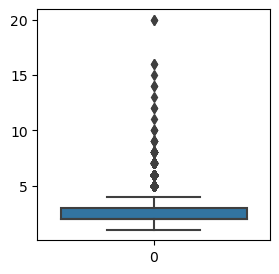

In [80]:
#Plotting boxplot for outlier checking
plt.figure(figsize=(3,3))
sns.boxplot(df_application_data['CNT_FAM_MEMBERS'])
plt.show()

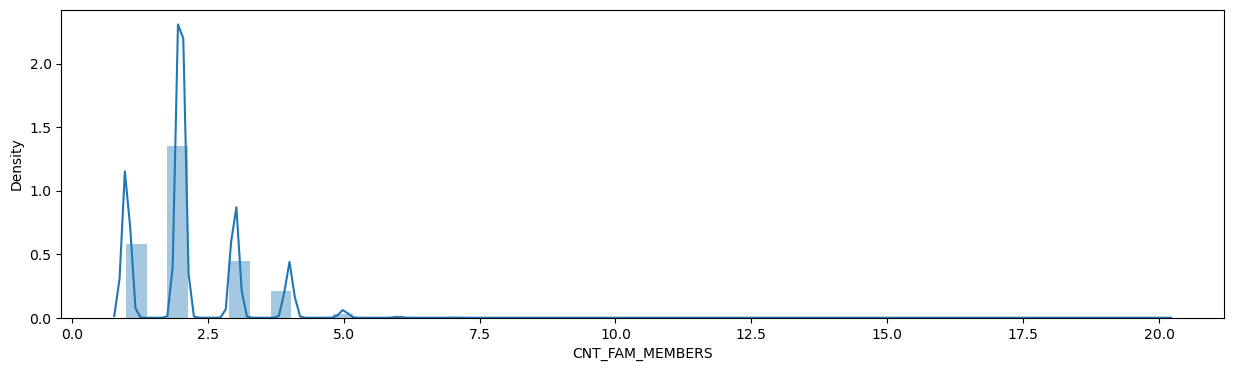

In [81]:
#Plotting distplot for skewness and distribution checking
plt.figure(figsize=(15,4))
sns.distplot(df_application_data['CNT_FAM_MEMBERS'])
plt.show()

In [82]:
df_application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [83]:
# Checking statistics of the column
print(df_application_data['CNT_FAM_MEMBERS'].mean())
print(df_application_data['CNT_FAM_MEMBERS'].median())
print(df_application_data['CNT_FAM_MEMBERS'].mode()[0])

2.152665450442101
2.0
2.0


CNT_FAM_MEMBERS Column is right skewed with outliers.
Mean and median has little difference

In [84]:
#CNT_FAM_MEMBERS is right skewed with outliers. Mode/Median are same and can be used for imputation
df_application_data['CNT_FAM_MEMBERS'].fillna(df_application_data['CNT_FAM_MEMBERS'].median(), inplace=True)

In [85]:
#checking null values after Imputation
df_application_data['CNT_FAM_MEMBERS'].isnull().sum()

0

### 8. DAYS_LAST_PHONE_CHANGE : Numerical (Missing 0.00033%) 

In [86]:
#Checking values and counts of column
df_application_data['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [87]:
#Finding the null values count
print(df_application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

1


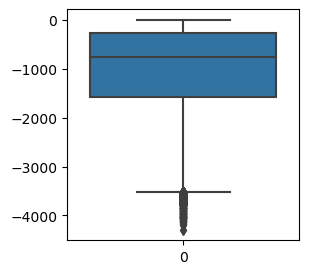

In [88]:
#Plotting boxplot for outlier checking
plt.figure(figsize=(3,3))
sns.boxplot(df_application_data['DAYS_LAST_PHONE_CHANGE'])
plt.show()

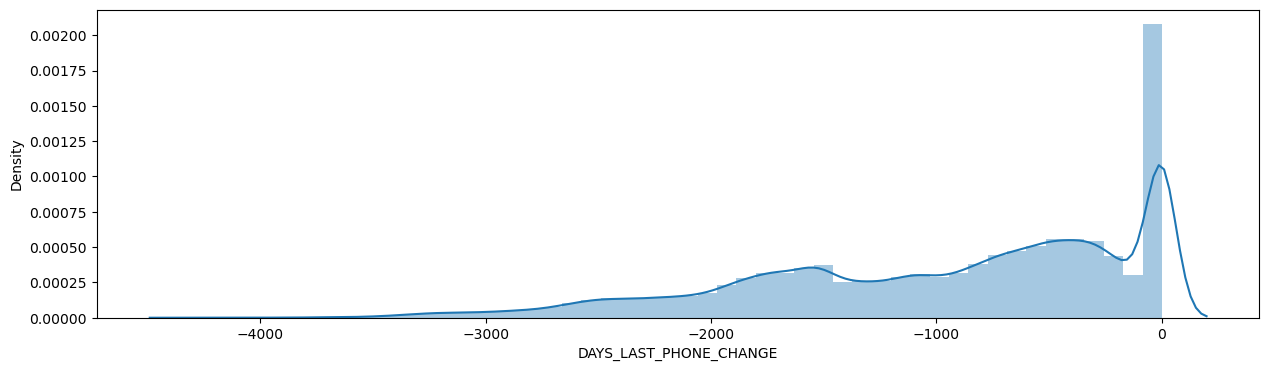

In [89]:
#Plotting distplot for skewness and distribution checking
plt.figure(figsize=(15,4))
sns.distplot(df_application_data['DAYS_LAST_PHONE_CHANGE'])
plt.show()

In [90]:
# Checking statistics of the column
print(df_application_data['DAYS_LAST_PHONE_CHANGE'].mean())
print(df_application_data['DAYS_LAST_PHONE_CHANGE'].median())
print(df_application_data['DAYS_LAST_PHONE_CHANGE'].mode()[0])

-962.8587883320868
-757.0
0.0


DAYS_LAST_PHONE_CHANGE is left skewed with outliers

In [91]:
#Standardizing the values by converting to absolute and days to year and renaming the columns
df_application_data['DAYS_LAST_PHONE_CHANGE']=(abs(df_application_data['DAYS_LAST_PHONE_CHANGE']))/365
df_application_data.rename(columns={'DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace=True)

In [92]:
#Checking values and counts of column
df_application_data['YEARS_LAST_PHONE_CHANGE'].value_counts()

0.000000     37672
0.002740      2812
0.005479      2318
0.008219      1763
0.010959      1285
             ...  
11.098630        1
9.843836         1
9.923288         1
9.780822         1
9.693151         1
Name: YEARS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

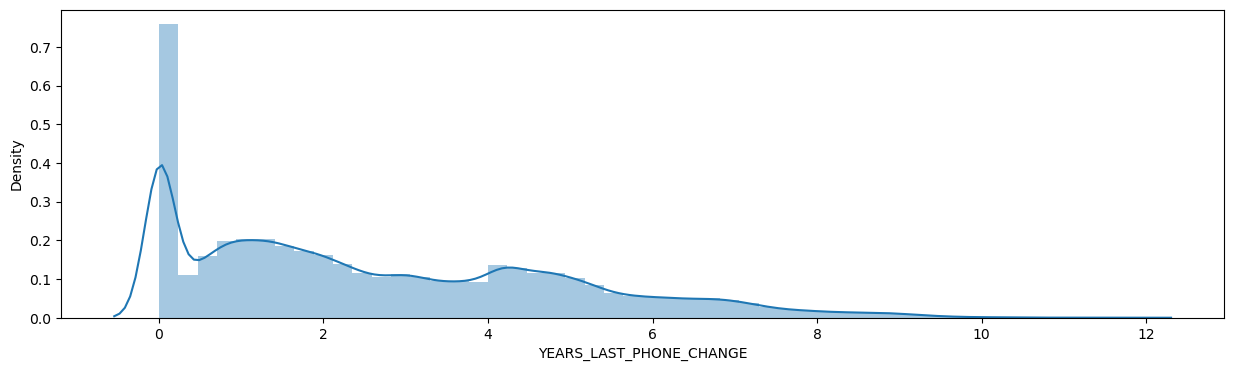

In [93]:
#Plotting distplot for skewness and distribution checking
plt.figure(figsize=(15,4))
sns.distplot(df_application_data['YEARS_LAST_PHONE_CHANGE'])
plt.show()

In [94]:
# Mode can be used for imputation as mean/median have -ve values 
df_application_data['YEARS_LAST_PHONE_CHANGE'].fillna(df_application_data['YEARS_LAST_PHONE_CHANGE'].mode()[0], inplace=True)

In [95]:
#checking null values after Imputation
df_application_data['YEARS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [96]:
#Checking that all columns are cleaned with missing values
df_application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [97]:
#Checking the columns in dataset
df_application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

### Data Correction

#### column CODE_GENDER has XNA values.

In [98]:
#Checking values and counts of column
df_application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [99]:
#Dropping the XNA values as there are very few records with it.
df_application_data = df_application_data[~(df_application_data['CODE_GENDER'] == 'XNA')]

In [100]:
#Checking the values after imputation
df_application_data['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

#### CNT_CHILDREN has outliers (unrealistic values)

In [101]:
#Checking values and counts of column
df_application_data['CNT_CHILDREN'].value_counts()

0     215369
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

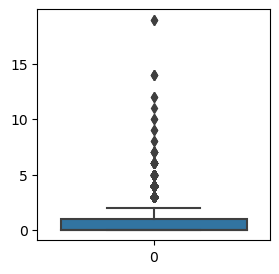

In [102]:
#Checking for outliers using boxplot
plt.figure(figsize=(3,3))
sns.boxplot(df_application_data['CNT_CHILDREN'])
plt.show()

In [103]:
##Number of records before imputation
df_application_data.shape 

(307507, 73)

In [104]:
## Removing records where count of children >=15
df_application_data= df_application_data[df_application_data['CNT_CHILDREN']<15]
df_application_data.shape 

(307505, 73)

#### Analysis of  'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION' 

In [105]:
#Standardizing the values by converting to absolute and days to year and renaming the columns
cols=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']
for i in cols:
    print(i)
    df_application_data[i]=abs(df_application_data[i])
    df_application_data[i]=(df_application_data[i])/365


df_application_data.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH',
                                    'DAYS_EMPLOYED':'YEARS_EMPLOYED',
                                    'DAYS_REGISTRATION':'YEARS_REGISTRATION',
                                    'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},inplace=True)


DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
DAYS_REGISTRATION


In [106]:
cols=['YEARS_BIRTH','YEARS_EMPLOYED','YEARS_ID_PUBLISH','YEARS_REGISTRATION']


YEARS_BIRTH


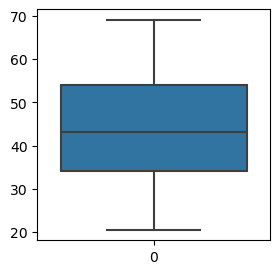

YEARS_EMPLOYED


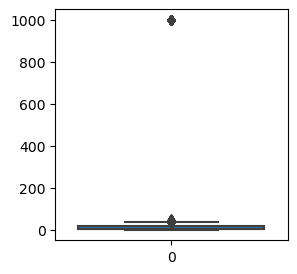

YEARS_ID_PUBLISH


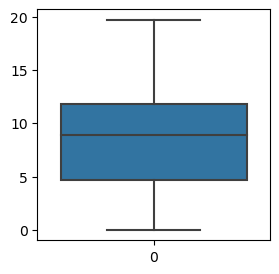

YEARS_REGISTRATION


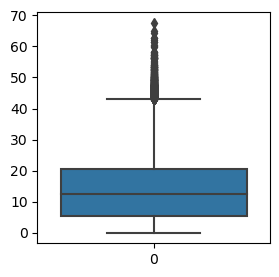

In [107]:
#Checking for outliers
for i in cols:
    plt.figure(figsize=(3,3))
    print(i)
    sns.boxplot(df_application_data[i])
    plt.show()

In [108]:
#Checking Statistics of numerical columns
df_application_data[cols].describe()

YEARS_BIRTH  YEARS_EMPLOYED  YEARS_ID_PUBLISH  YEARS_REGISTRATION
count  307505.000000   307505.000000     307505.000000       307505.000000
mean       43.937157      185.550689          8.203316           13.660653
std        11.956096      382.040603          4.135490            9.651761
min        20.517808        0.000000          0.000000            0.000000
25%        34.008219        2.556164          4.712329            5.506849
50%        43.150685        6.079452          8.915068           12.339726
75%        53.923288       15.635616         11.778082           20.493151
max        69.120548     1000.665753         19.717808           67.594521

In [109]:
#Outliers percentage detection in YEARS_EMPLOYED column
(abs(df_application_data['YEARS_EMPLOYED'])/365).value_counts(normalize=True)*100

2.741550    18.007512
0.001501     0.050731
0.001681     0.049430
0.001494     0.049105
0.001726     0.049105
              ...    
0.094487     0.000325
0.061768     0.000325
0.096033     0.000325
0.088745     0.000325
0.065258     0.000325
Name: YEARS_EMPLOYED, Length: 12574, dtype: float64

YEARS_EMPLOYED having 18% outliers as seen from the plot and statistical values.

In [110]:
#Fiding mean.median,mode of column
print(df_application_data['YEARS_EMPLOYED'].mean())
print(df_application_data['YEARS_EMPLOYED'].median())
print(df_application_data['YEARS_EMPLOYED'].mode()[0])

185.5506888695205
6.079452054794521
1000.6657534246575


In [111]:
#Replacing the outlier with median from columns
cols=['YEARS_EMPLOYED']
for i in cols:
    print(df_application_data[i].shape)
    print('name of column: ', i)

    outlier=max(df_application_data[i])
    print('outlier value: ', outlier)

    median_value=df_application_data[i].median() 
    print('median value: ', median_value)

    df_application_data[i].replace(outlier,median_value, inplace=True)
    print(df_application_data[i].shape)

(307505,)
name of column:  YEARS_EMPLOYED
outlier value:  1000.6657534246575
median value:  6.079452054794521
(307505,)


### Outlier detection

SK_ID_CURR


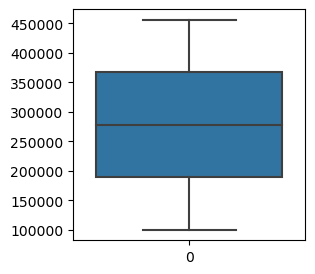

TARGET


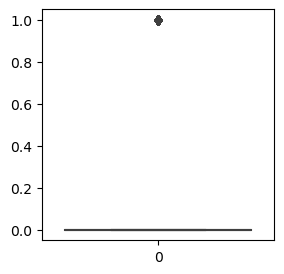

CNT_CHILDREN


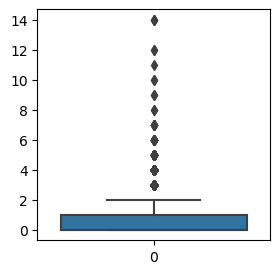

AMT_INCOME_TOTAL


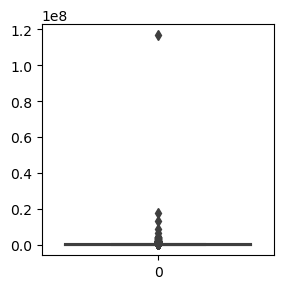

AMT_CREDIT


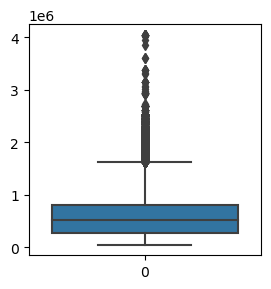

AMT_ANNUITY


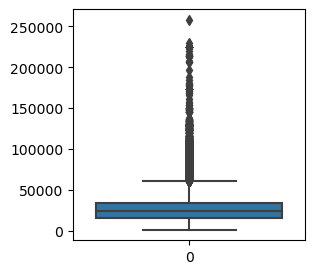

AMT_GOODS_PRICE


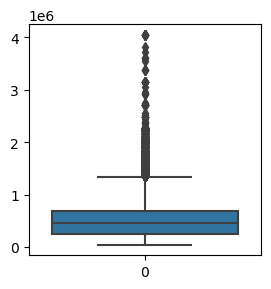

REGION_POPULATION_RELATIVE


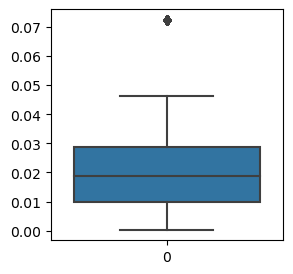

YEARS_BIRTH


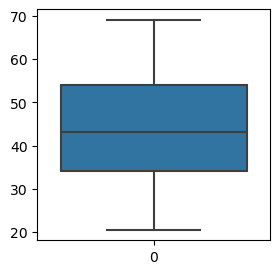

YEARS_EMPLOYED


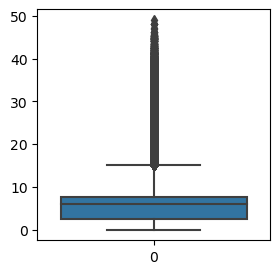

YEARS_REGISTRATION


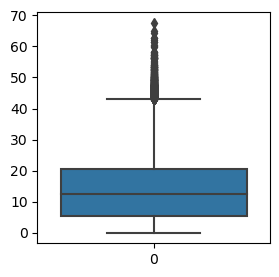

YEARS_ID_PUBLISH


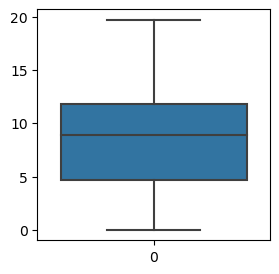

FLAG_MOBIL


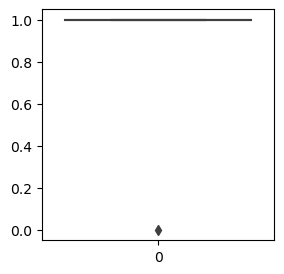

FLAG_EMP_PHONE


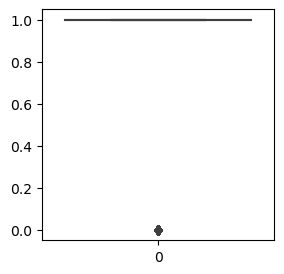

FLAG_WORK_PHONE


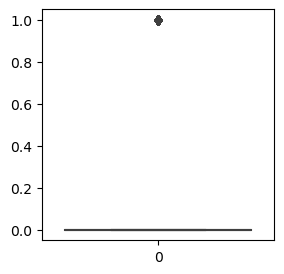

FLAG_CONT_MOBILE


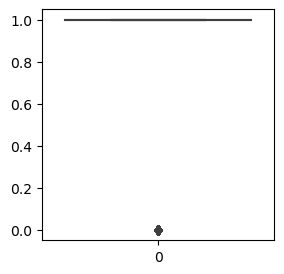

FLAG_PHONE


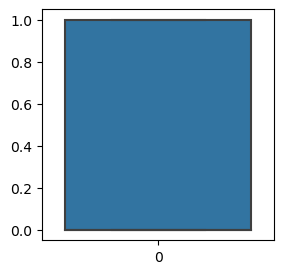

FLAG_EMAIL


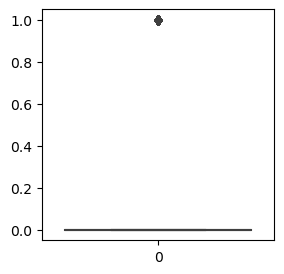

CNT_FAM_MEMBERS


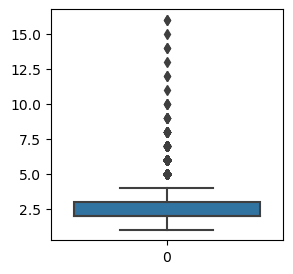

REGION_RATING_CLIENT


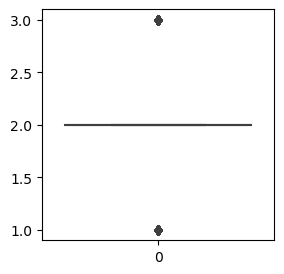

REGION_RATING_CLIENT_W_CITY


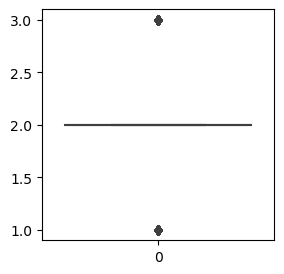

HOUR_APPR_PROCESS_START


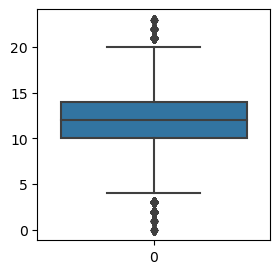

REG_REGION_NOT_LIVE_REGION


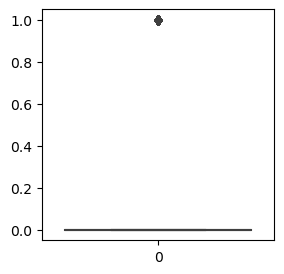

REG_REGION_NOT_WORK_REGION


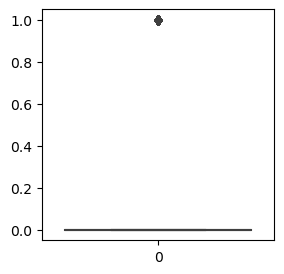

LIVE_REGION_NOT_WORK_REGION


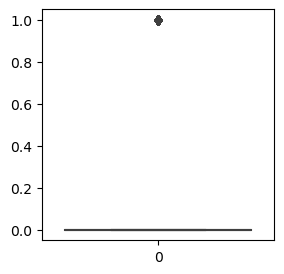

REG_CITY_NOT_LIVE_CITY


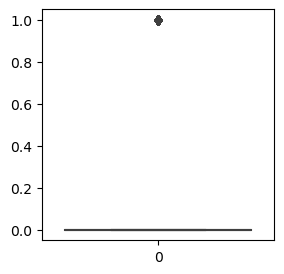

REG_CITY_NOT_WORK_CITY


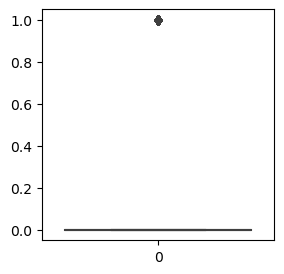

LIVE_CITY_NOT_WORK_CITY


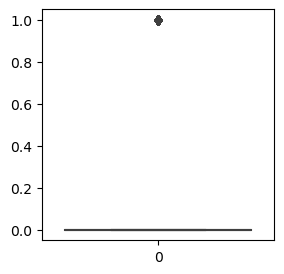

EXT_SOURCE_2


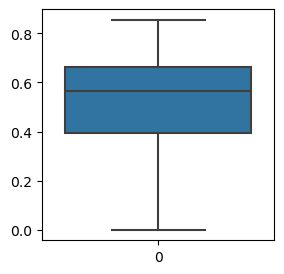

EXT_SOURCE_3


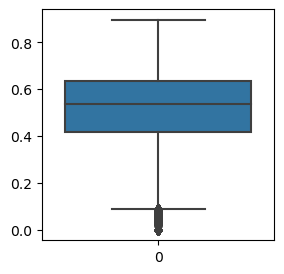

OBS_30_CNT_SOCIAL_CIRCLE


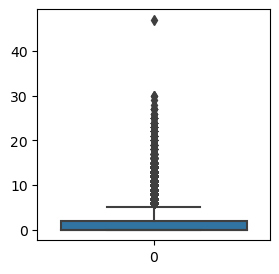

DEF_30_CNT_SOCIAL_CIRCLE


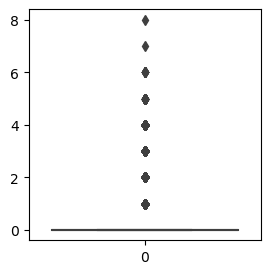

OBS_60_CNT_SOCIAL_CIRCLE


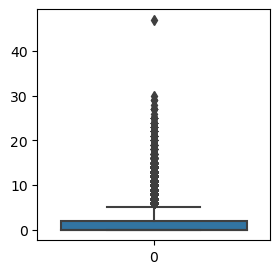

DEF_60_CNT_SOCIAL_CIRCLE


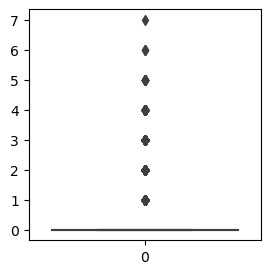

YEARS_LAST_PHONE_CHANGE


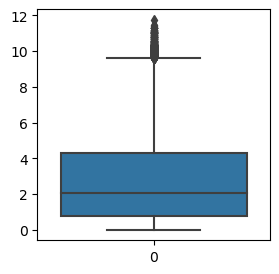

FLAG_DOCUMENT_2


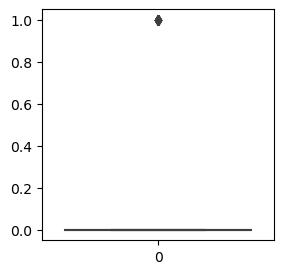

FLAG_DOCUMENT_3


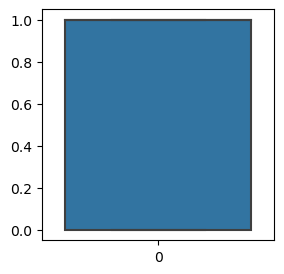

FLAG_DOCUMENT_4


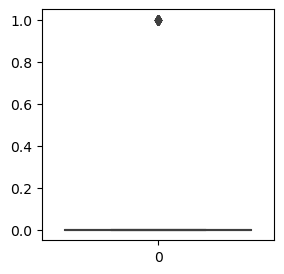

FLAG_DOCUMENT_5


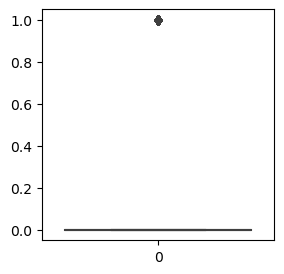

FLAG_DOCUMENT_6


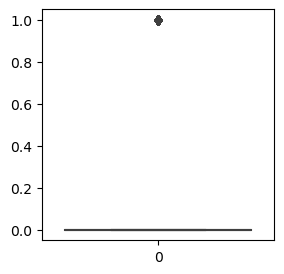

FLAG_DOCUMENT_7


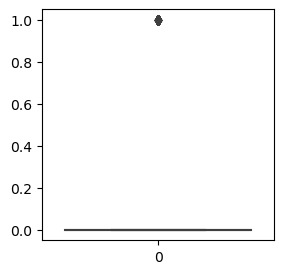

FLAG_DOCUMENT_8


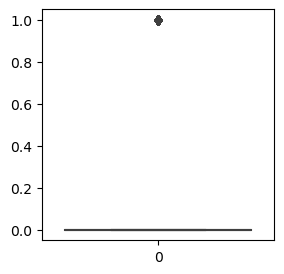

FLAG_DOCUMENT_9


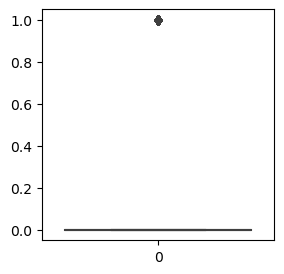

FLAG_DOCUMENT_10


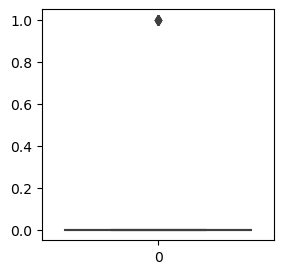

FLAG_DOCUMENT_11


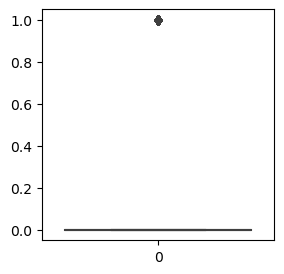

FLAG_DOCUMENT_12


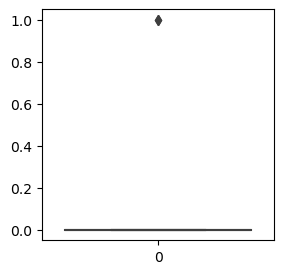

FLAG_DOCUMENT_13


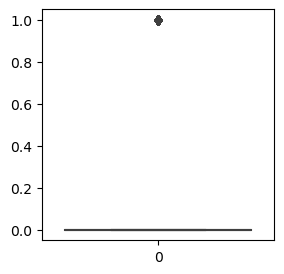

FLAG_DOCUMENT_14


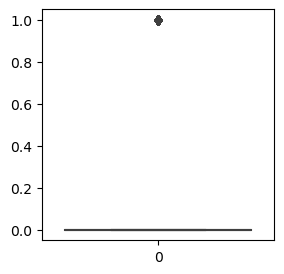

FLAG_DOCUMENT_15


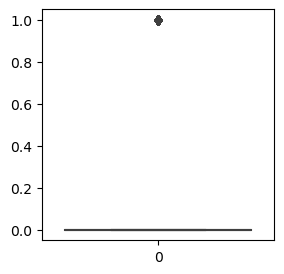

FLAG_DOCUMENT_16


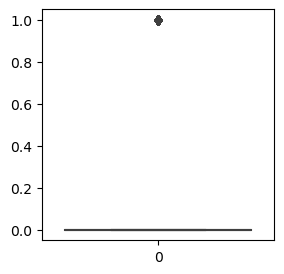

FLAG_DOCUMENT_17


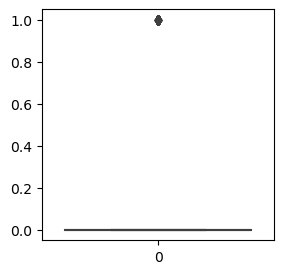

FLAG_DOCUMENT_18


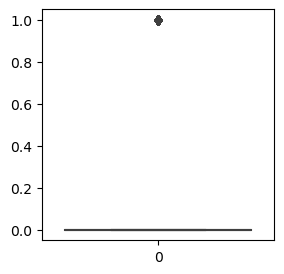

FLAG_DOCUMENT_19


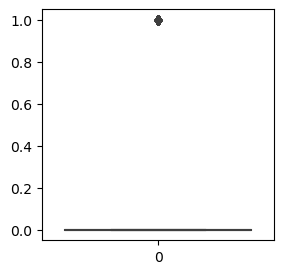

FLAG_DOCUMENT_20


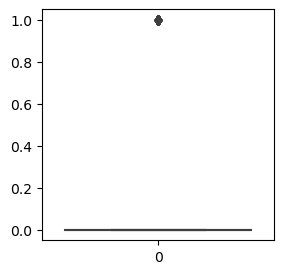

FLAG_DOCUMENT_21


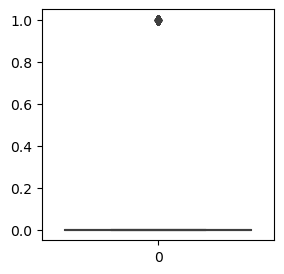

AMT_REQ_CREDIT_BUREAU_HOUR


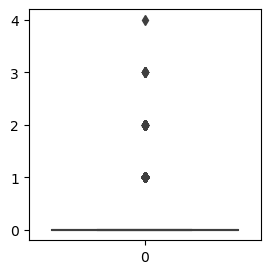

AMT_REQ_CREDIT_BUREAU_DAY


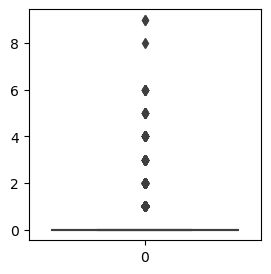

AMT_REQ_CREDIT_BUREAU_WEEK


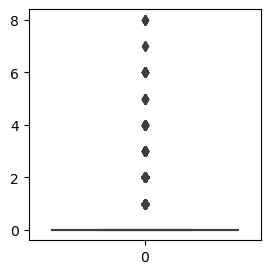

AMT_REQ_CREDIT_BUREAU_MON


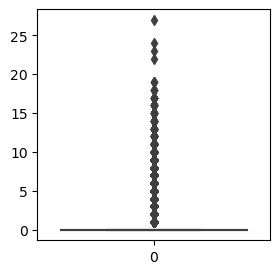

AMT_REQ_CREDIT_BUREAU_QRT


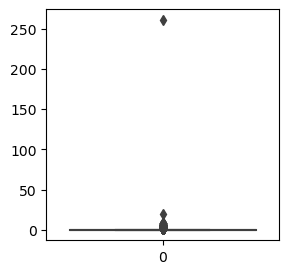

AMT_REQ_CREDIT_BUREAU_YEAR


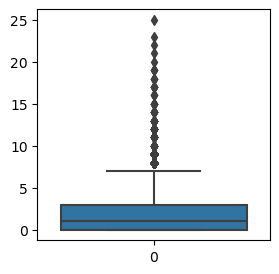

In [112]:
#Plotting box plot for columns in application dataset
cols=df_application_data.describe().columns
for i in cols:
    print(i)
    plt.figure(figsize=(3,3))
    sns.boxplot(df_application_data[i])
    plt.show()

In [113]:
##dedecting Outliers in columns
for i in df_application_data.describe().columns:
    IQR=np.percentile(df_application_data[i],75) - np.percentile(df_application_data[i],25)
    Q1=np.percentile(df_application_data[i],25)
    Q3=np.percentile(df_application_data[i],75)
    Lower_outlier = Q1-(1.5*IQR)
    Higher_outlier= Q3+(1.5*IQR)
    if (((df_application_data[i]>Higher_outlier) | (df_application_data[i]<Lower_outlier)).sum()>0) & (IQR>0):
        print(i)

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
YEARS_EMPLOYED
YEARS_REGISTRATION
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
YEARS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_YEAR


**The following columns have outliers:**

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
YEARS_EMPLOYED
YEARS_REGISTRATION
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
YEARS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_YEAR

In [114]:
###Binning
bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000','100000-200000','200000-300000','300000-400000','400000-500000','>500000']

df_application_data['AMT_INCOME_RANGE'] = pd.cut(df_application_data['AMT_INCOME_TOTAL'], bins=bins, labels=slot)

### Identifying if there is data imbalance in the data. 
#### Finding the ratio of data imbalance

In [115]:
#Checking values and percentage counts of column
df_application_data['TARGET'].value_counts(normalize=True)*100

0    91.926961
1     8.073039
Name: TARGET, dtype: float64

In [116]:
#Target variable (1 - client with payment difficulties)
Target1= df_application_data[df_application_data['TARGET']==1]
Target1.shape

(24825, 74)

In [117]:
#Target variable (0 - all other cases)
Target0= df_application_data[df_application_data['TARGET']==0]
Target0.shape

(282680, 74)

In [118]:
#Checking the imbalance ratio
Imbalance=round(len(Target0)/len(Target1),2)
Imbalance

11.39

There is imbalance of 11.39% in application_data set

<Axes: title={'center': 'Imbalance percentage in Target column'}, ylabel='TARGET'>

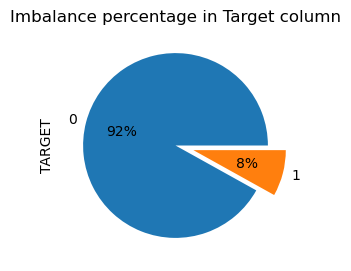

In [119]:
#Pie chart to depict the imbalance in Target column
plt.figure(figsize=(3,3))
explode=[0,0.2]
plt.title('Imbalance percentage in Target column')
df_application_data['TARGET'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%',explode=explode)

### Univariate Analysis 

In [120]:
##Analysis for NUmerical Variables

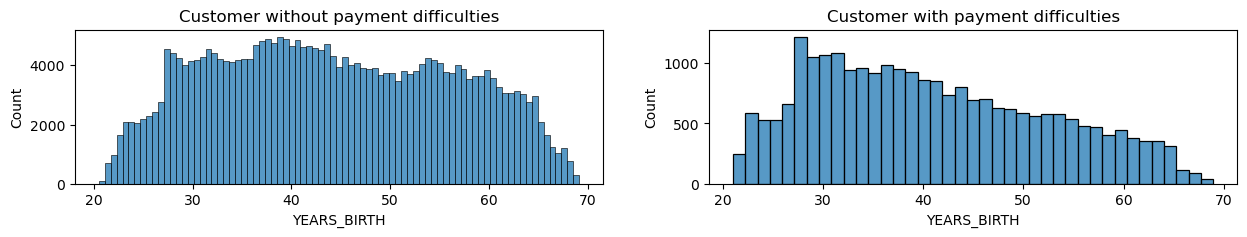

In [121]:
#Creating age-wise frequency distribution 
plt.figure(figsize=(15,2))
plt.subplot(1,2,1)
sns.histplot(data=Target0, x='YEARS_BIRTH')
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.histplot(data=Target1, x='YEARS_BIRTH')
plt.title('Customer with payment difficulties')
plt.show()

Customers having no payment difficulties are spread across uniformly between 20-70 age group.
Customers with payment difficulties are majorly in <40 age group

In [122]:
abs(df_application_data['YEARS_BIRTH']).value_counts()

37.668493    43
36.934247    42
27.452055    41
49.994521    41
43.208219    40
             ..
68.213699     1
68.131507     1
21.964384     1
68.761644     1
68.660274     1
Name: YEARS_BIRTH, Length: 17460, dtype: int64

In [123]:
###Binning
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120]
slot = ['<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120']

df_application_data['YEARS_BIRTH_RANGE'] = pd.cut(df_application_data['YEARS_BIRTH'], bins=bins, labels=slot)

In [124]:
#Value counts after creating Bins
df_application_data['YEARS_BIRTH_RANGE'].value_counts()

30-40      82306
40-50      76541
50-60      68061
20-30      45018
60-70      35579
<10            0
10-20          0
70-80          0
80-90          0
90-100         0
100-110        0
110-120        0
Name: YEARS_BIRTH_RANGE, dtype: int64

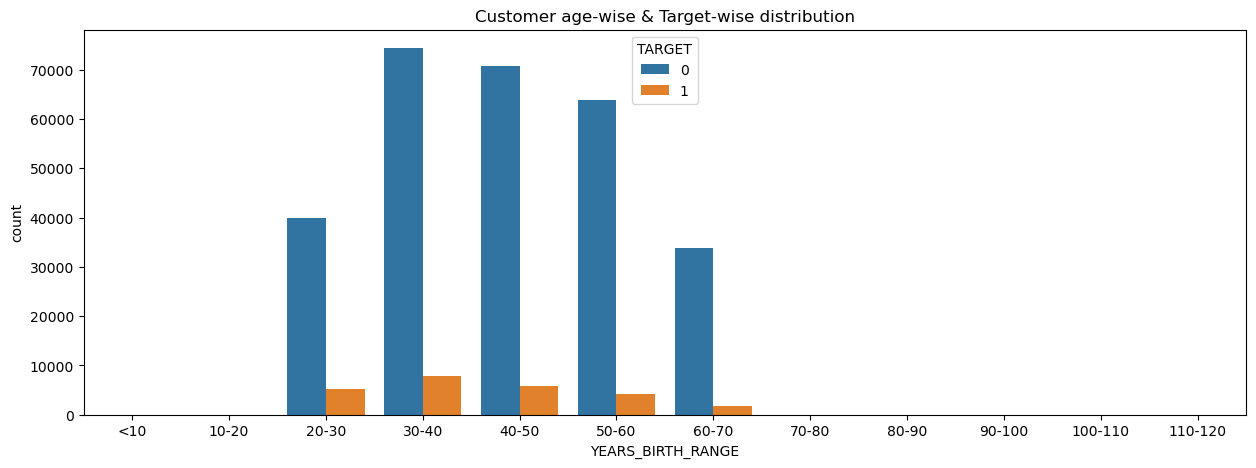

In [125]:
#Creating age-wise frequency distribution 
plt.figure(figsize=(15,5))
sns.countplot(data=df_application_data,x='YEARS_BIRTH_RANGE',hue='TARGET')
plt.title('Customer age-wise & Target-wise distribution')
plt.show()

Customers of age group <40 are having maximum payment difficulties.


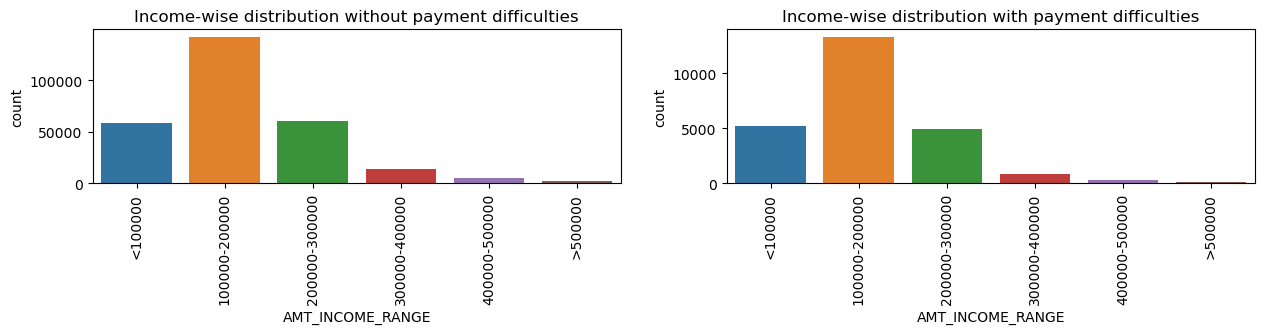

In [126]:
#Creating income-wise frequency distribution 
plt.figure(figsize=(15,2))
plt.subplot(1,2,1)
sns.countplot(data=Target0, x='AMT_INCOME_RANGE')
plt.xticks(rotation=90)
plt.title('Income-wise distribution without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(data=Target1, x='AMT_INCOME_RANGE')
plt.xticks(rotation=90)
plt.title('Income-wise distribution with payment difficulties')
plt.show()

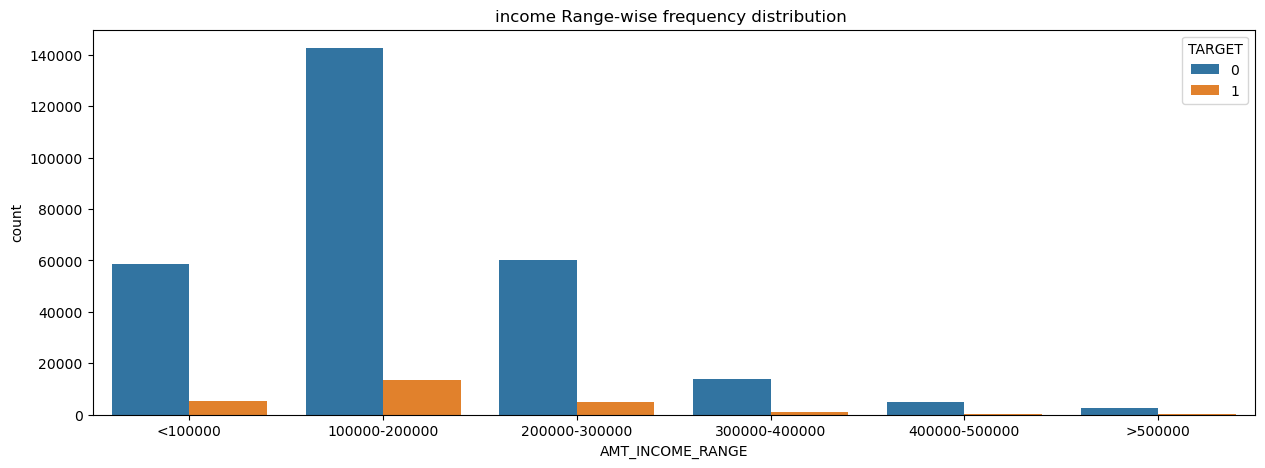

In [127]:
#Creating incomeRange-wise frequency distribution 
plt.figure(figsize=(15,5))
sns.countplot(data=df_application_data,x='AMT_INCOME_RANGE',hue='TARGET')
plt.title('income Range-wise frequency distribution ')
plt.show()

Customers in 100000-200000 income range are in majority and >500000 range are the least for both Target Groups .

In [128]:
Target0.AMT_INCOME_RANGE.value_counts(normalize=True)*100

100000-200000    50.434413
200000-300000    21.314914
<100000          20.685227
300000-400000     4.878661
400000-500000     1.782581
>500000           0.904203
Name: AMT_INCOME_RANGE, dtype: float64

In [129]:
Target1.AMT_INCOME_RANGE.value_counts(normalize=True)*100

100000-200000    53.679758
<100000          21.047331
200000-300000    19.822759
300000-400000     3.564955
400000-500000     1.297080
>500000           0.588117
Name: AMT_INCOME_RANGE, dtype: float64

Low Income Customers are Susceptible to both default and non default scenarios whereas High income group are very less in both cases

In [130]:
##Analysis for Categorical columns

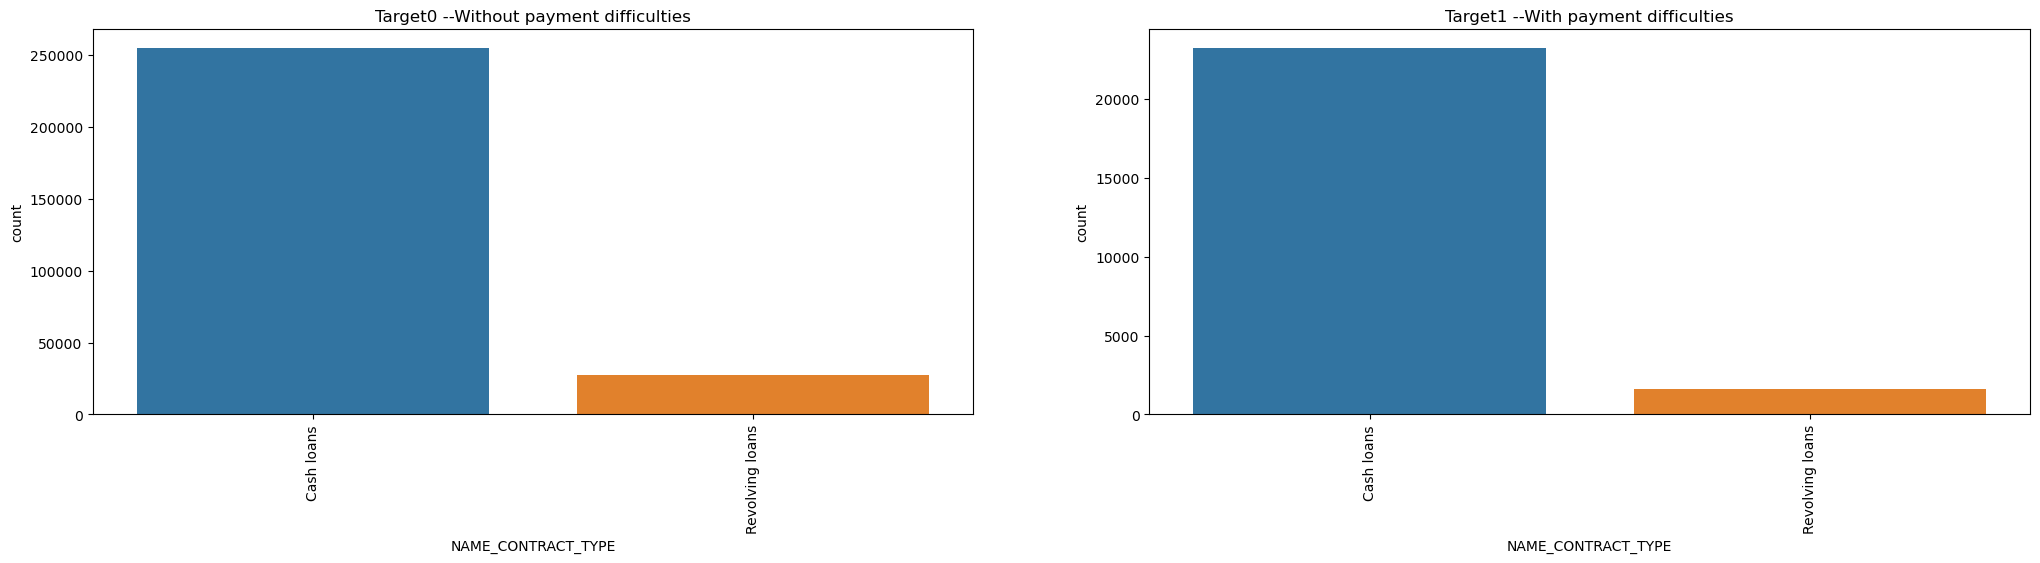

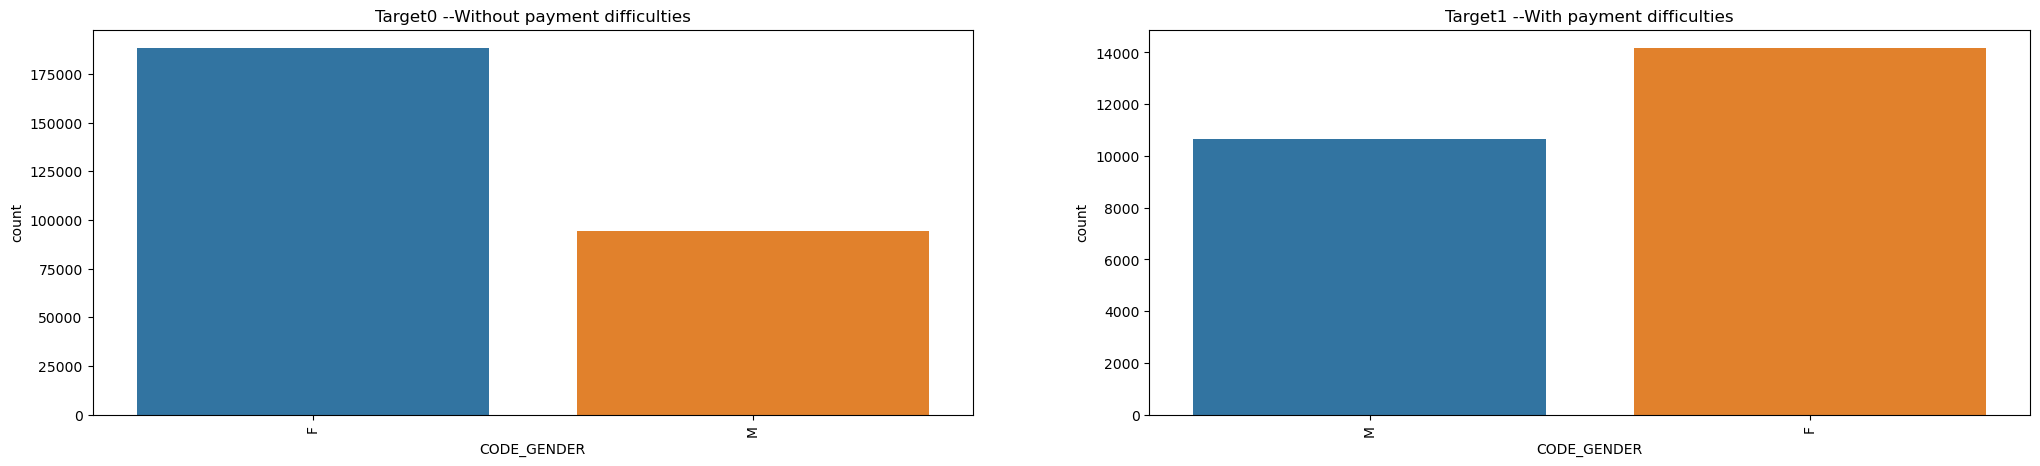

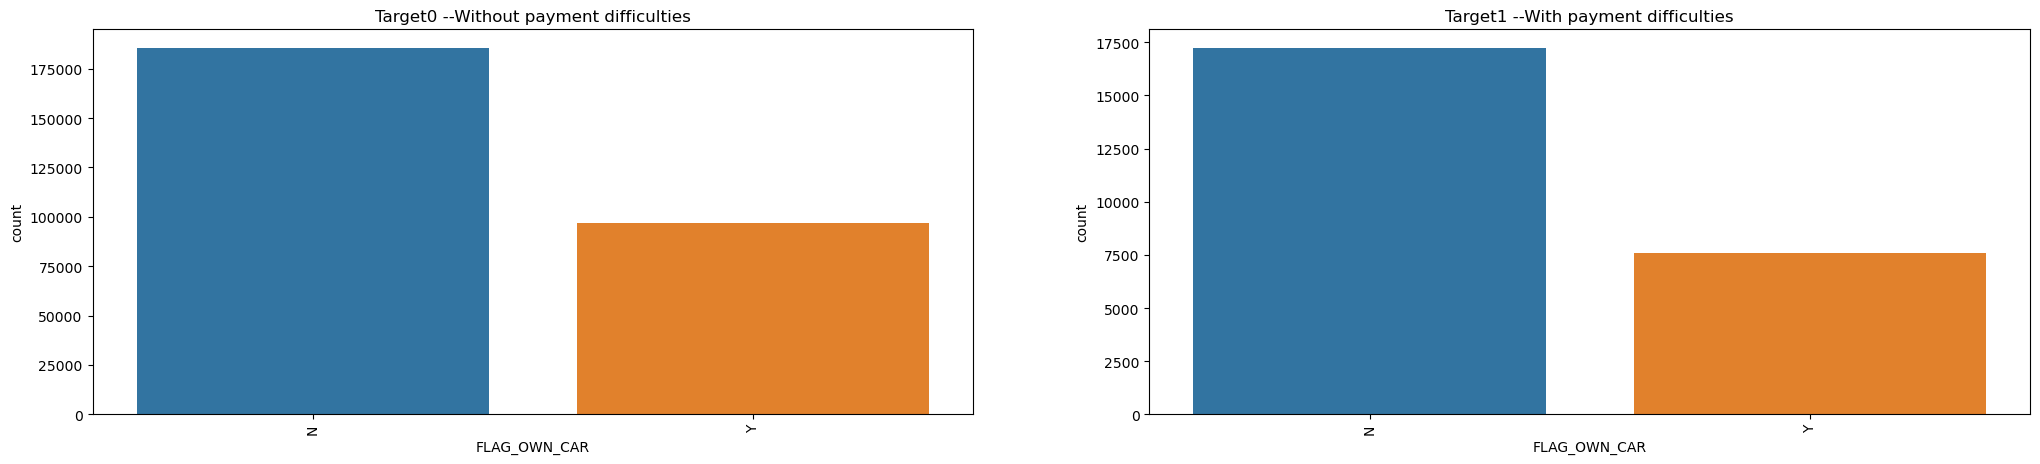

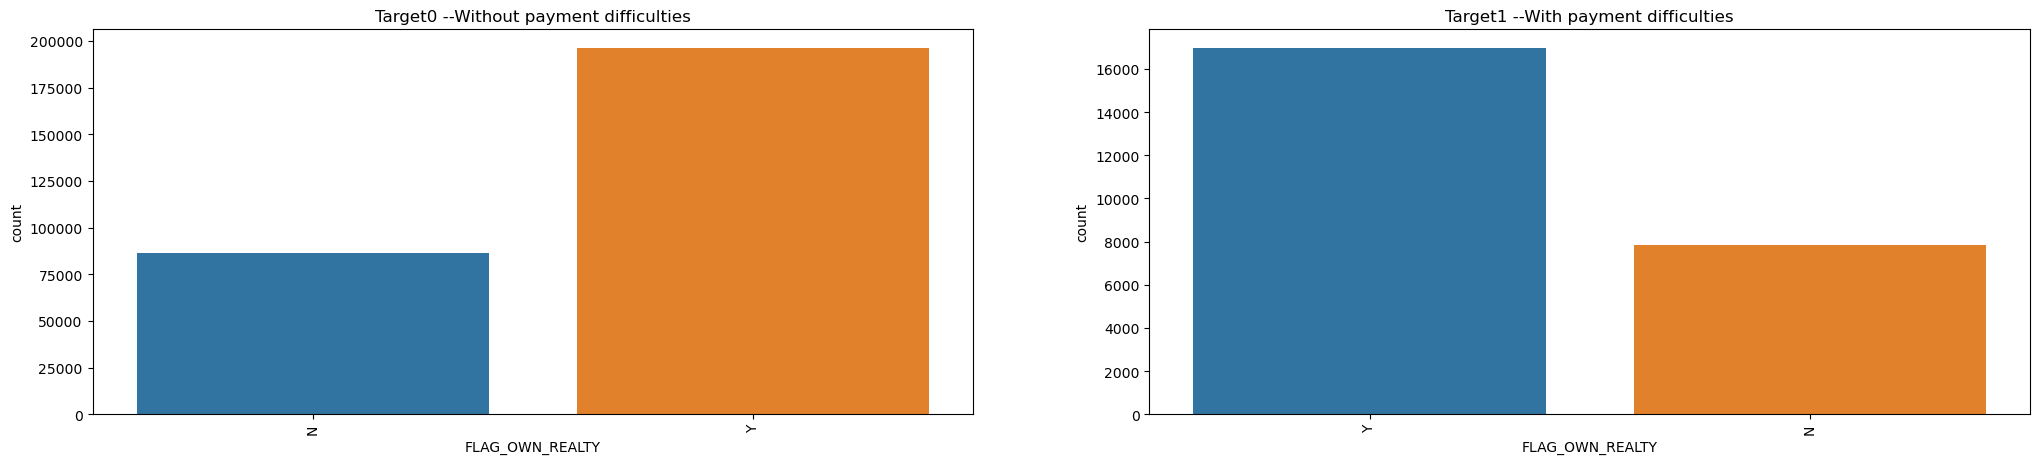

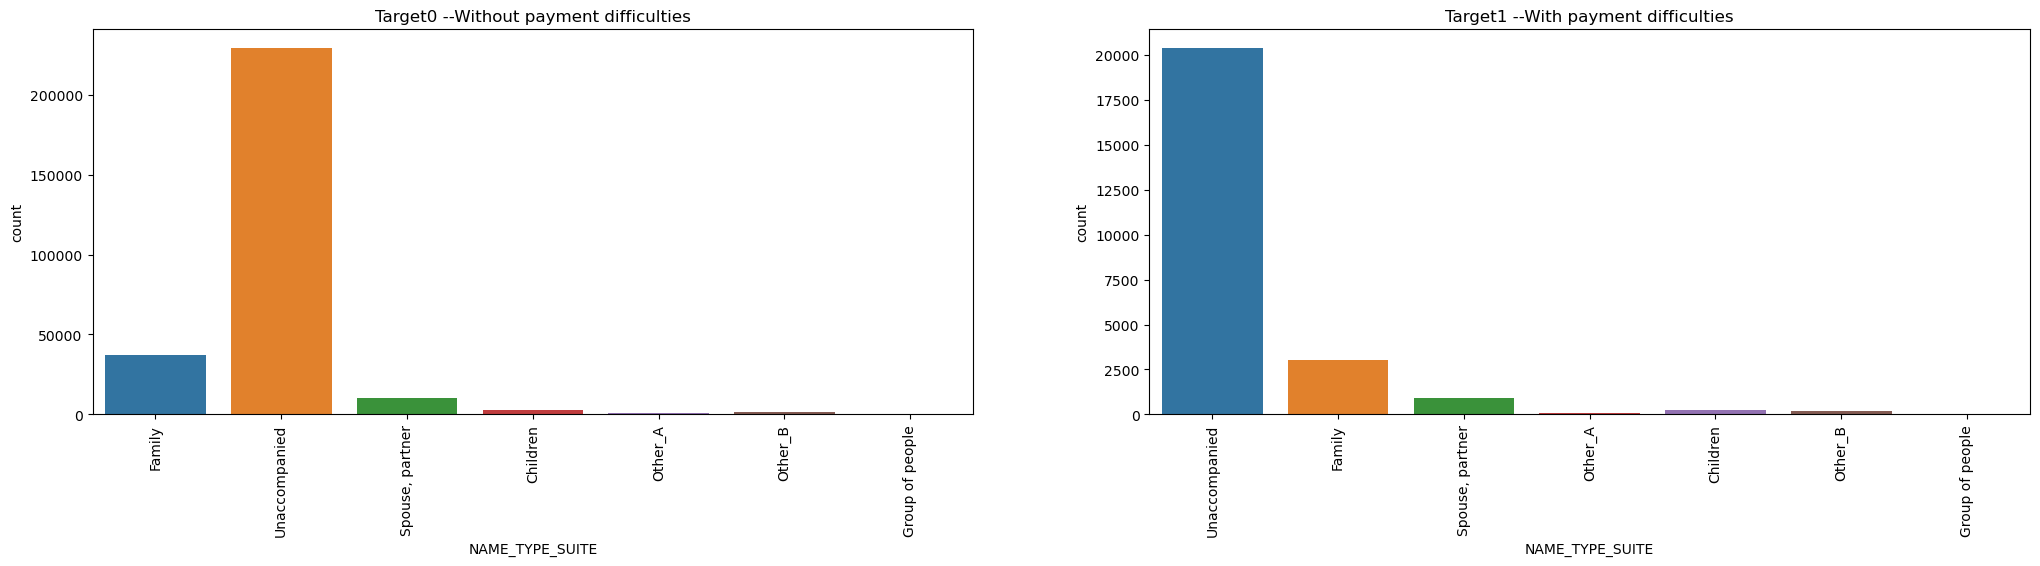

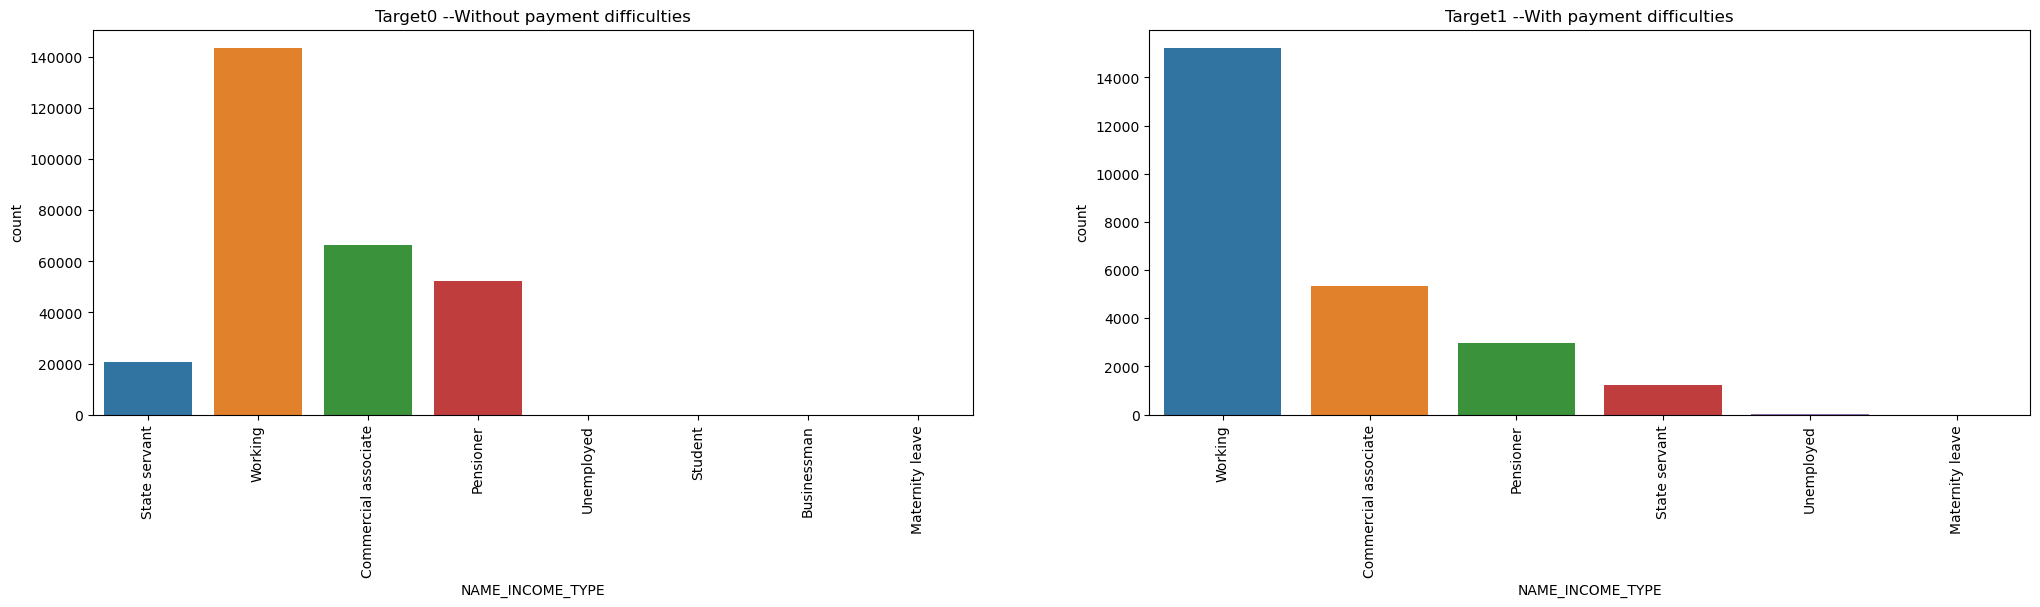

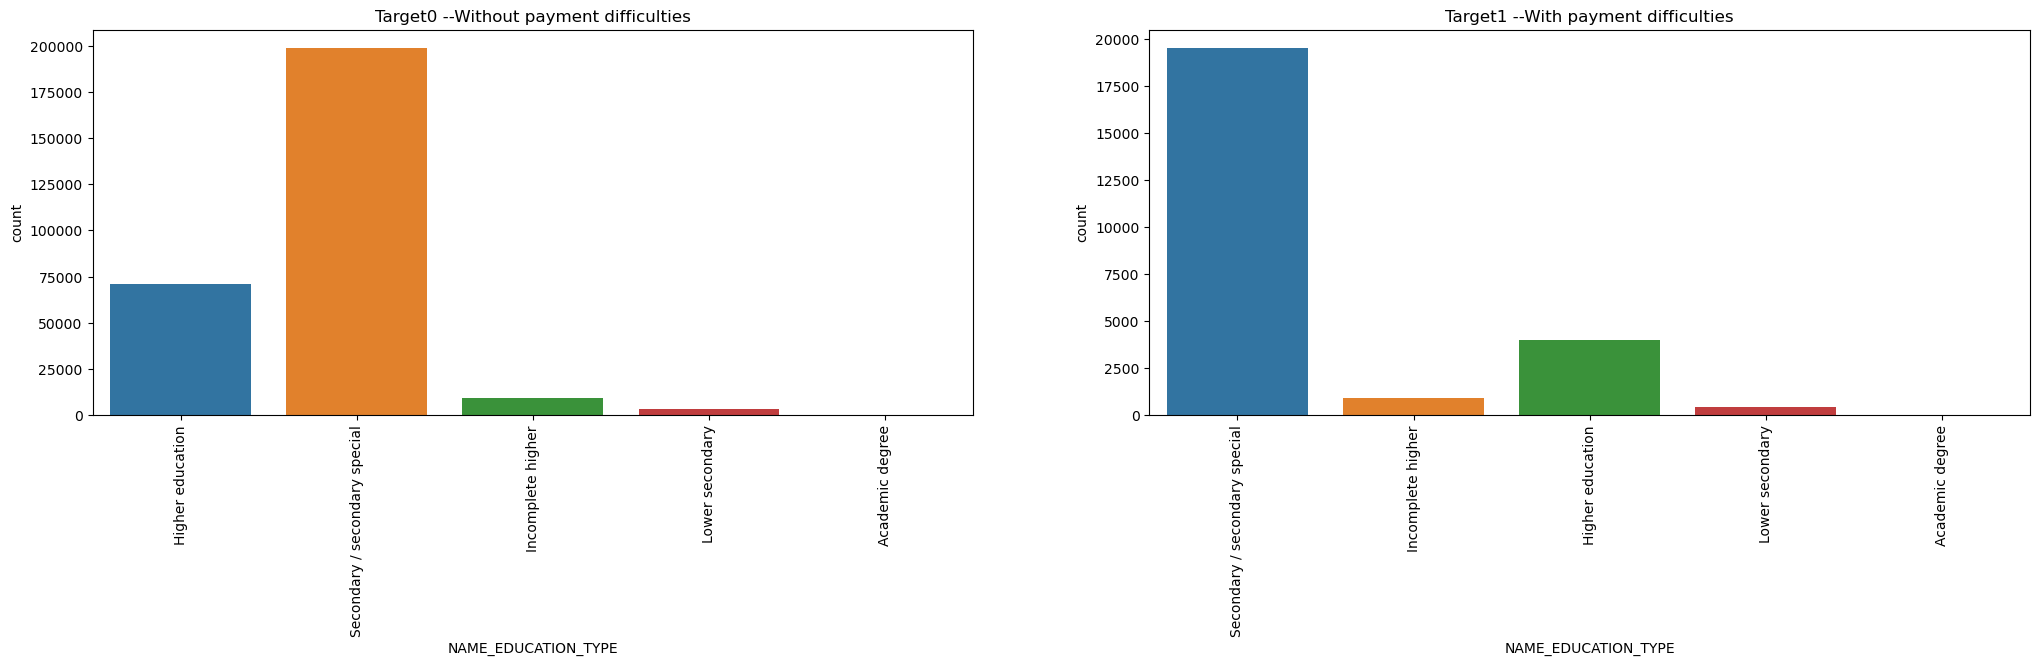

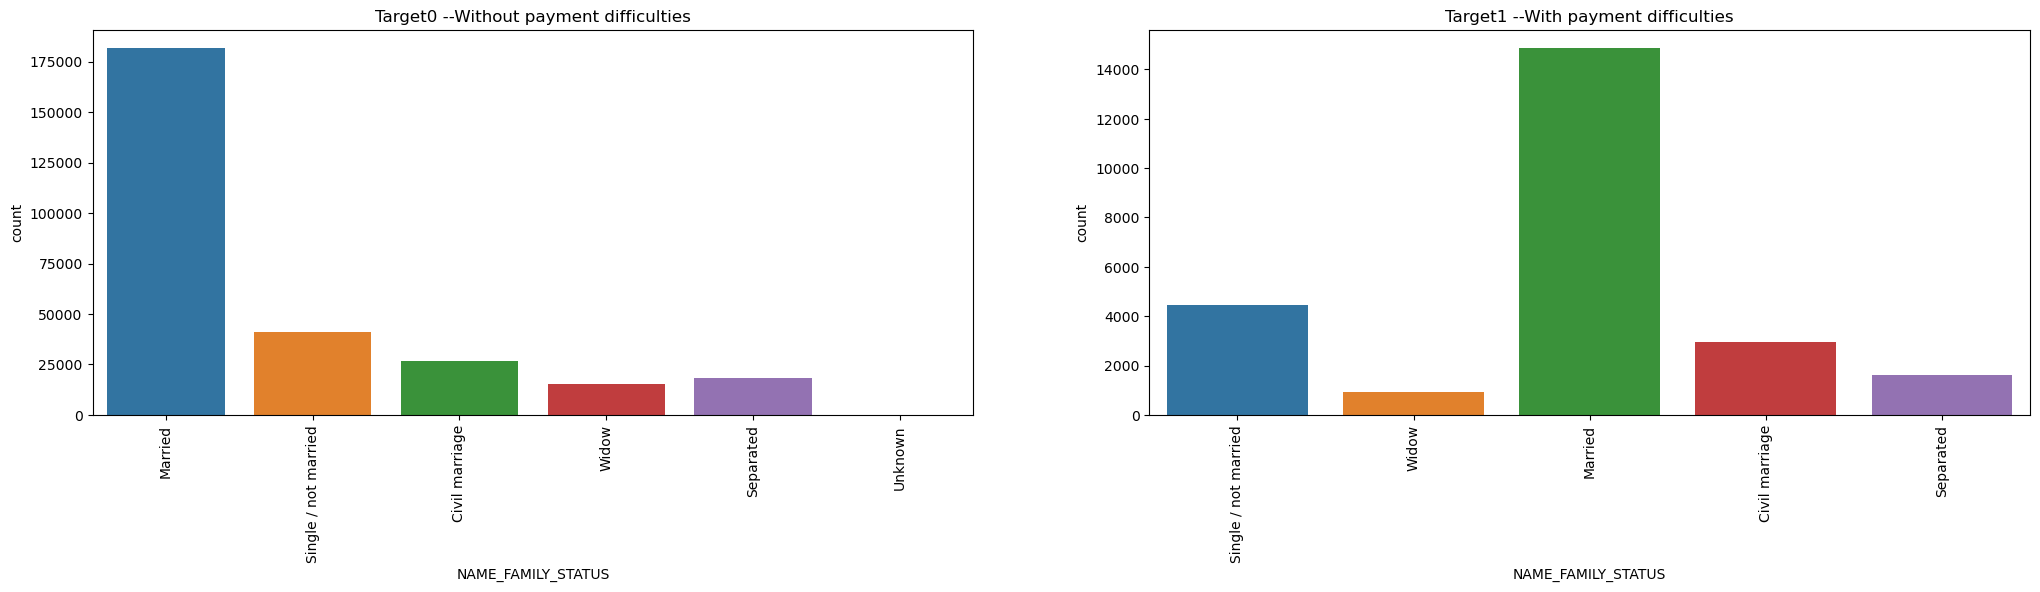

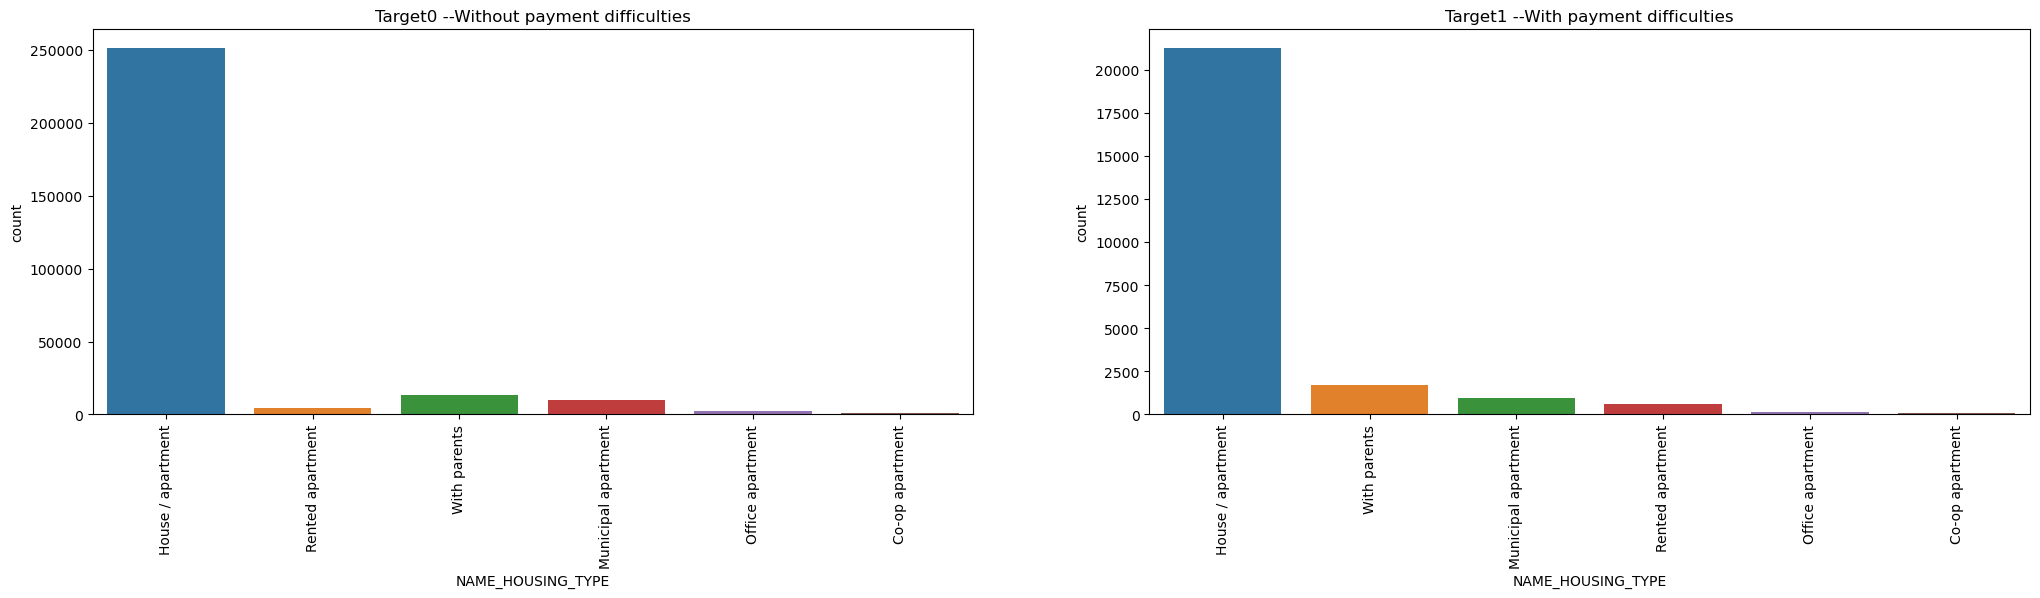

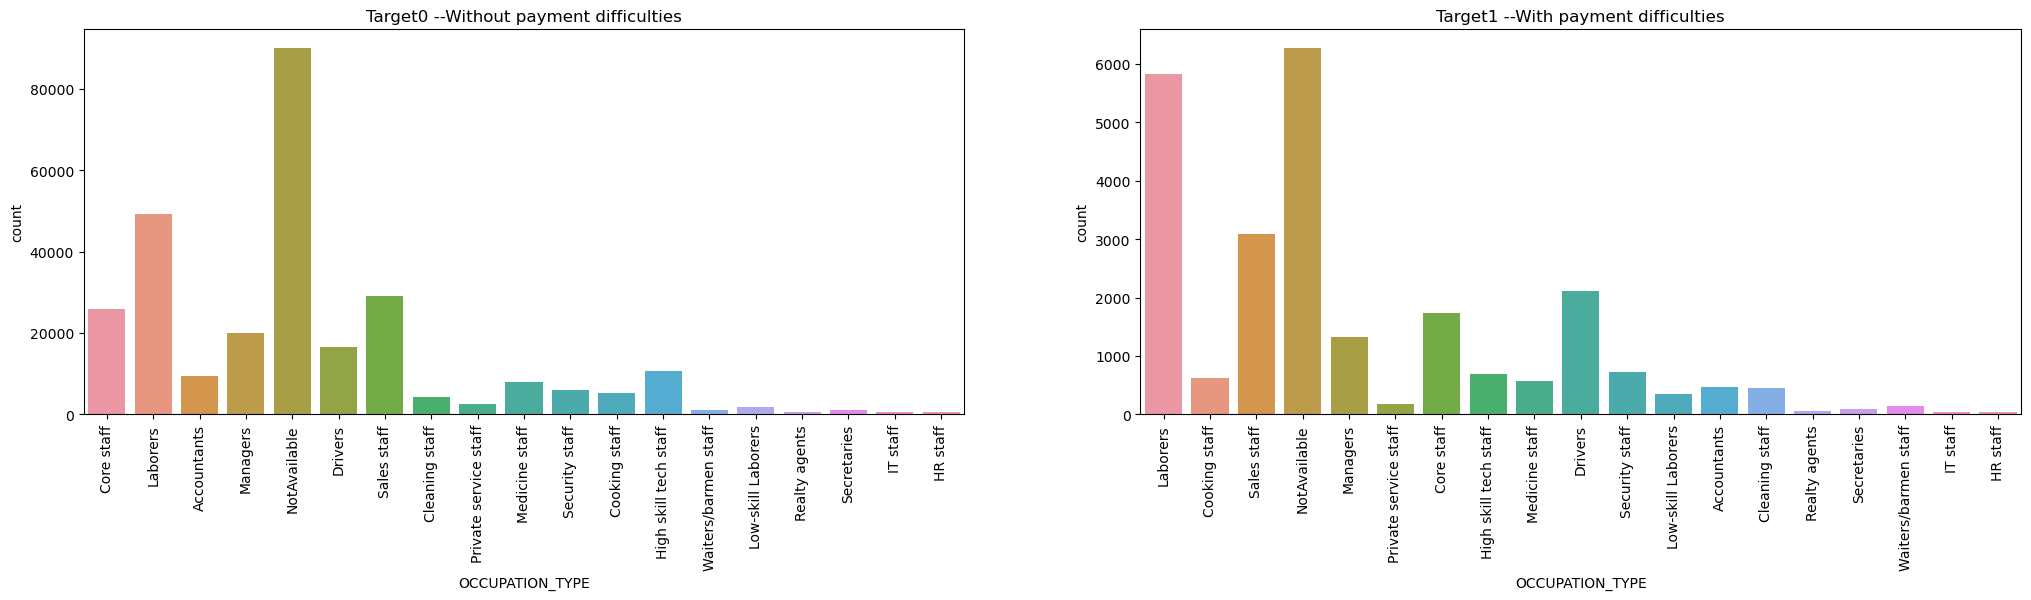

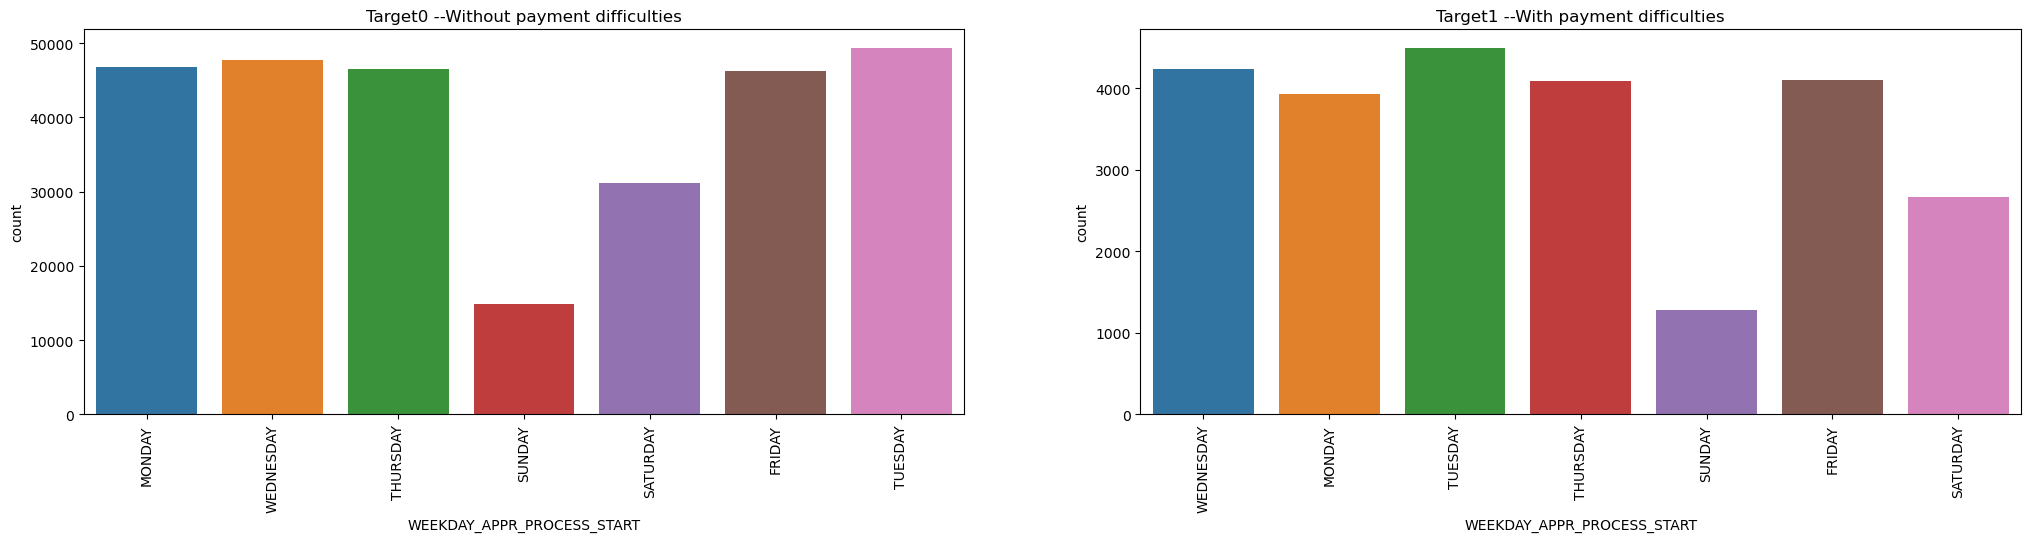

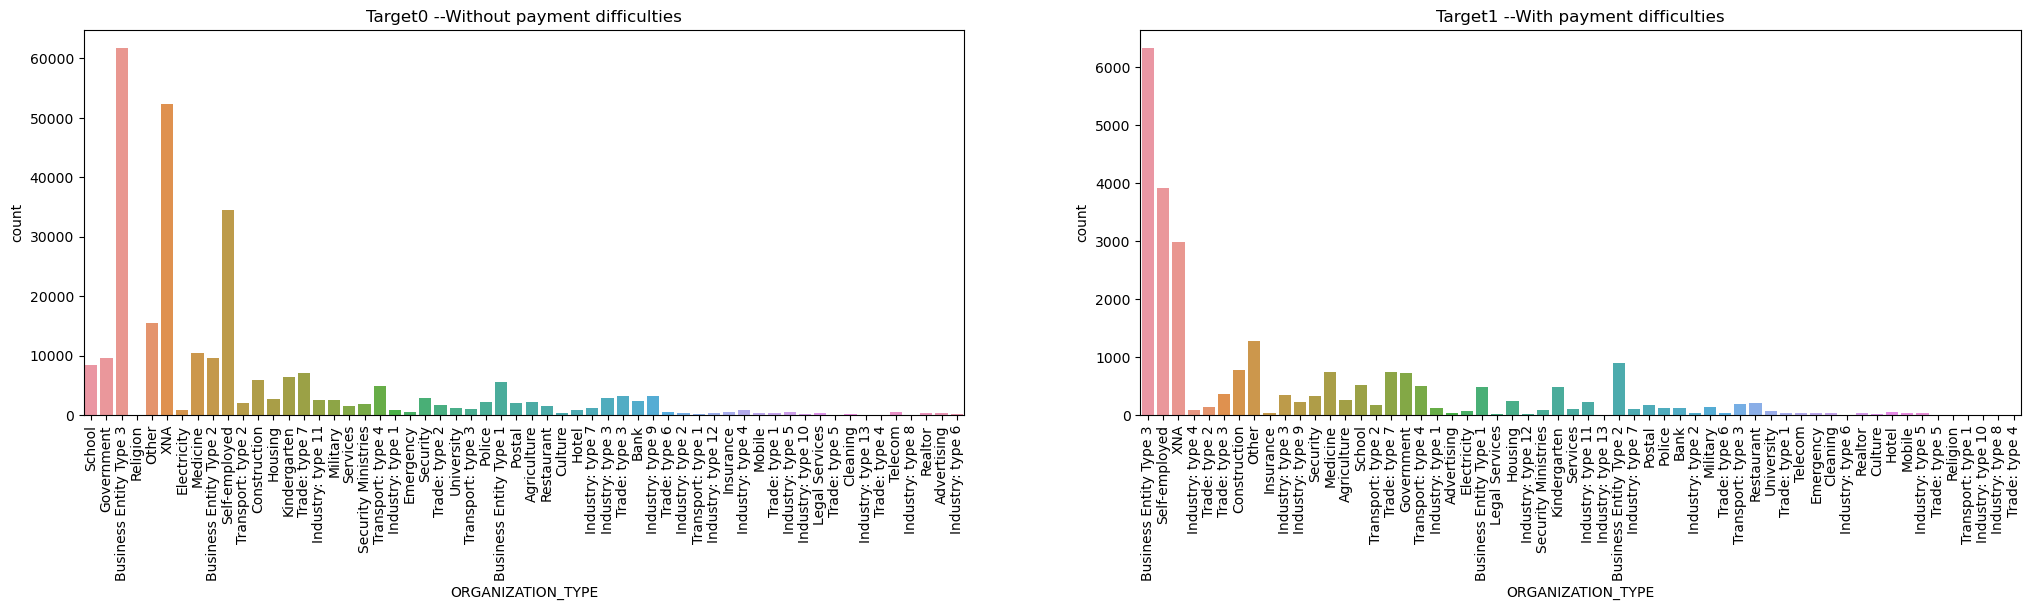

In [131]:
##Plotting frequency distribution across categorical variables for Target0 and Target1 ie with/-Without payment difficulties
cols=df_application_data.select_dtypes(include=['object']).columns.tolist()
for i in cols:
    
    plt.figure(figsize=(25,5))
    plt.subplot(1,2,1)
    sns.countplot(data=Target0 ,x=i)
    plt.xticks(rotation=90)
    plt.title('Target0 --Without payment difficulties')
    
    plt.subplot(1,2,2)
    sns.countplot(data=Target1 ,x=i)
    plt.xticks(rotation=90)
    plt.title('Target1 --With payment difficulties')
     
    plt.show()

'Cash Loans' Contract Type has highest frequency irrespective of With/Without payment difficulties.

Females are more in both  With/Without payment difficulties cases but an increase is observed 
in the case of Male With Payment difficulties.

'Working' income type has hightest cases in With/Without payment difficulties but there is decrease in percentage in 'State Govt','Commercial associate' & 'Pensioners' in case of 'With Payment difficulties'. 

Secondary Education type has the highest frequency irrespective of With/Without payment difficulties.
Customers is having 'Higher education' is having less Payment difficulties. 

Customers living in House/Apartment has the highest frequency irrespective of With/Without payment difficulties but Customers living with parents are having more Payment difficulties. 

Among non-missing data, although 'Laborers' has the highest frequency irrespective of With/Without payment difficulties but in case of Payment difficulties ,their percentage is more compared to other occupation types.


### BiVariate Analysis

Numerical-Numerical

<Figure size 6000x6000 with 0 Axes>

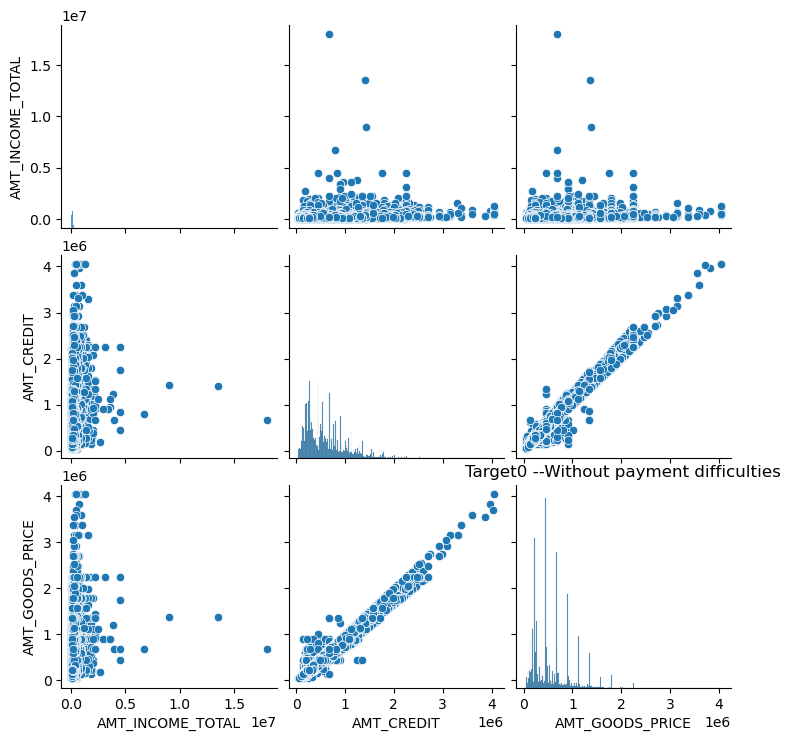

In [132]:
##Pair plot for Target0 numerical variable combinations
cols=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE' ]

plt.figure(figsize=(60,60))
sns.pairplot(Target0[cols])
plt.title('Target0 --Without payment difficulties')
plt.show()

<Figure size 6000x6000 with 0 Axes>

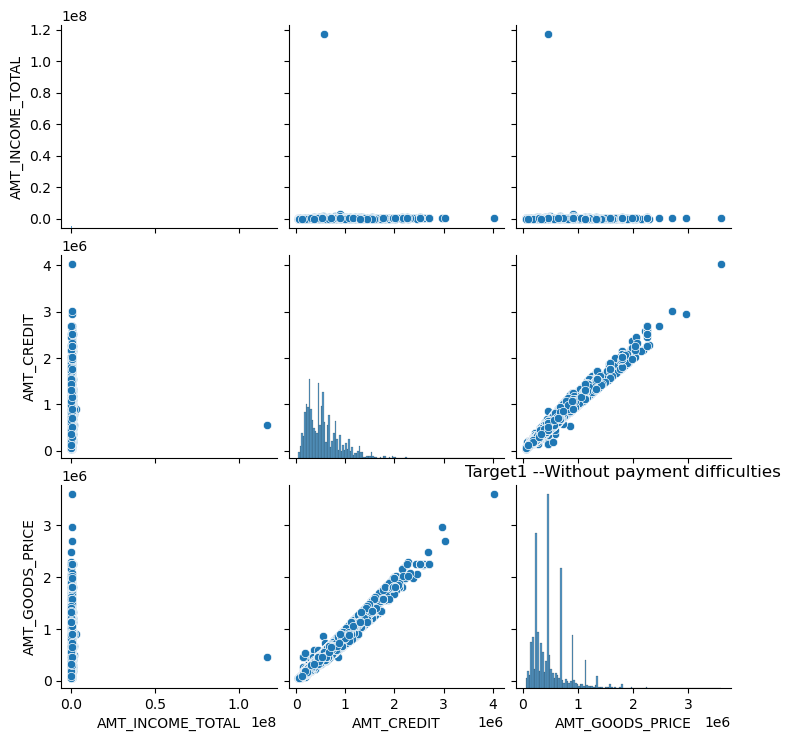

In [133]:
##Pair plot for Target0 numerical variable combinations
cols=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE' ]

plt.figure(figsize=(60,60))
sns.pairplot(Target1[cols])
plt.title('Target1 --Without payment difficulties')
plt.show()

For both default and non-default categories, following columns has high linear co-relationship:
'AMT_CREDIT'-- 'AMT_GOODS_PRICE'
'AMT_ANNUITY'-- 'AMT_GOODS_PRICE'
'AMT_ANNUITY'--'AMT_CREDIT'

Customers having larger Amount of Credit and more Goods Price have low probability to default

For Customers with less income take more loan amount and more income have less difficulties in payments


### Numerical -Categorical BiVariate Analysis

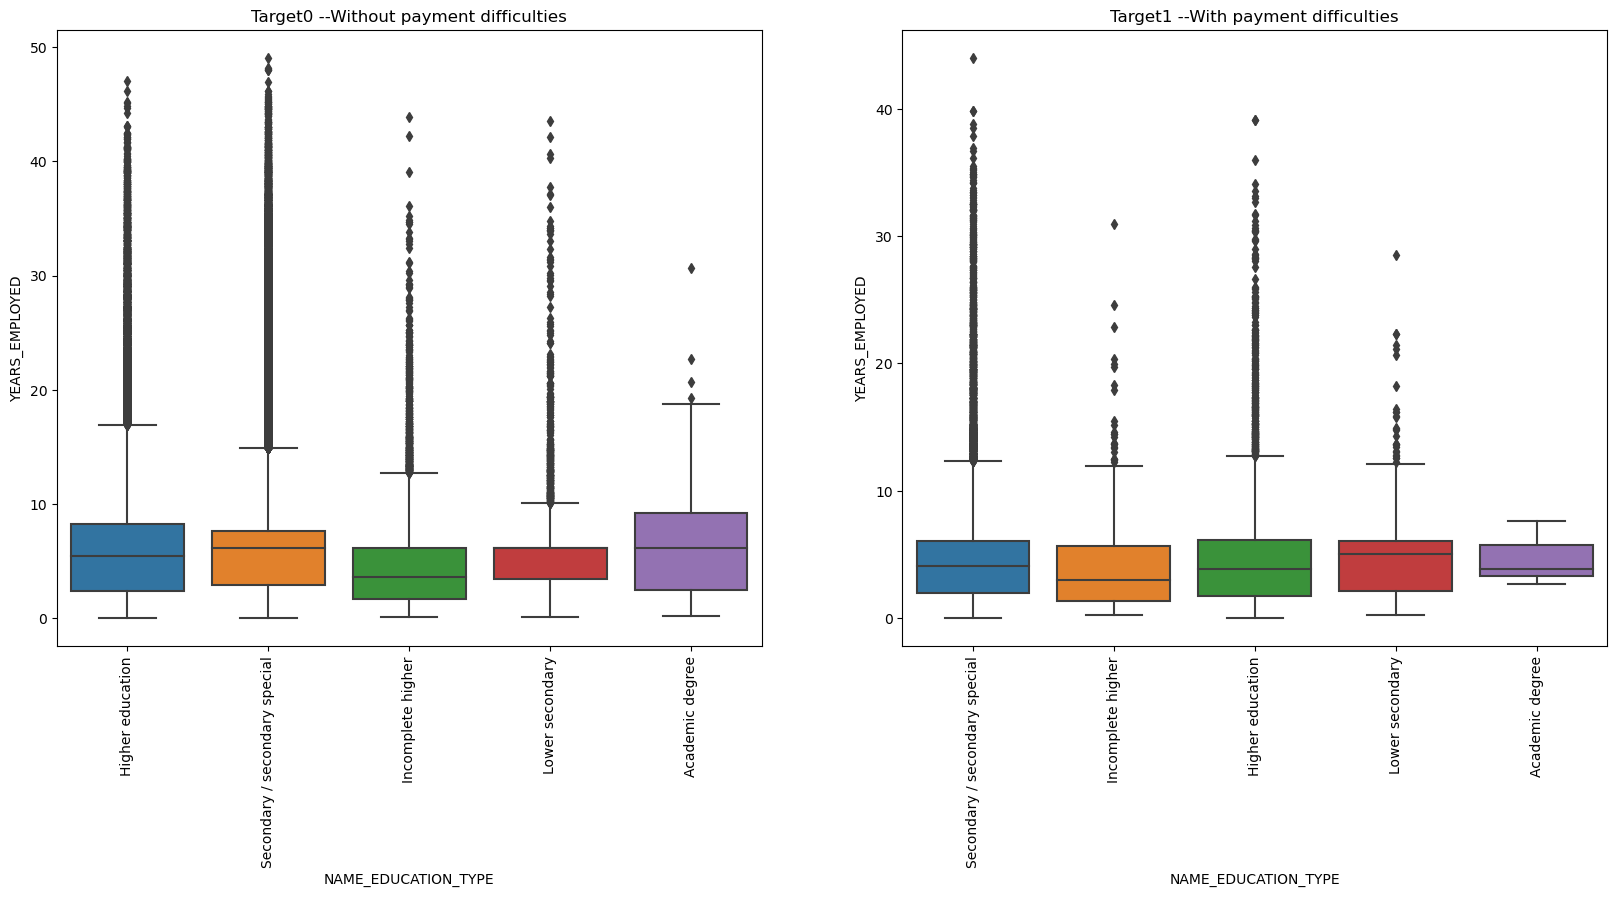

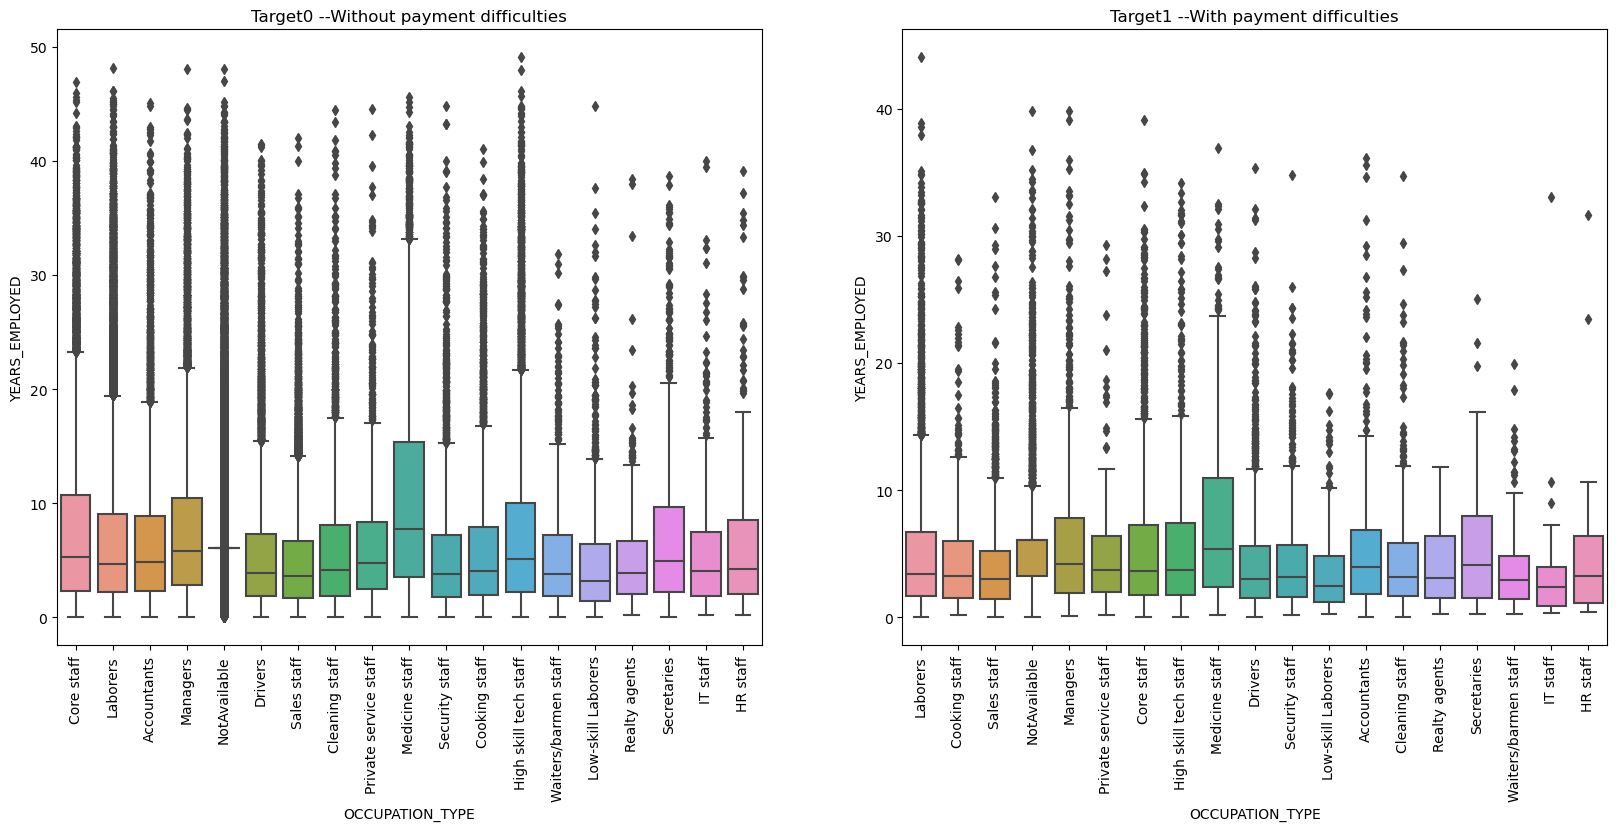

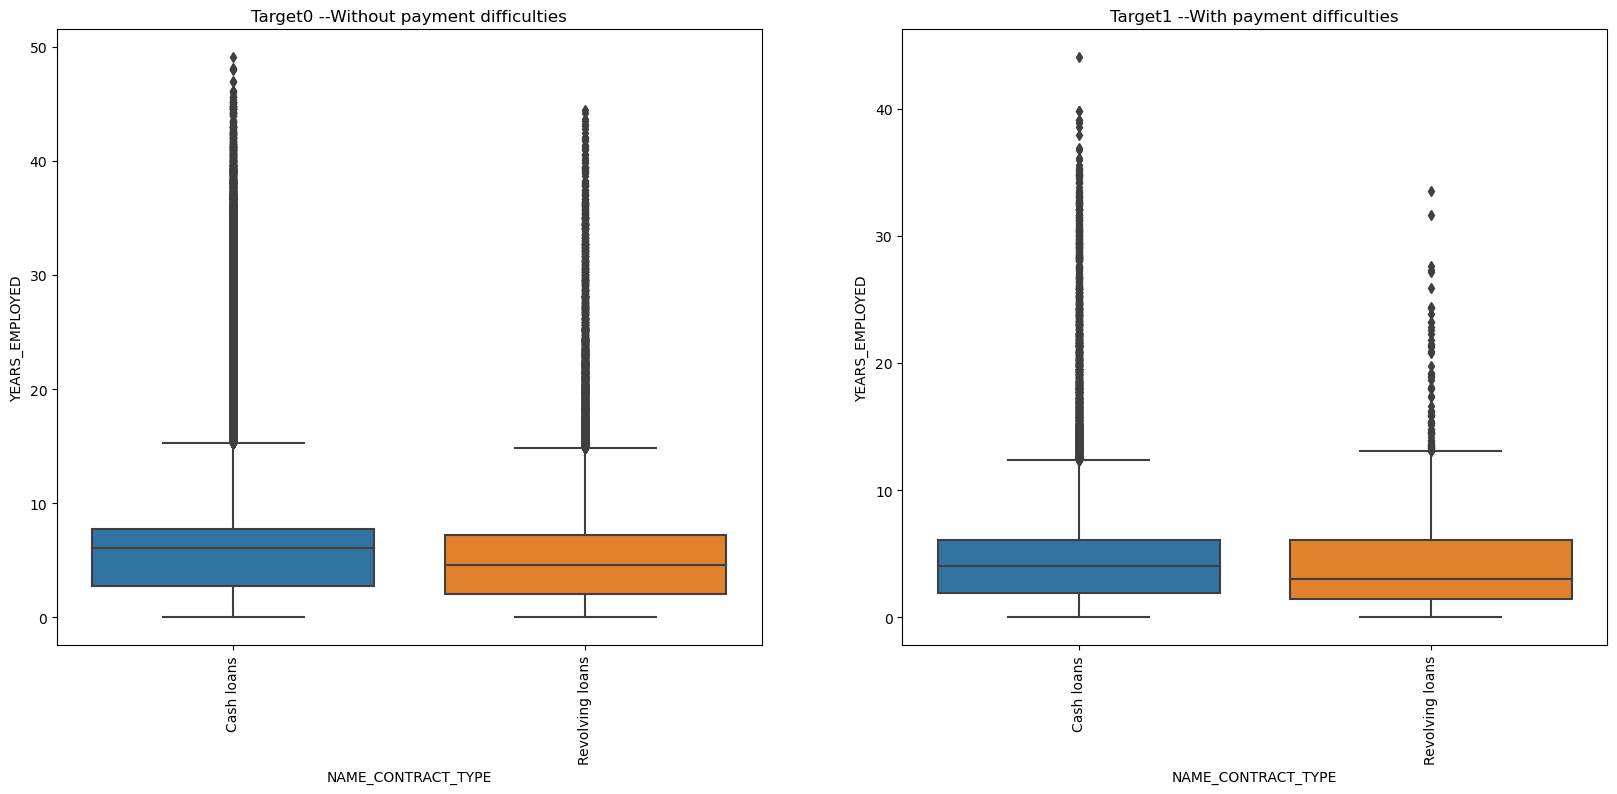

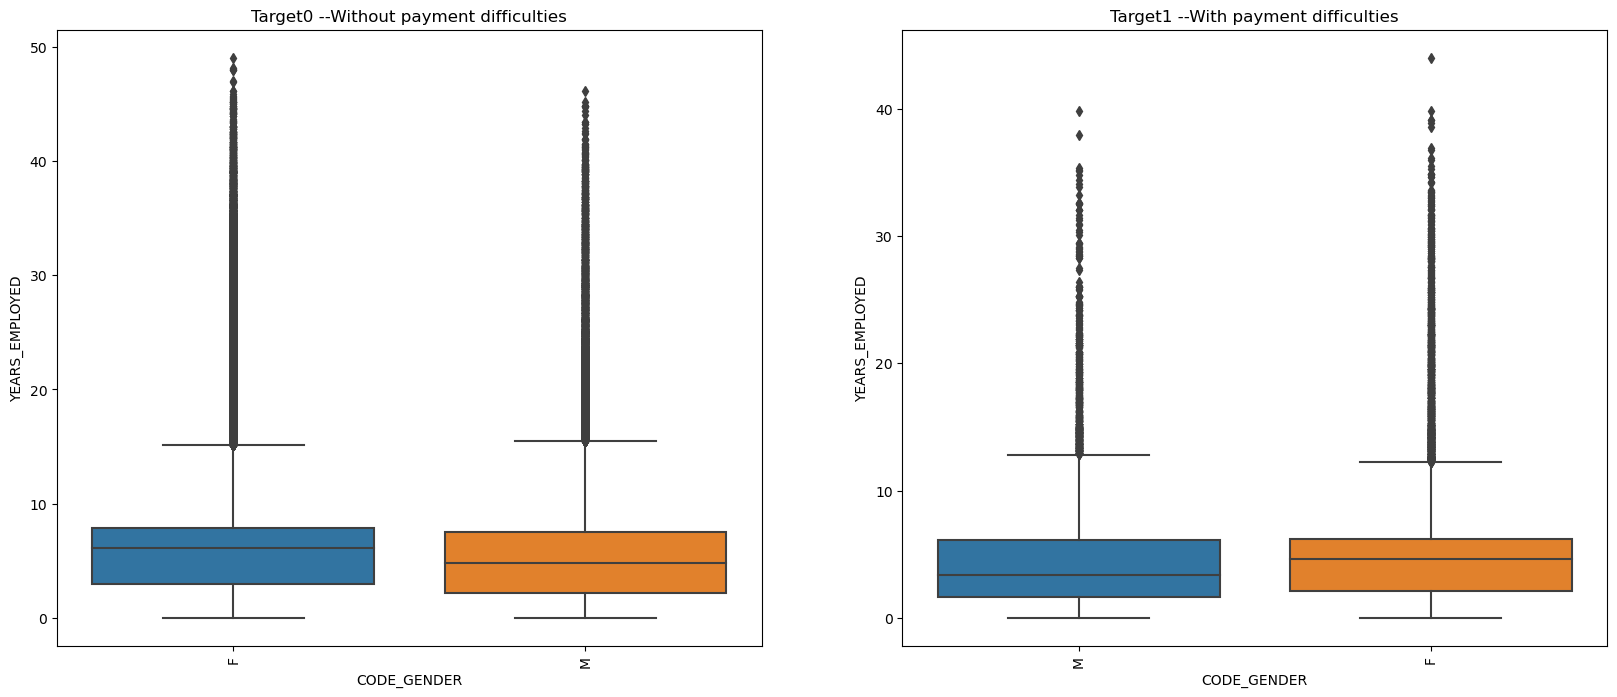

In [134]:
#bivariate analysis on YEARS_EMPLOYED and categorical variables 
cols_x=['NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER']

for i in cols_x:
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.boxplot(data=Target0,y='YEARS_EMPLOYED',x=i)
    plt.xticks(rotation=90)
    plt.title('Target0 --Without payment difficulties')

    plt.subplot(1,2,2)
    sns.boxplot(data=Target1,y='YEARS_EMPLOYED',x=i)
    plt.title('Target1 --With payment difficulties')
    plt.xticks(rotation=90)
    plt.show()

Customers having Academic degree has least and lower secondary has most payment difficulties.

Medicine Staff has least and Low Skilled laborers and Drivers have most payment difficulties.

Female Gender is more reliable in payments

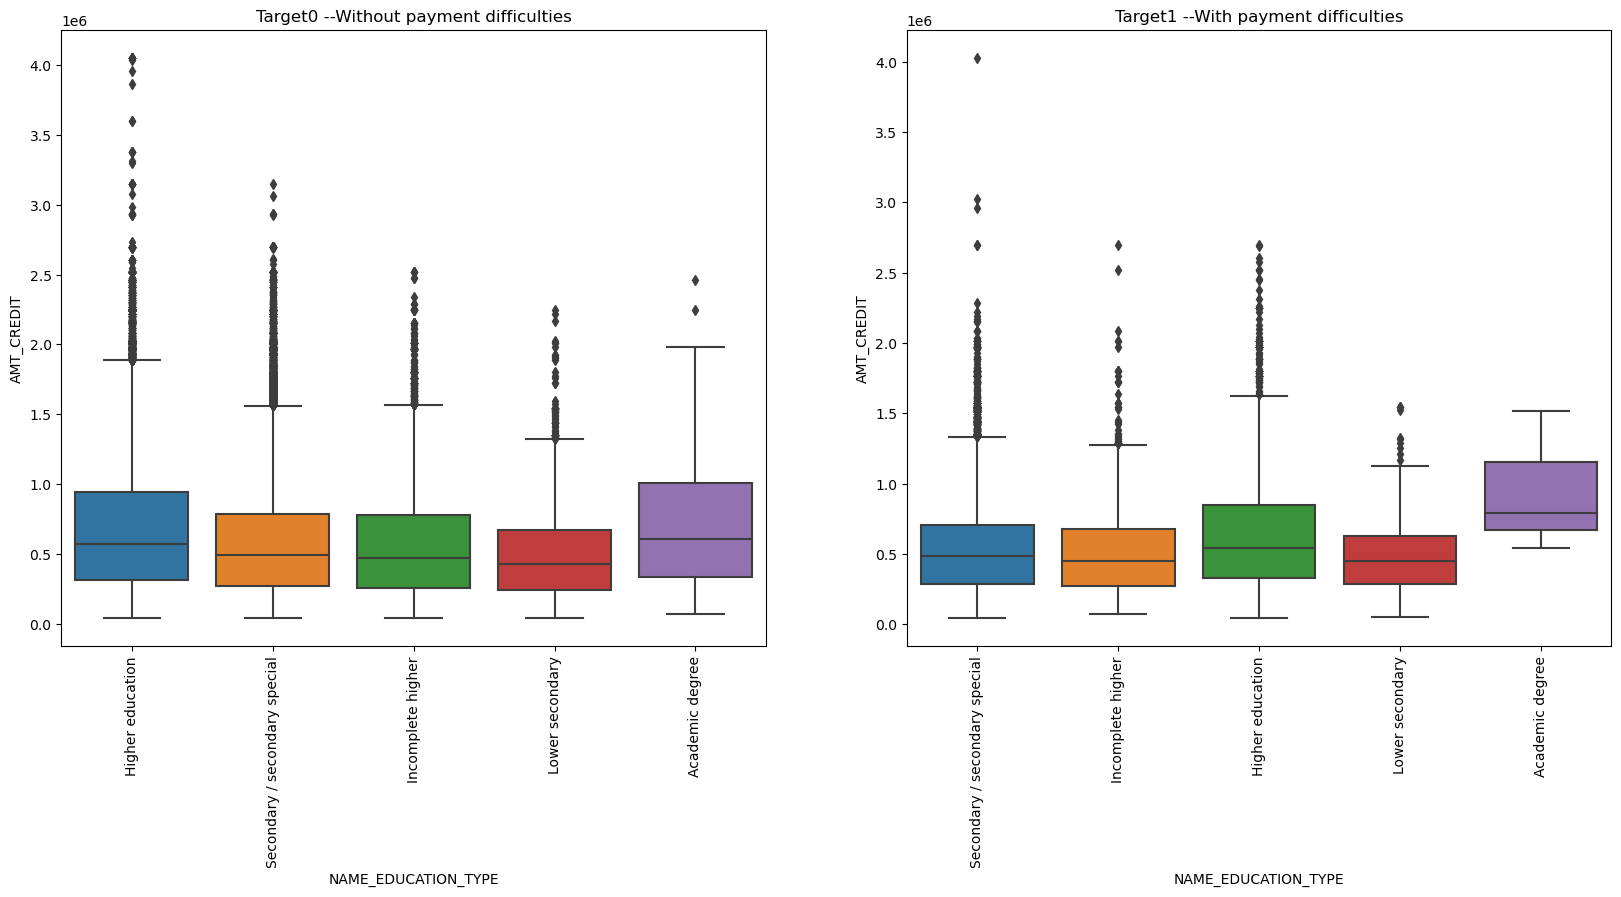

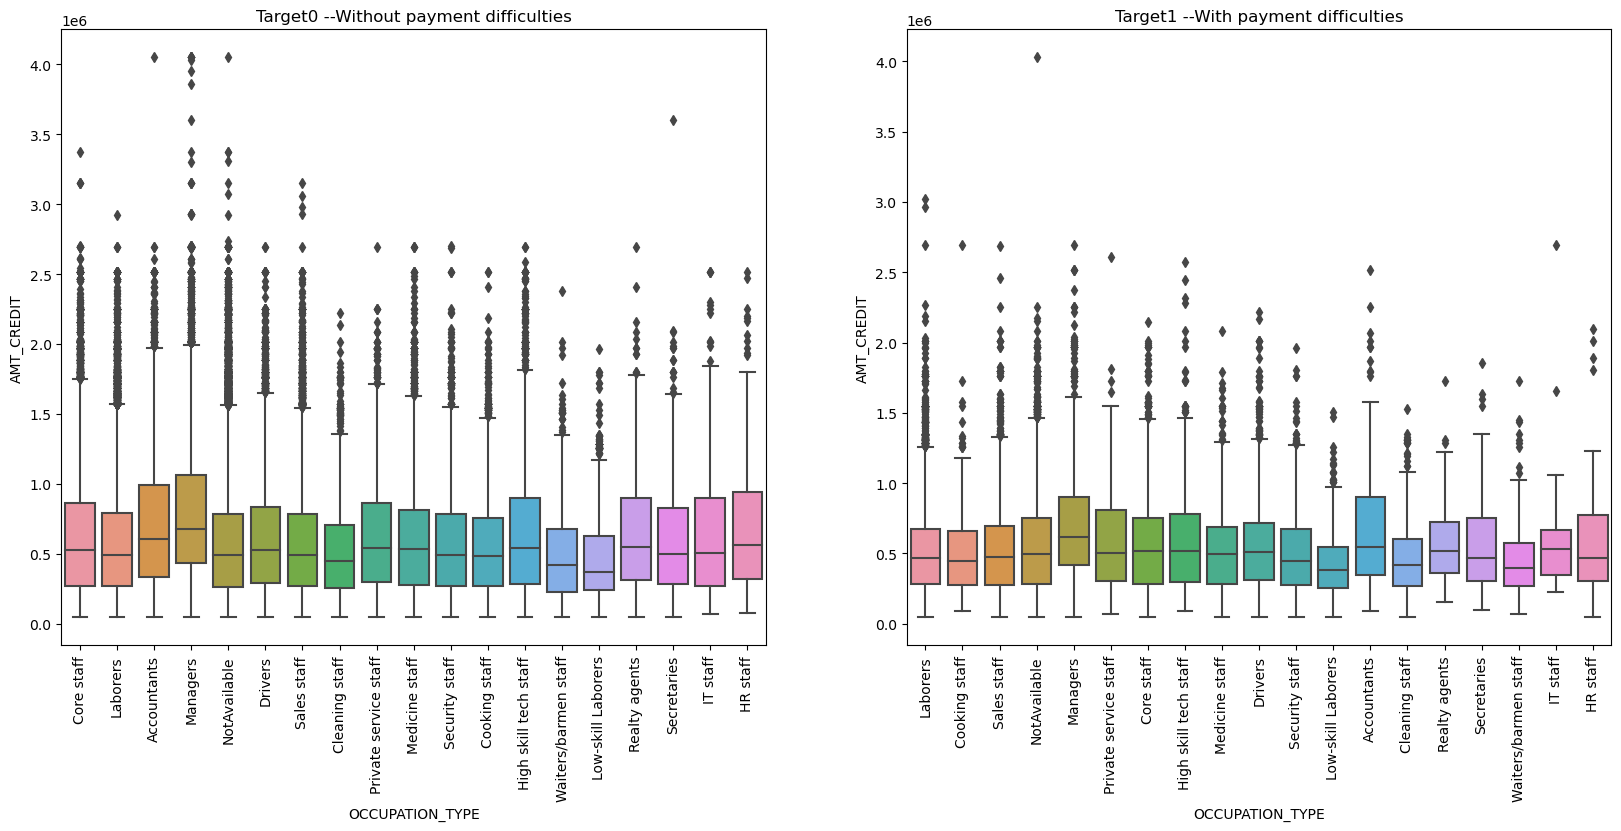

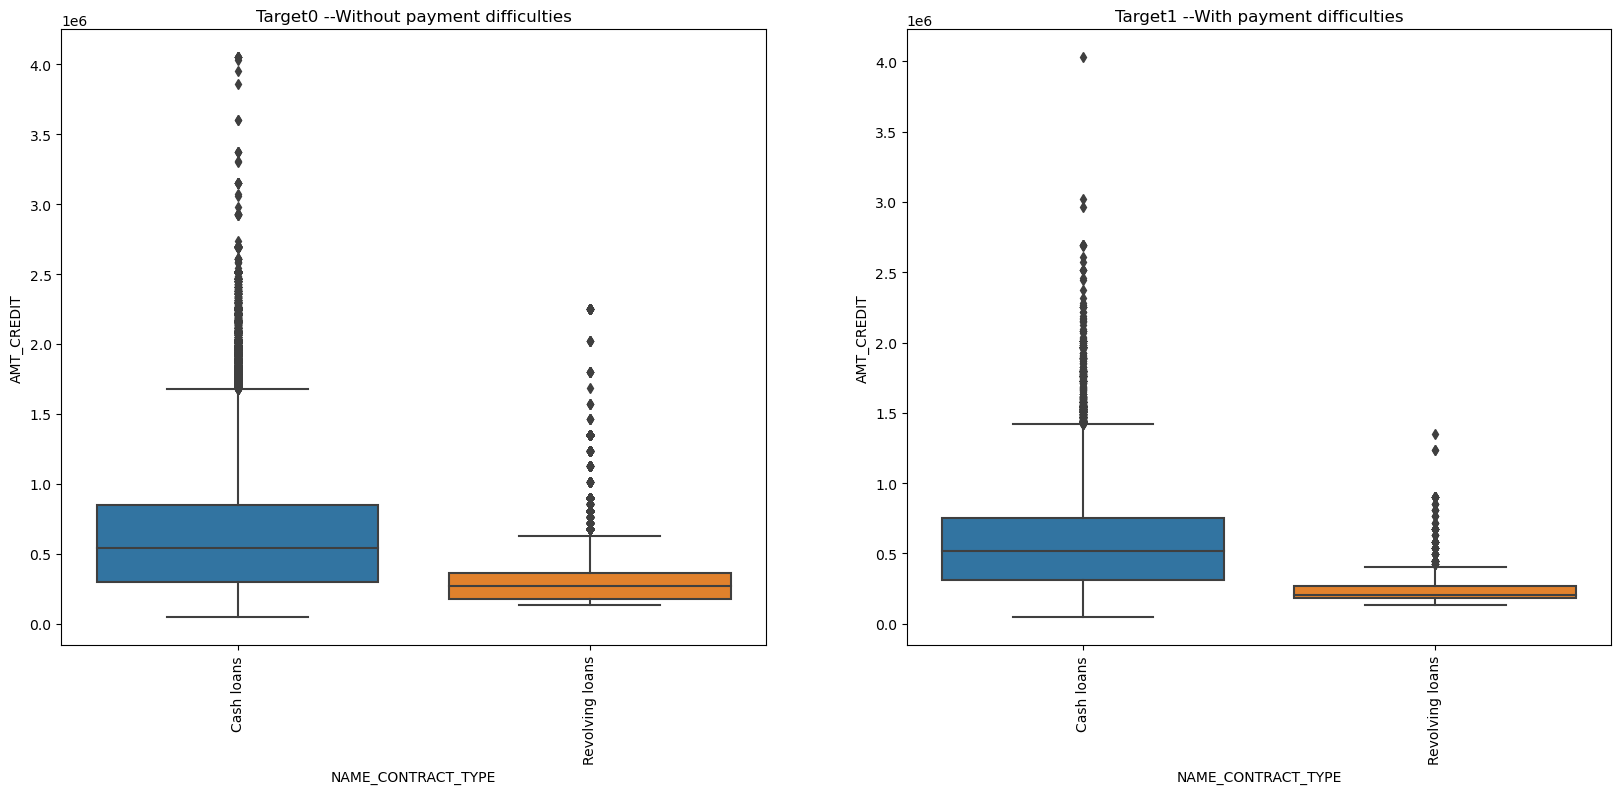

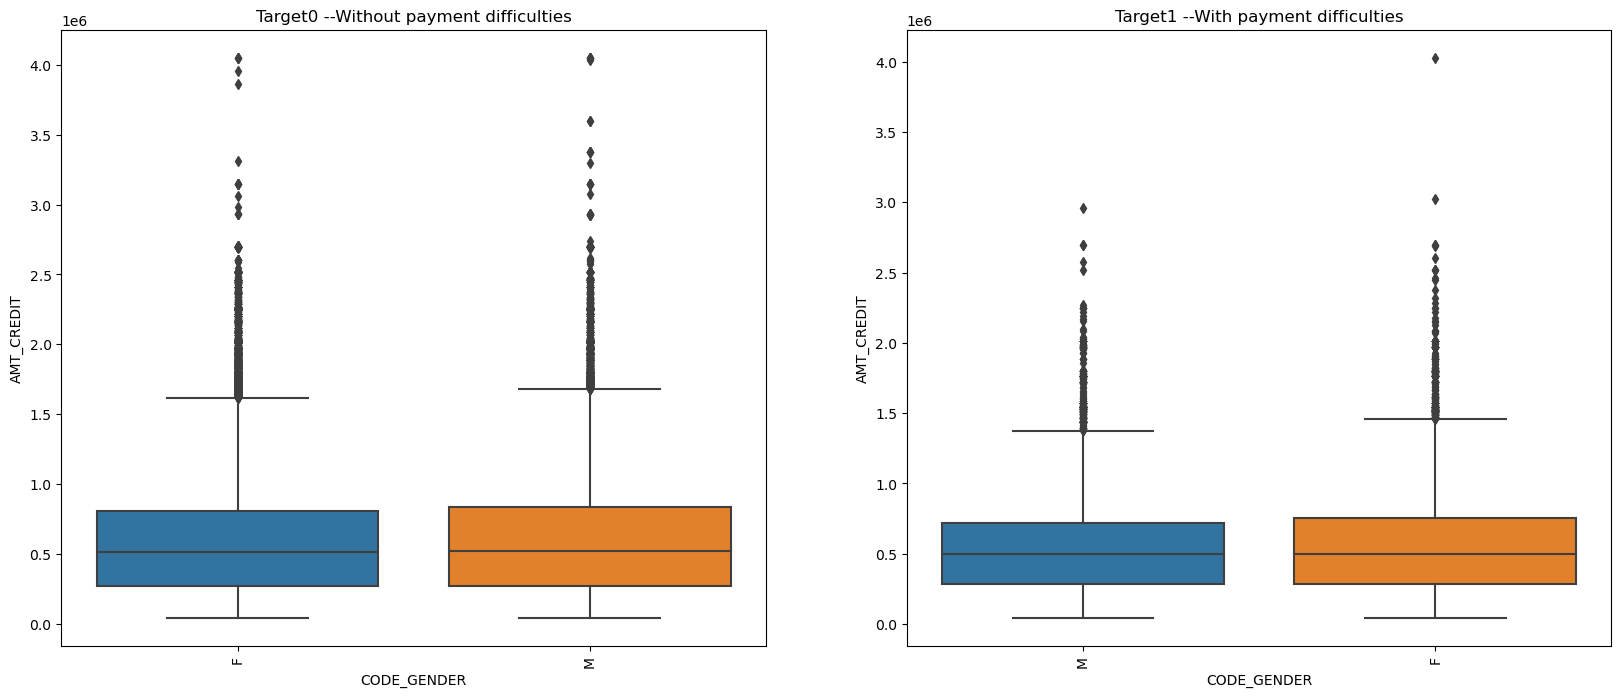

In [135]:
#bivariate analysis on AMT_CREDIT and categorical variables like NAME_EDUCATION_TYPE,'OCCUPATION_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER'

cols_x=['NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER']

for i in cols_x:
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.boxplot(data=Target0,y='AMT_CREDIT',x=i)
    plt.xticks(rotation=90)
    plt.title('Target0 --Without payment difficulties')

    plt.subplot(1,2,2)
    sns.boxplot(data=Target1,y='AMT_CREDIT',x=i)
    plt.title('Target1 --With payment difficulties')
    plt.xticks(rotation=90)
    plt.show()

Amount Credit is highest higher Quartile for 'Academic degree' & lowest Lower Quartile for 'Lower Secondary' Education Type 
for both default /non default cases.

Amount Credit is highest higher Quartile among 'Managers' & 'Accountants' & lowest Lower Quartile for 'Low-Skill Laborers' Occupation Type for both default /non default cases.

### MUltivariate Analysis using correlation & Heat Map

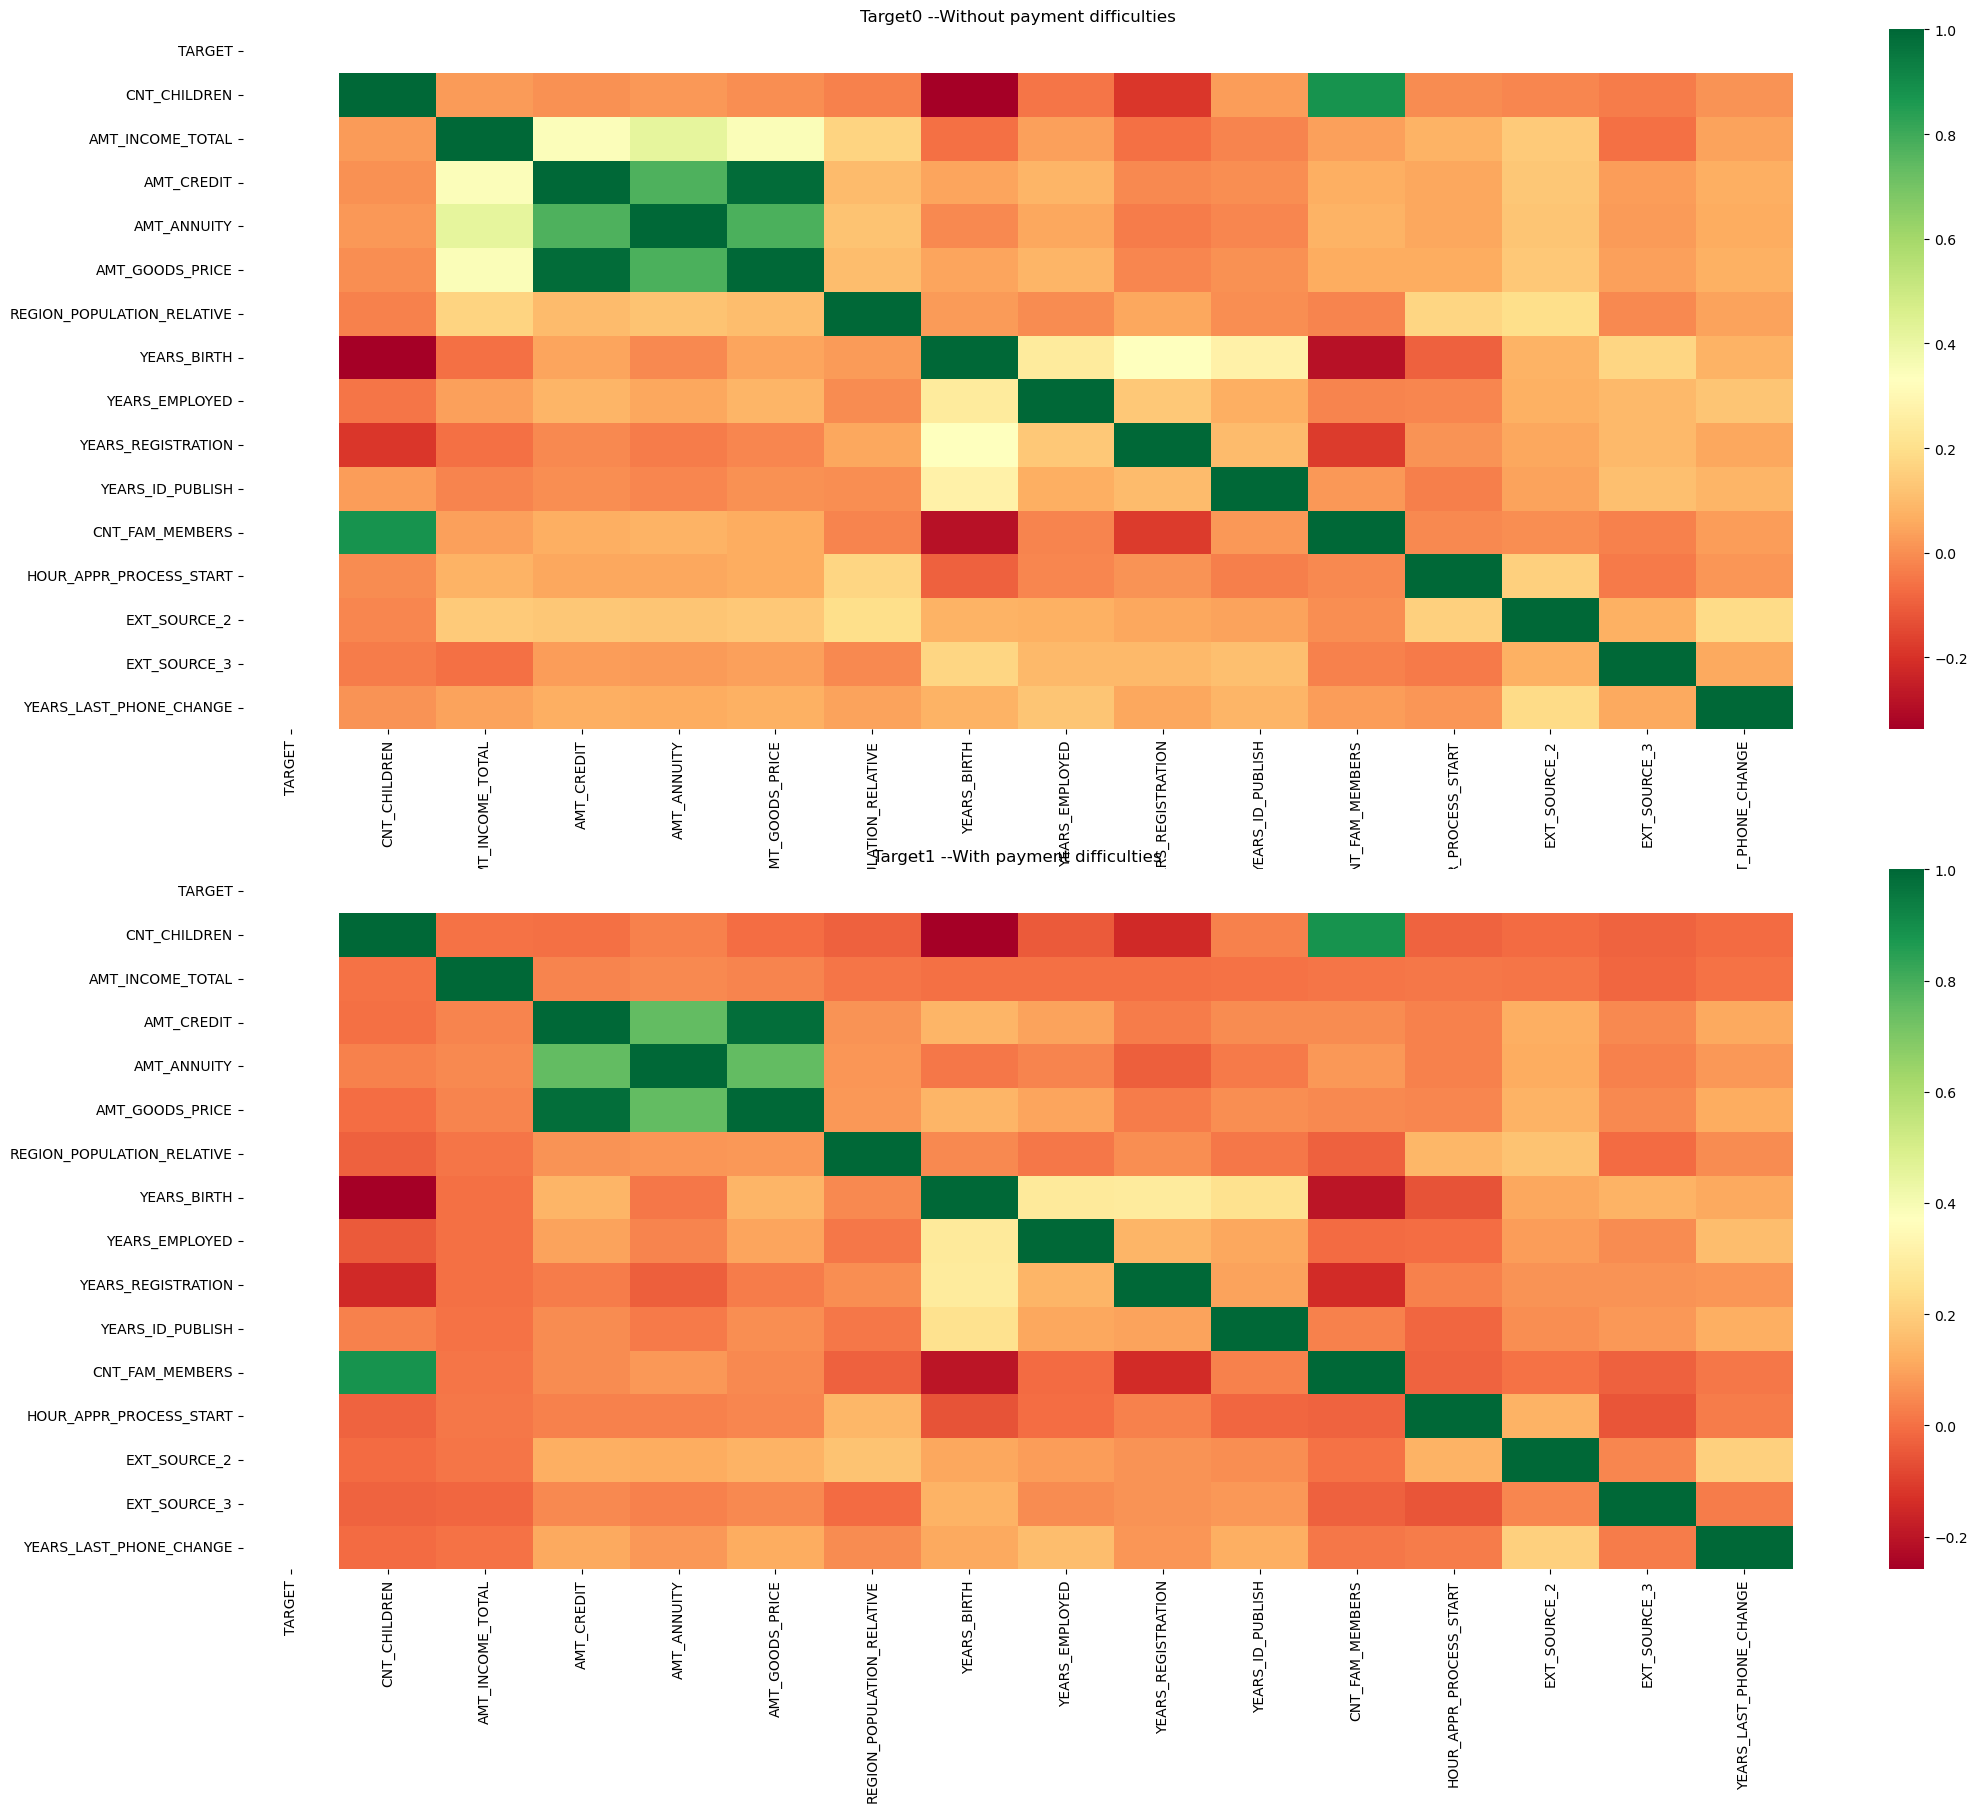

In [136]:
##Plotting correlation distribution across numerical variables for Target0 and Target1 ie with/-Without payment difficulties
#cols=df_application_data.select_dtypes(include=['int','float']).columns.tolist()
cols=['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_LAST_PHONE_CHANGE']

plt.figure(figsize=(25,20))

plt.subplot(2,1,1)
sns.heatmap(Target0[cols].corr(),cmap='RdYlGn')
plt.title('Target0 --Without payment difficulties')

plt.subplot(2,1,2)
sns.heatmap(Target1[cols].corr(),cmap='RdYlGn')
plt.title('Target1 --With payment difficulties')

plt.show()

For Non defaulters, there is 
strong co-relation between 'AMT_CREDIT'-- 'AMT_GOODS_PRICE'
good co-relation between 'AMT_ANNUITY'-- 'AMT_GOODS_PRICE' & 'AMT_ANNUITY'--'AMT_CREDIT' & CNT_FAM_MEMBERS'--CNT_CHILDREN
& low relation between CNT_CHILDREN--YEARS_BIRTH & 'CNT_FAM_MEMBERS'--YEARS_BIRTH

In [137]:
##Order of Correlation between numerical variables
Target1_corr= df_application_data.corr().unstack().sort_values(ascending=False).drop_duplicates()
print(Target1_corr.head(10))
print(Target1_corr.tail(10))

SK_ID_CURR                   SK_ID_CURR                     1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998382
AMT_CREDIT                   AMT_GOODS_PRICE                0.986736
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878869
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.858342
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.825574
AMT_ANNUITY                  AMT_GOODS_PRICE                0.774835
                             AMT_CREDIT                     0.770124
dtype: float64
HOUR_APPR_PROCESS_START     REGION_RATING_CLIENT          -0.285697
EXT_SOURCE_2                REGION_RATING_CLIENT_W_CITY   -0.288011
REGION_RATING_CLIENT        EXT_SOURCE_2                  -0.292619
CNT_CHILDREN                YEARS_BIRTH                   -0.331448
FLAG_DOCUMENT_8        

## previous_application Dataset

In [138]:
#Checking the few sample records of the previous_application dataset
df_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [139]:
#Checking the shape ie No of rows and columns of previous_application dataset
df_previous_application.shape

(1670214, 37)

In [140]:
#Checking the datatypes of previous_application dataset
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [141]:
#Checking the statistics of numerical columns of previous_application dataset
df_previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [142]:
#Missing Value check for previous_application
df_previous_application.isnull().sum()/len(df_previous_application)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Data Cleaning
Approach: columns having missing values >50% and no meaningful way to impute will be preferably dropped

In [143]:
# creating a backup copy of original previous application data 
df_previous_application_original = df_previous_application.copy()

In [144]:
#Finding the percentage of Nullability in columns
df_Null_Cols_prev=(df_previous_application.isnull().sum()/df_previous_application.shape[0])*100
df_Null_Cols_prev.head()

SK_ID_PREV             0.000000
SK_ID_CURR             0.000000
NAME_CONTRACT_TYPE     0.000000
AMT_ANNUITY           22.286665
AMT_APPLICATION        0.000000
dtype: float64

In [145]:
#Number of columns having NUll value Percentage<40
len(df_Null_Cols_prev[df_Null_Cols_prev<50])

33

In [146]:
#Number of columns having NUll value Percentage>40
len(df_Null_Cols_prev[df_Null_Cols_prev>=50])

4

In [147]:
##Dropping columns with missing values>=50% in 'application_data
cols_tobe_dropped_prev=df_Null_Cols_prev[df_Null_Cols_prev>50].index.to_list()
df_previous_application.drop(cols_tobe_dropped_prev, axis = 1, inplace = True)
df_previous_application.shape

(1670214, 33)

SK_ID_PREV


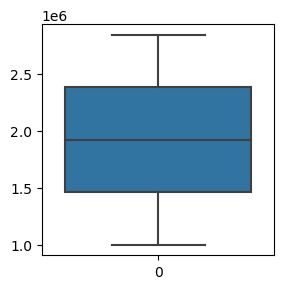

SK_ID_CURR


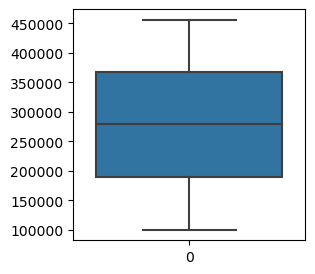

AMT_ANNUITY


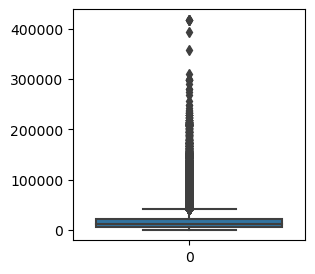

AMT_APPLICATION


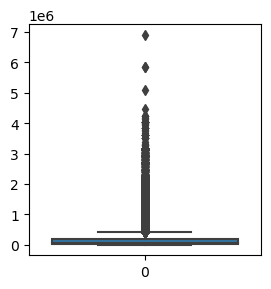

AMT_CREDIT


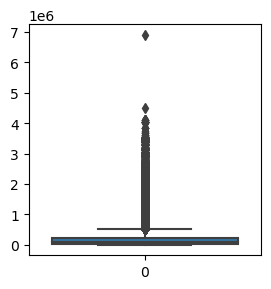

AMT_GOODS_PRICE


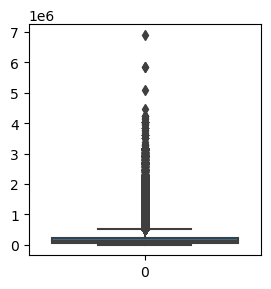

HOUR_APPR_PROCESS_START


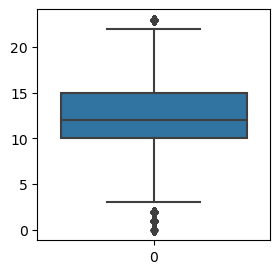

NFLAG_LAST_APPL_IN_DAY


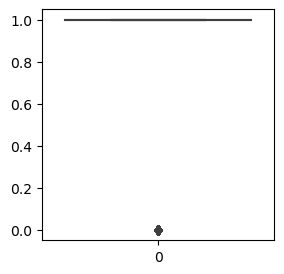

DAYS_DECISION


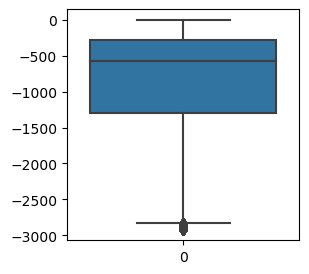

SELLERPLACE_AREA


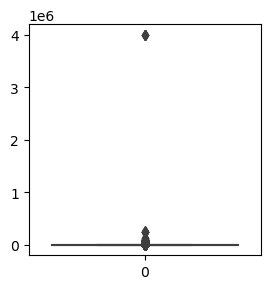

CNT_PAYMENT


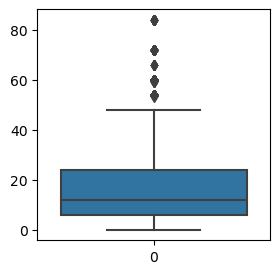

DAYS_FIRST_DRAWING


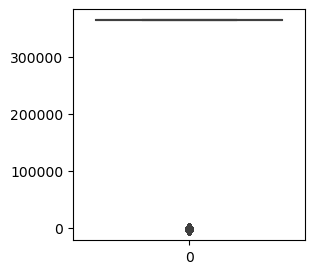

DAYS_FIRST_DUE


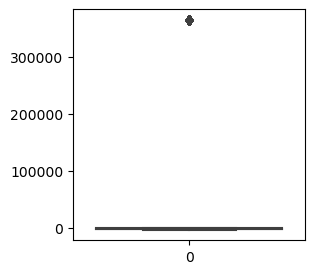

DAYS_LAST_DUE_1ST_VERSION


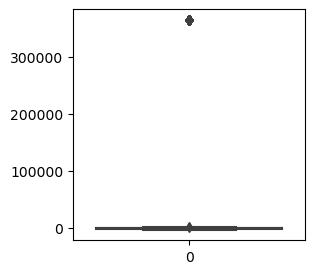

DAYS_LAST_DUE


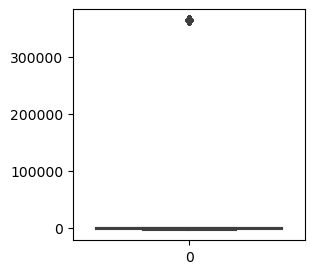

DAYS_TERMINATION


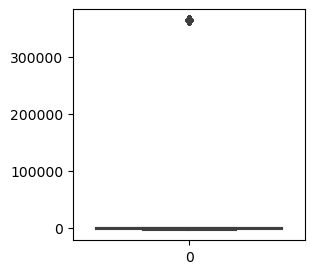

NFLAG_INSURED_ON_APPROVAL


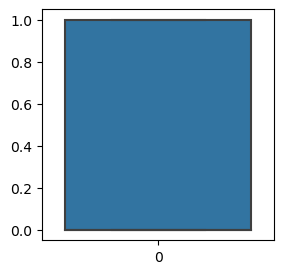

In [148]:
#outlier check
cols=df_previous_application.describe().columns
for i in cols:
    print(i)
    plt.figure(figsize=(3,3))
    sns.boxplot(df_previous_application[i])
    plt.show()

In [149]:
print(df_application_data.shape)
print(df_previous_application.shape)

(307505, 75)
(1670214, 33)


### Univariate Analysis

In [150]:
#Checking the percentage of value counts of column CONTRACT_STATUS
df_previous_application['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

<Axes: ylabel='NAME_CONTRACT_STATUS'>

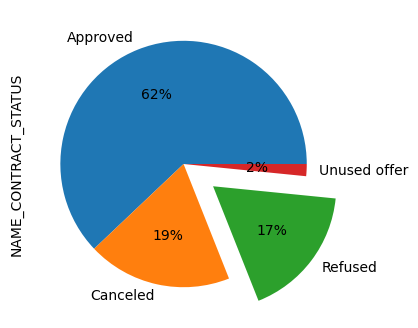

In [151]:
#pie chart for checking distribution of NAME_CONTRACT_STATUS
plt.figure(figsize=(4,4))
explode = [0, 0, 0.3, 0]
df_previous_application['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.pie(autopct='%.0f%%',explode=explode)

Highest percentage of NAME_CONTRACT_STATUS in applications are ‘Approved’ and lowest are ‘Unused Offer’

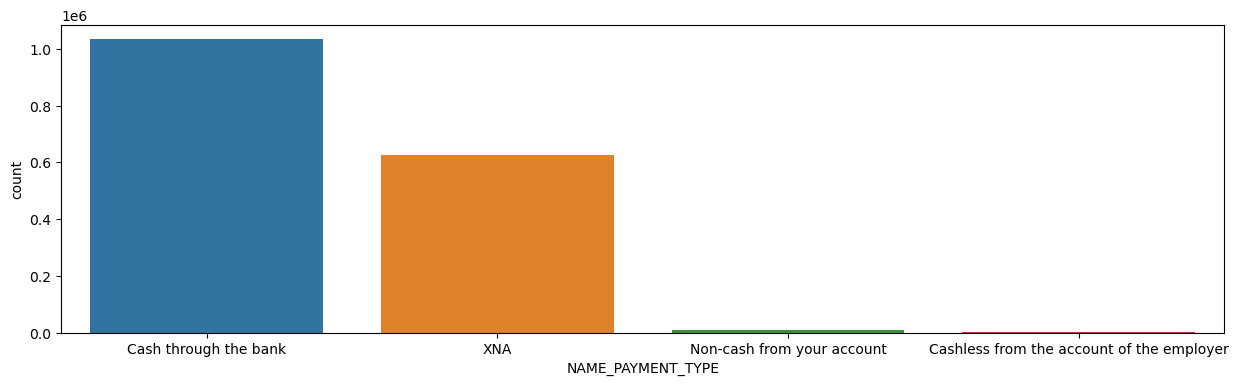

In [152]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_previous_application,x='NAME_PAYMENT_TYPE')
plt.show()

In [153]:
df_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801    25.920548        1.745205   
1                    0.003541    45.931507        3.254795   
2                    0.010032    52.180822        0.616438   
3                    0.008019    52.068493        8.326027   
4                    0.028663    54.608219        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0            9.994521          5.808219           1               1   
1            3.249315          0.797260           1               1   
2           11.671233          6.934247           1               1   
3           26.939726          6.676712           1               1   
4           11.810959          9.473973           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0      Core staff   
2                1                 1           1           0        Laborers   
3                0                 1           0           0        Laborers   
4                0                 1           0           0      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                 

Maximum Number of Payments in Previous applications are done with 'Cash through Bank' and lowest with 'Cashless from account'

### BiVariate Analysis

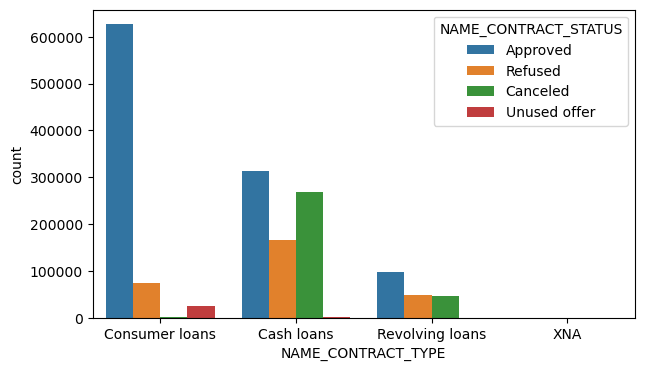

In [154]:
#Checking Contract Type against Contract Status
plt.figure(figsize=(7,4))
sns.countplot(data=df_previous_application,x='NAME_CONTRACT_TYPE',hue= 'NAME_CONTRACT_STATUS')
plt.show()

Major chunk of consumer loans were approved compared to other contract status & also types of loans.
In case of Cah loans, ratio of Approvals to Cancellation is more compared to other loans

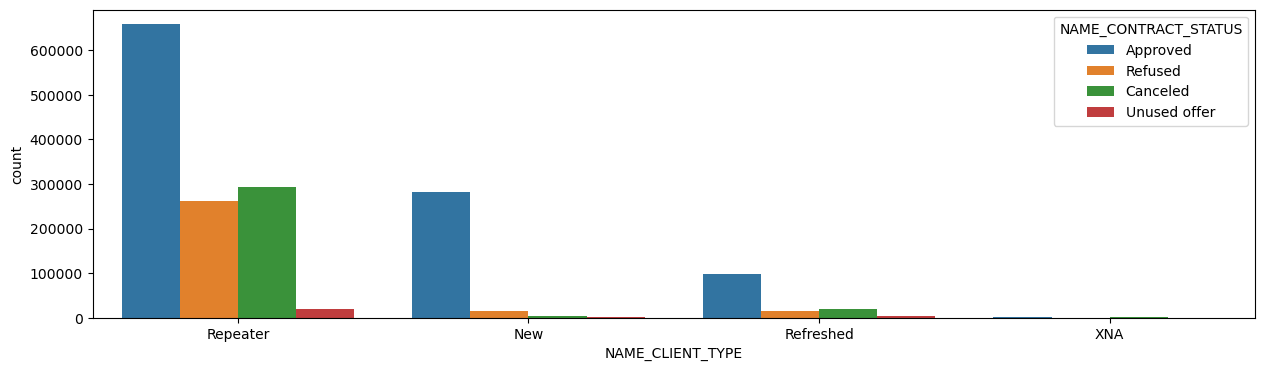

In [155]:
#Checking Gender against Contract Status
plt.figure(figsize=(15,4))
sns.countplot(data=df_previous_application,x='NAME_CLIENT_TYPE',hue= 'NAME_CONTRACT_STATUS')
plt.show()

Among all types of clients, repeaters are highest. Also cancellations are more than loan refusals.
Leaving XNA category, Refreshed client type has the lowest percentage amoung all client types.

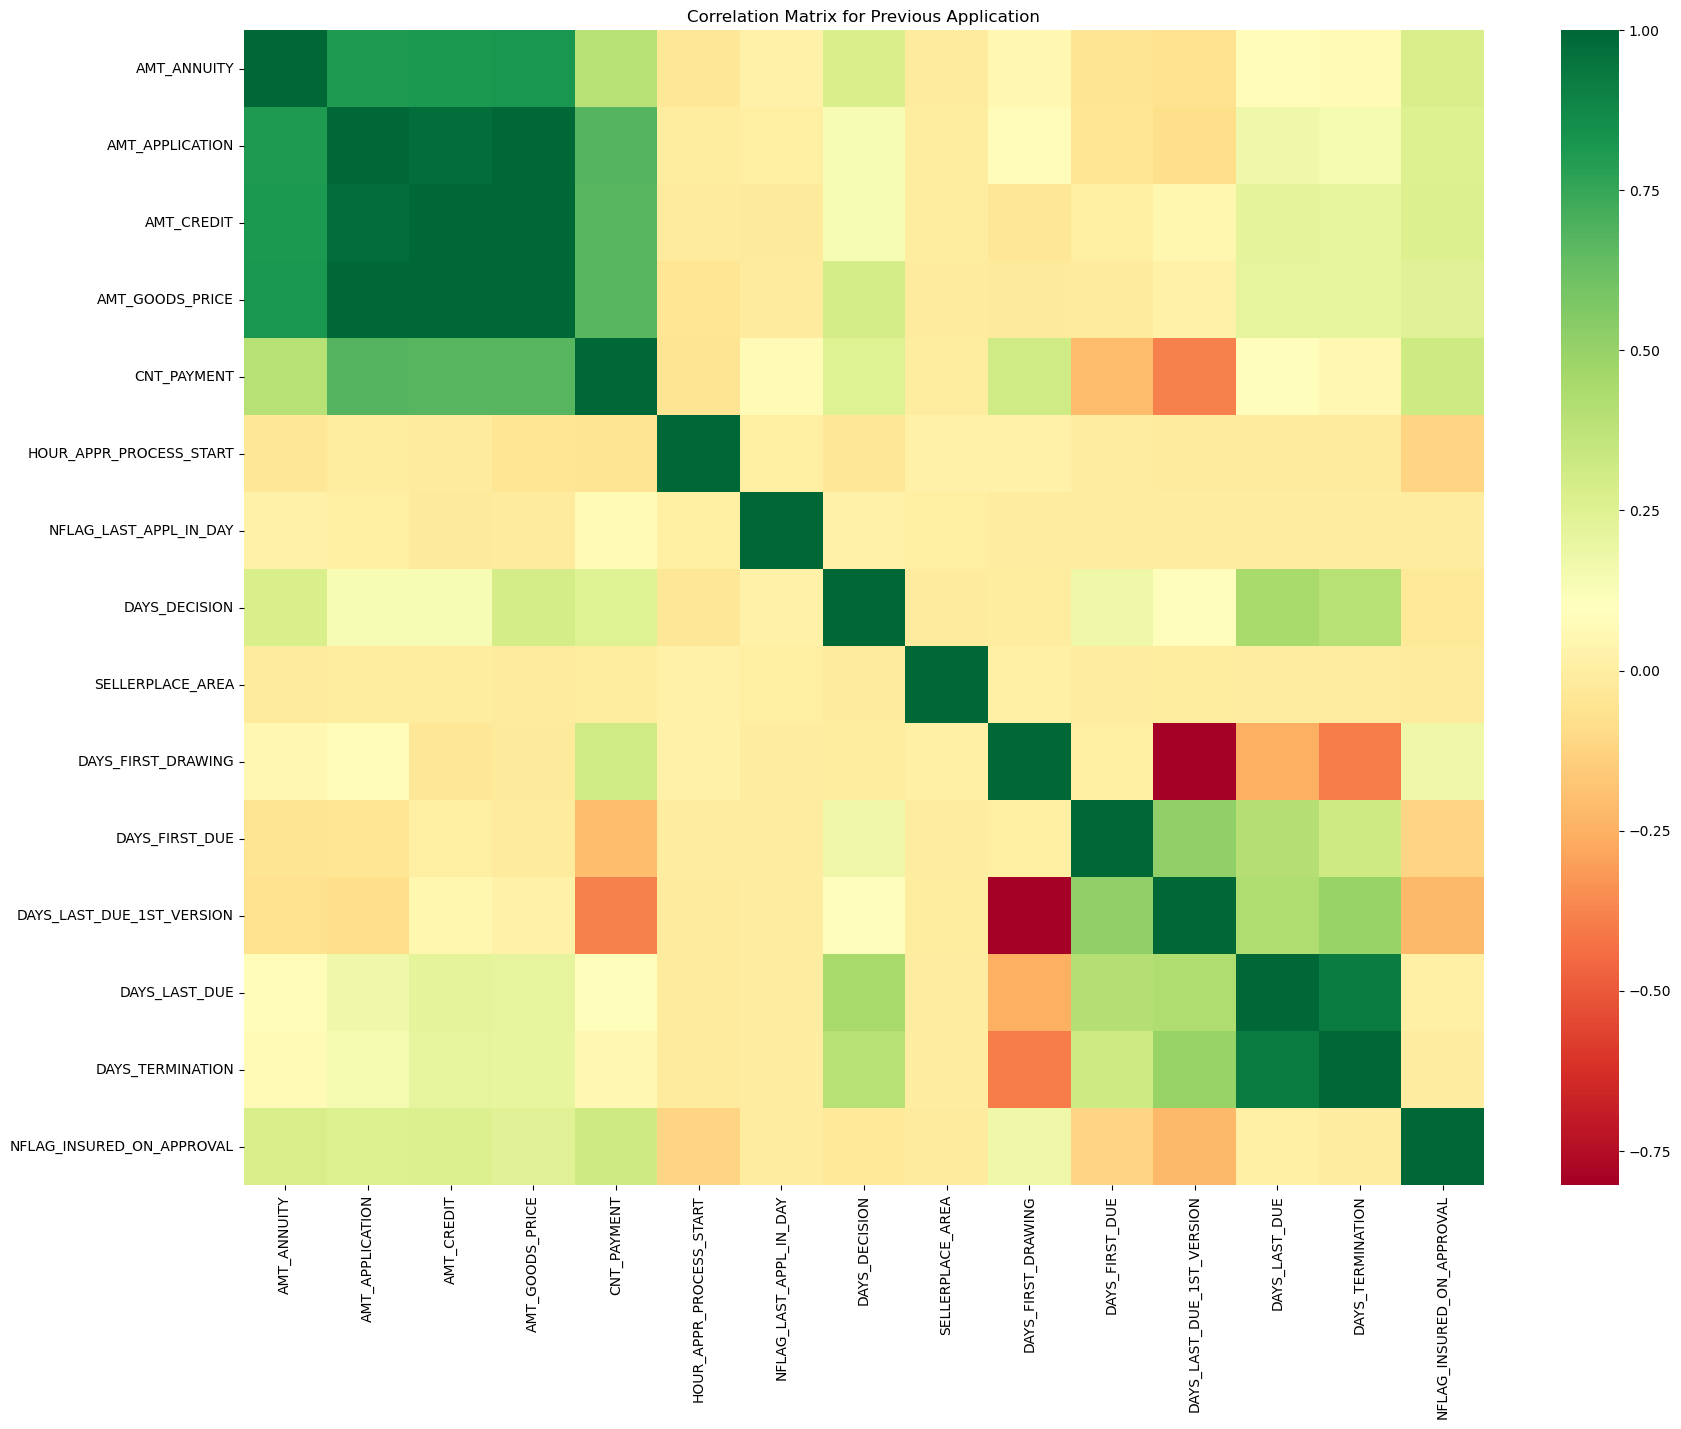

In [156]:
cols=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT',
'HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA'
,'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
'DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']

plt.figure(figsize=(20,15))
sns.heatmap(df_previous_application[cols].corr() ,cmap='RdYlGn')
plt.title('Correlation Matrix for Previous Application')

plt.show()

In [157]:
##Order of Correlation between numerical variables
previous_application_corr= df_previous_application.corr().unstack().sort_values(ascending=False).drop_duplicates()
print(Target1_corr.head(10))
print(Target1_corr.tail(10))

SK_ID_CURR                   SK_ID_CURR                     1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998382
AMT_CREDIT                   AMT_GOODS_PRICE                0.986736
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878869
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.858342
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.825574
AMT_ANNUITY                  AMT_GOODS_PRICE                0.774835
                             AMT_CREDIT                     0.770124
dtype: float64
HOUR_APPR_PROCESS_START     REGION_RATING_CLIENT          -0.285697
EXT_SOURCE_2                REGION_RATING_CLIENT_W_CITY   -0.288011
REGION_RATING_CLIENT        EXT_SOURCE_2                  -0.292619
CNT_CHILDREN                YEARS_BIRTH                   -0.331448
FLAG_DOCUMENT_8        

Highest co-relationship is between 'AMT_CREDIT','AMT_GOODS_PRICE' and 'AMT_APPLICATION'
DAYS_LAST_DUE & DAYS_TERMINATION have good correlation
DAYS_LAST_DUE_1ST_VERSION & DAYS_FIRST_DRAWING has poor correlation between them.

## Datasets Merging

In [158]:
#Merging both application and previous application datasets
df_application_data_merge= pd.merge(left=df_application_data,right=df_previous_application,how='inner',
                                    on=['SK_ID_CURR'])
df_application_data_merge.shape

(1413638, 107)

In [159]:
df_application_data_merge.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801    25.920548        1.745205   
1                    0.003541    45.931507        3.254795   
2                    0.003541    45.931507        3.254795   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0            9.994521          5.808219           1               1   
1            3.249315          0.797260           1               1   
2            3.249315          0.797260           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0      Core staff   
2                0                 1           1           0      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              2.0                     1                            1   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.622246      0.535276                       1.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       1.0   

   DEF_60_CNT_SOCIAL_CIRCLE  YEARS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                       2.0                 3.106849                0   
1                       0.0                 2.2

### Univariate Analysis(Merged Dataset)

In [160]:
#Checking the percentage of value counts of column CONTRACT_STATUS
df_application_data_merge['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.680050
Canceled        18.352223
Refused         17.356990
Unused offer     1.610738
Name: NAME_CONTRACT_STATUS, dtype: float64

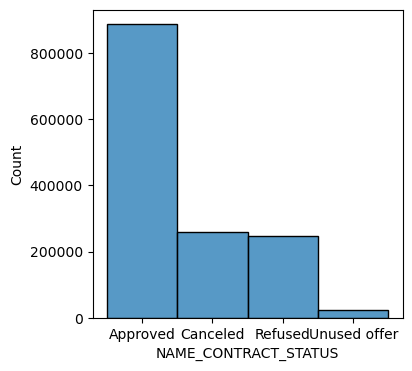

In [161]:
#Plotting the histogram to check the frequency of CONTRACT_STATUS
plt.figure(figsize=(4,4))
sns.histplot(df_application_data_merge['NAME_CONTRACT_STATUS'] )
plt.show()

In [162]:
cols=df_previous_application.select_dtypes(include=['object']).columns.tolist()
for i in cols:
    print(df_previous_application[i].value_counts())

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                     

In [163]:
df_application_data_merge[~(df_application_data_merge['NAME_CONTRACT_TYPE_y']=='XNA')]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1413633      456255       0           Cash loans           F            N   
1413634      456255       0           Cash loans           F            N   
1413635      456255       0           Cash loans           F            N   
1413636      456255       0           Cash loans           F            N   
1413637      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0          202500.0      406597.5   
1                     N             0          270000.0     1293502.5   
2                     N             0          270000.0     1293502.5   
3                     N             0          270000.0     1293502.5   
4                     Y             0           67500.0      135000.0   
...                 ...           ...               ...           ...   
1413633               N             0          157500.0      675000.0   
1413634               N             0          157500.0      675000.0   
1413635               N             0          157500.0      675000.0   
1413636               N             0          157500.0      675000.0   
1413637               N             0          157500.0      675000.0   

         AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
0              24700.5           351000.0     Unaccompanied   
1              35698.5          1129500.0            Family   
2              35698.5          1129500.0            Family   
3              35698.5          1129500.0            Family   
4               6750.0           135000.0     Unaccompanied   
...                ...                ...               ...   
1413633        49117.5           675000.0     Unaccompanied   
1413634        49117.5           675000.0     Unaccompanied   
1413635        49117.5           675000.0     Unaccompanied   
1413636        49117.5           675000.0     Unaccompanied   
1413637        49117.5           675000.0     Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
...                       ...                            ...   
1413633  Commercial associate               Higher education   
1413634  Commercial associate               Higher education   
1413635  Commercial associate               Higher education   
1413636  Commercial associate               Higher education   
1413637  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0        Single / not married  House / apartment                    0.018801   
1                     Married  House / apartment                    0.003541   
2                     Married  House / apartment                    0.003541   
3                     Married  House / apartment                    0.003541   
4        Single / not married  House / apartment                    0.010032   
...                       ...                ...                         ...   
1413633               Married  House / apartment                    0.046220   
1413634               Married  House / ap

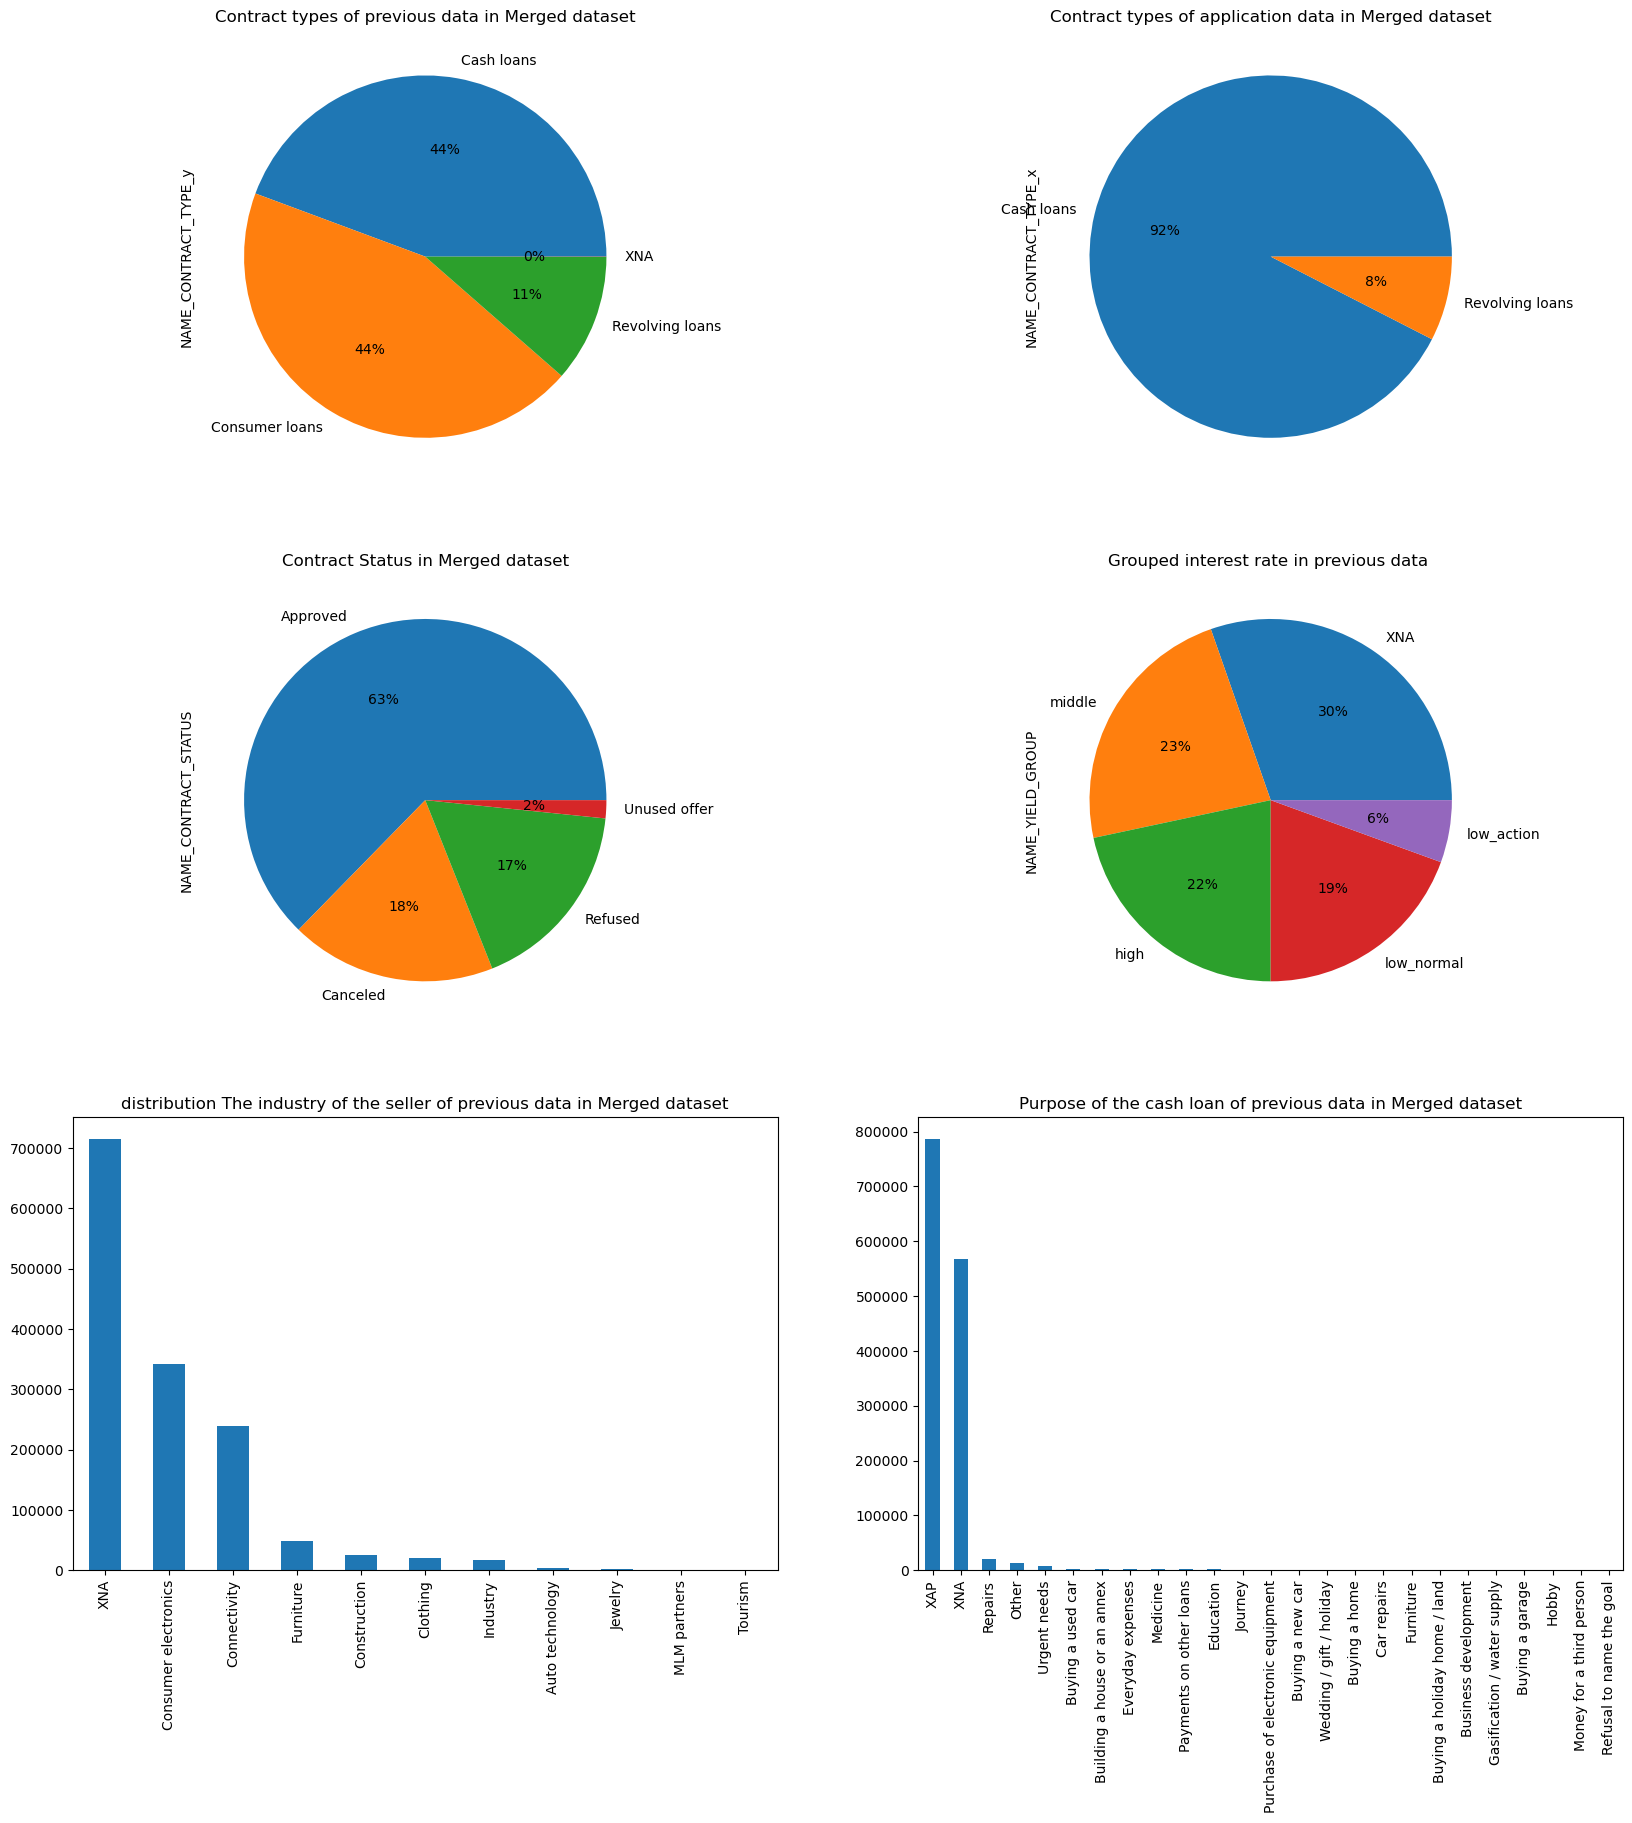

In [164]:
plt.figure(figsize = [20, 20])

plt.subplot(3,2,1)
plt.title("Contract types of previous data in Merged dataset")
df_application_data_merge['NAME_CONTRACT_TYPE_y'].value_counts().plot.pie(autopct = "%1.0f%%")

plt.subplot(3,2,2)
plt.title("Contract types of application data in Merged dataset")
df_application_data_merge["NAME_CONTRACT_TYPE_x"].value_counts().plot.pie(autopct = "%1.0f%%")

plt.subplot(3,2,3)
plt.title("Contract Status in Merged dataset")
df_application_data_merge["NAME_CONTRACT_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%")

plt.subplot(3,2,4)
plt.title("Grouped interest rate in previous data ")
df_application_data_merge["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.0f%%")

plt.subplot(3,2,5)
plt.title("distribution The industry of the seller of previous data in Merged dataset")
df_application_data_merge["NAME_SELLER_INDUSTRY"].value_counts().plot.bar()

plt.subplot(3,2,6)
plt.title("Purpose of the cash loan of previous data in Merged dataset")
df_application_data_merge["NAME_CASH_LOAN_PURPOSE"].value_counts().plot.bar()

plt.show()

Cash Loans are more in application dataset than Previous dataset.
Consumer Loans are not present in application dataset
Compared to previous dataset, Revolving Loans have decreased in application dataset.

For status of Contracts, 'Approved' status has the highest occurence and 'Unused offer' has lowest.
Among 'Grouped interest rate' medium category has highest percentage in the merged dataset.

'Consumer Electronics' is on top & 'Tourism' is lowest in 'industry of the seller' in Merged dataset
Customers top Purpose of the cash loan is 'Repairs' in Merged dataset"

### BiVariate Analysis(Merged Dataset)

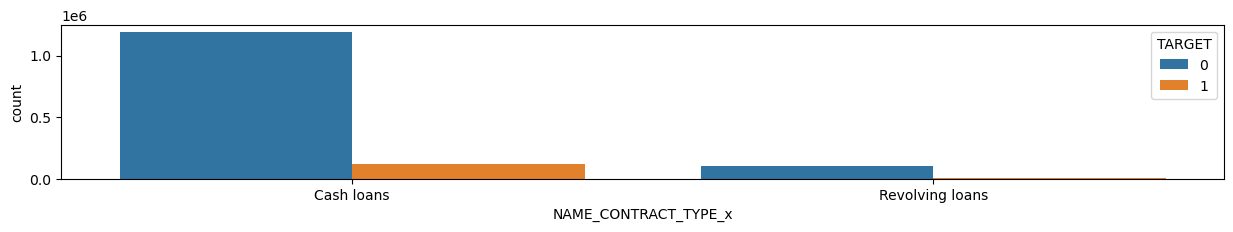

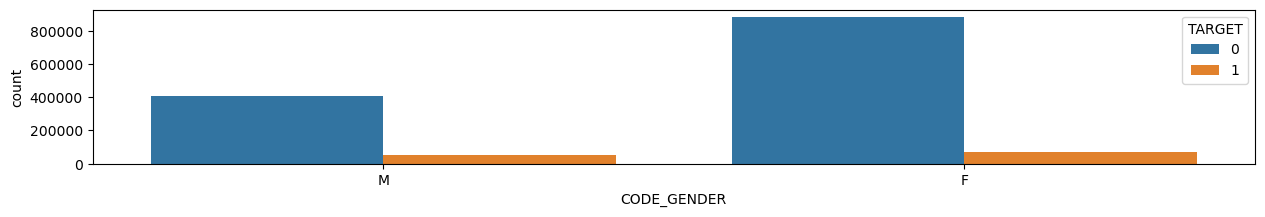

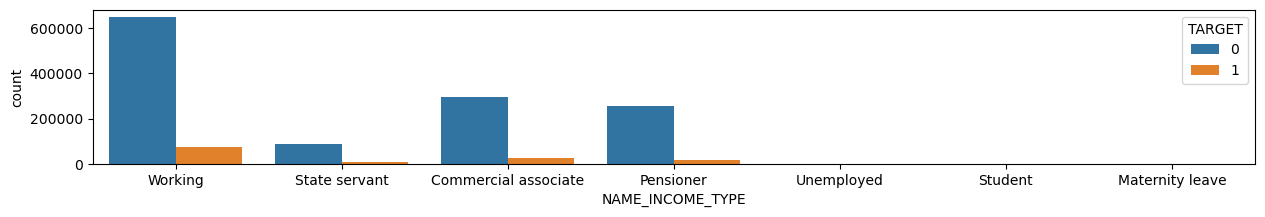

In [165]:
cols=['NAME_CONTRACT_TYPE_x','CODE_GENDER','NAME_INCOME_TYPE']
for i in cols:
    plt.figure(figsize=(15,2))
    sns.countplot(data=df_application_data_merge,x=i,hue='TARGET')
    plt.show()

Customers with/without payment difficulties prefer cash loans over revolving loans
Female clients are the best repayers of loan compared to Males.
Customers are mostly 'Working' in both with/without payment difficulties

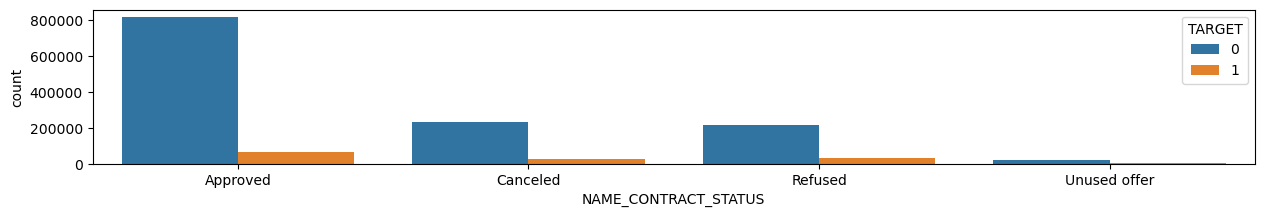

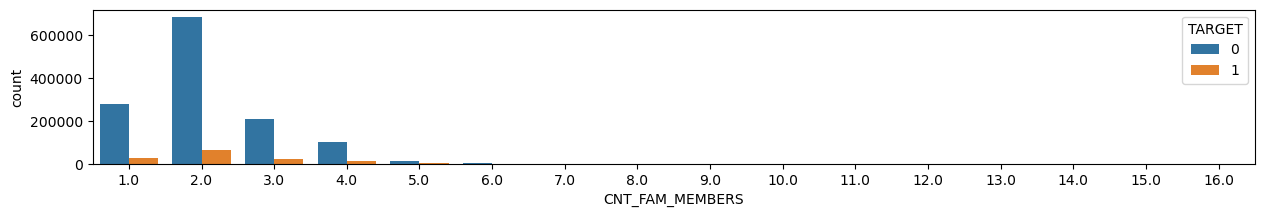

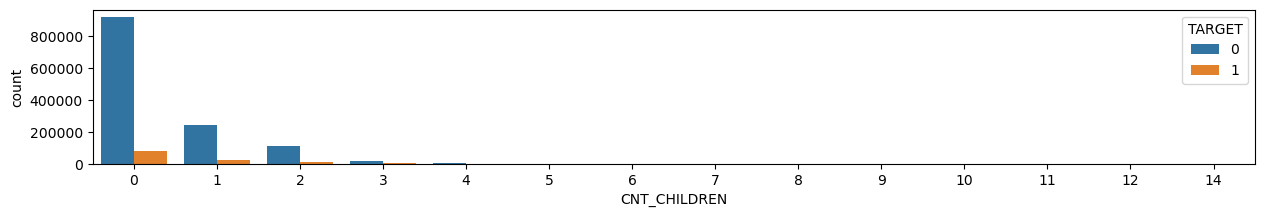

In [166]:
#Countplot to show Contract STatus,N of family memebers & children Vs Target type
cols=['NAME_CONTRACT_STATUS','CNT_FAM_MEMBERS','CNT_CHILDREN']
for i in cols:
    plt.figure(figsize=(15,2))
    sns.countplot(data=df_application_data_merge,x=i,hue='TARGET')
    plt.show()

Customers having approved previous loan have less payment difficulty ,so are better candidates for new loan.
Customers whose earlier loan was Refused/Cancelled have more chances to default.

Customers with/without payment difficulties have majorly 2 family members.

The majority in both cases of with/without payment difficulties, have zero children.
Customers with more than 2 children have less difficulty in making payments.


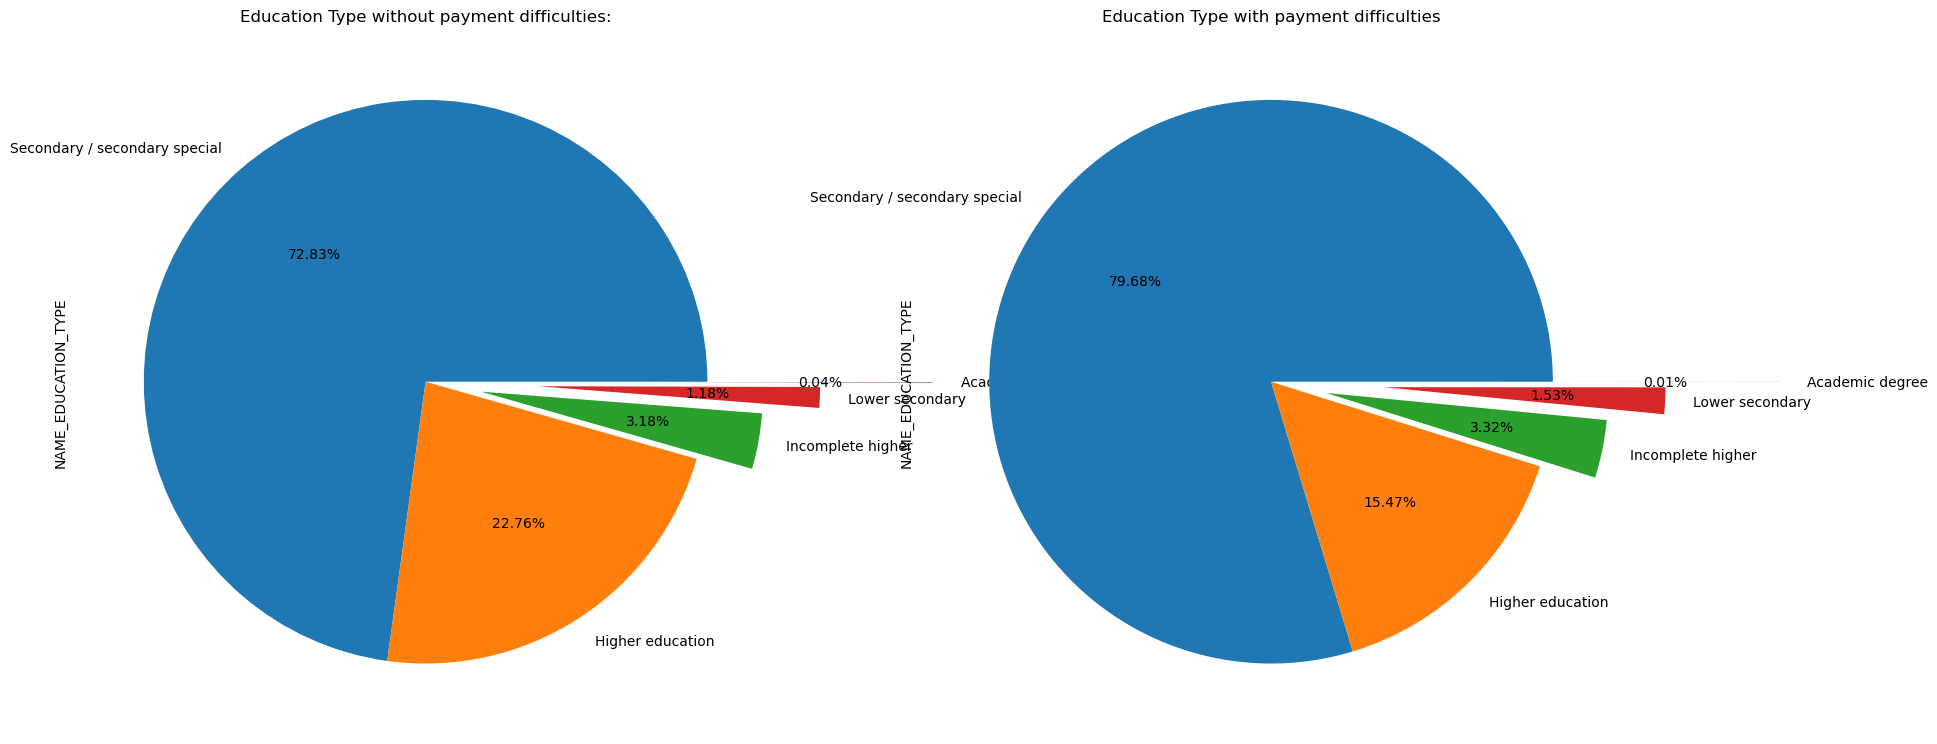

In [167]:
#Distribution by NAME_EDUCATION_TYPE
explode = [0, 0.0, 0.2, 0.4, 0.8]

plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.title("Education Type without payment difficulties:")
df_application_data_merge[df_application_data_merge["TARGET"] == 0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(autopct = "%1.02f%%", explode = explode)

plt.subplot(1,2,2)
plt.title("Education Type with payment difficulties")
df_application_data_merge[df_application_data_merge["TARGET"] == 1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(autopct = "%1.02f%%", explode = explode)

plt.show()

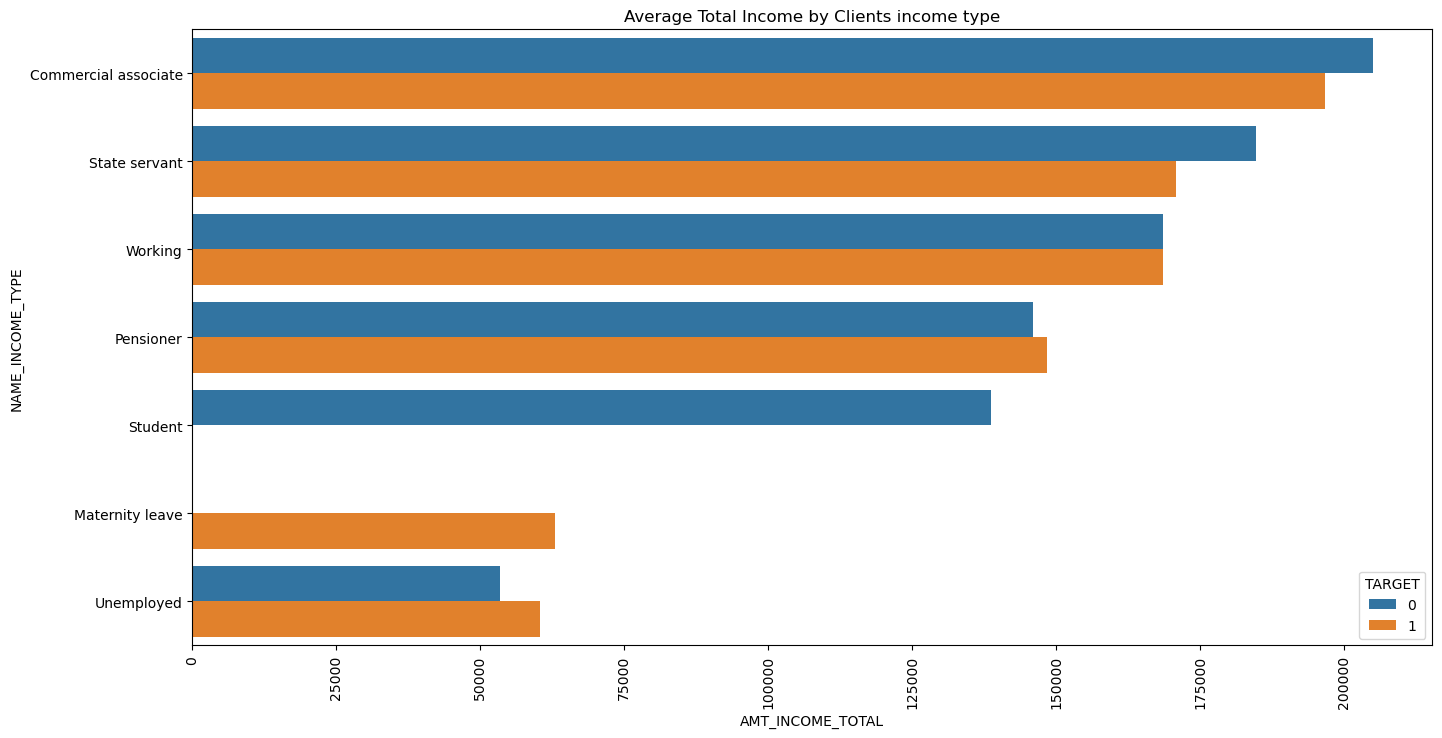

In [168]:
#Bar Plot to show Total Income Average by Clients income type
df_temp = df_application_data_merge.groupby(['TARGET','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL', ascending = False)
fig = plt.figure(figsize = (16, 8))

ax = sns.barplot(data = df_temp,y='NAME_INCOME_TYPE',x='AMT_INCOME_TOTAL', hue='TARGET')
plt.title("Average Total Income by Clients income type")
plt.xticks(rotation=90)
plt.show()

'Commercial Associates' have majority in cases of With/Without Payment difficulty.
Students don't have any payment difficulties
All Customers on Maternity leave are having Payment difficulty.

<Figure size 6000x6000 with 0 Axes>

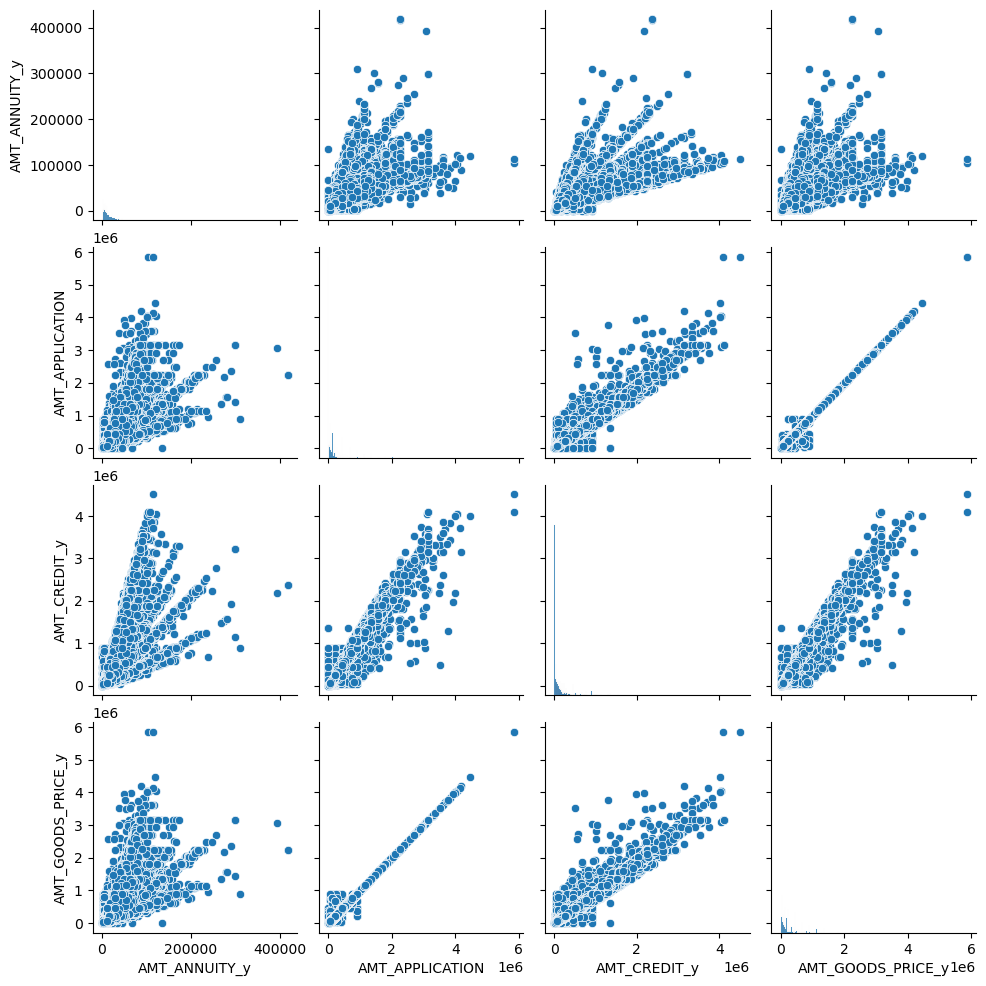

In [169]:
##Pair plot for checking relationship between numerical columns combinations
cols=['AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y']

plt.figure(figsize=(60,60))
sns.pairplot(df_application_data_merge[cols])
plt.show()

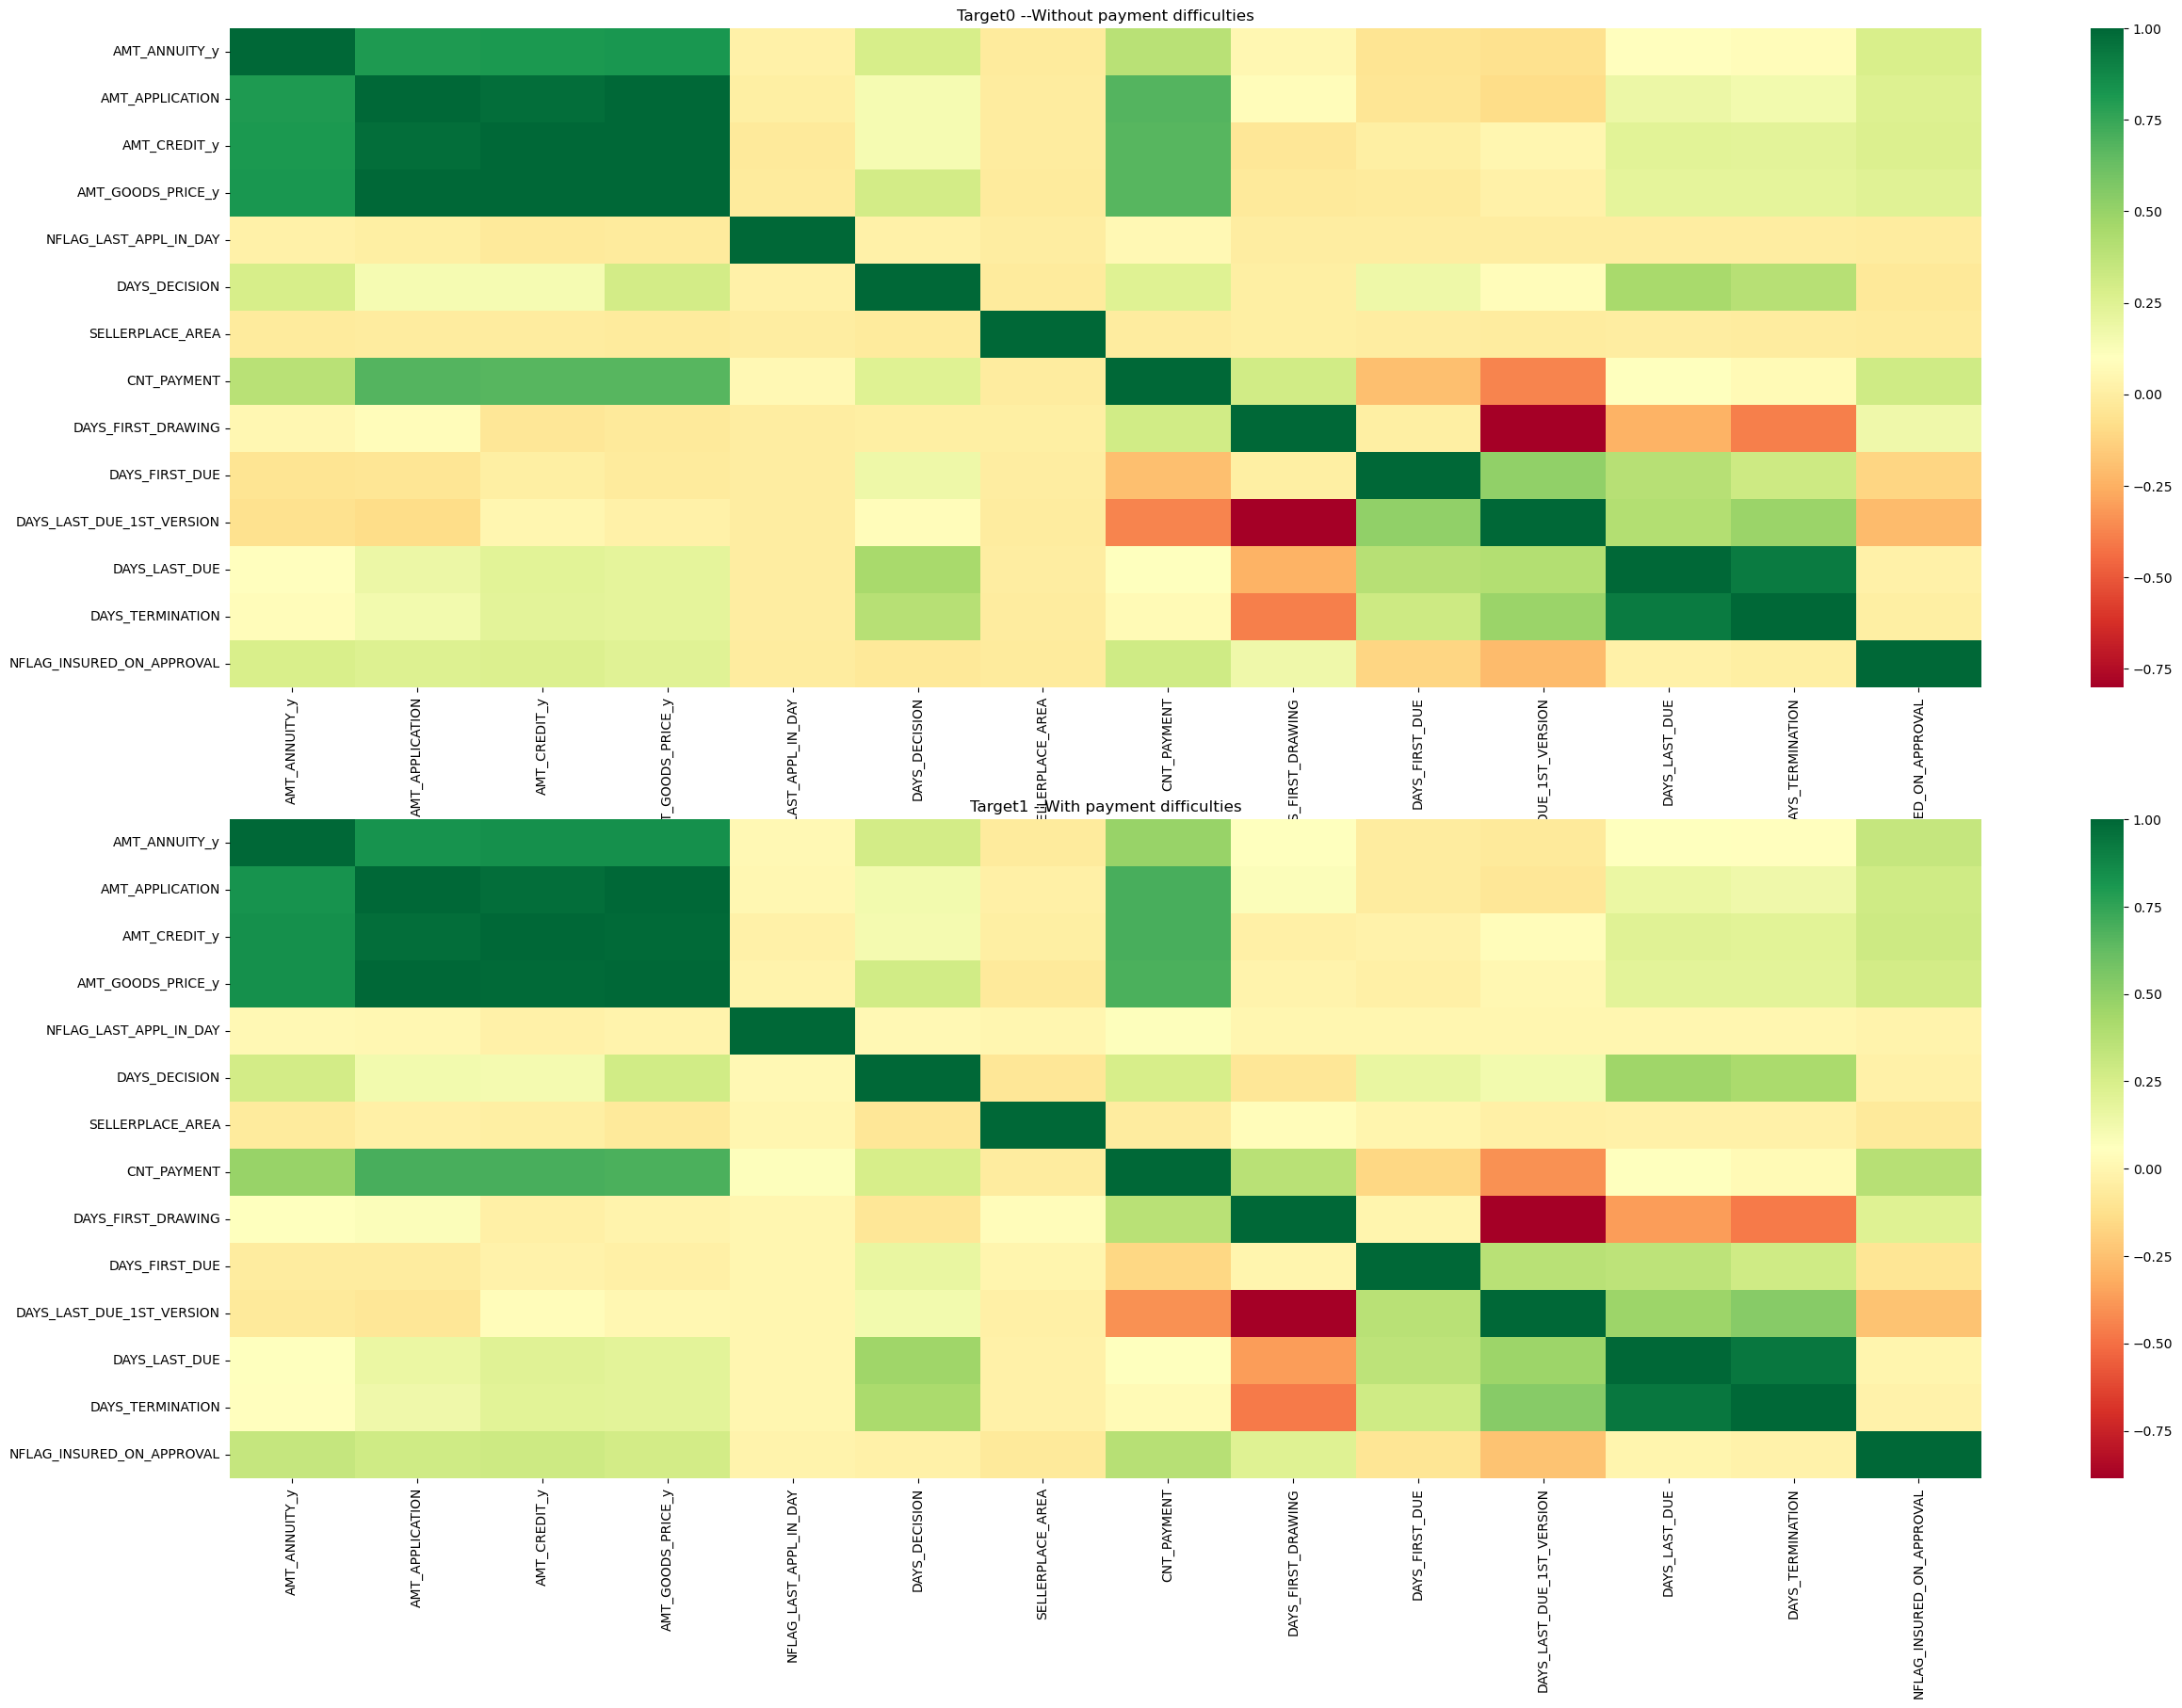

In [170]:
#Plotting heat map to check correlation
cols=['AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
sns.heatmap(df_application_data_merge[df_application_data_merge['TARGET']==0][cols].corr(),cmap='RdYlGn')
plt.title('Target0 --Without payment difficulties')

plt.subplot(2,1,2)
sns.heatmap(df_application_data_merge[df_application_data_merge['TARGET']==1][cols].corr(),cmap='RdYlGn')
plt.title('Target1 --With payment difficulties')

plt.show()

There is high corelation between AMT_GOODS_PRICE--AMT_APPLICATION & AMT_CREDIT--AMT_GOODS_PRICE for previous applications.
CNT_FAM_MEMBERS & CNT_CHILDREN are also highly correlated implying customer having more family members are having more children as well.
'client's permanent address does not match work address' is related well to 'client's contact address does not match work address'

Relative to application date of current application there is Low relationship between when was the first due and first disbursement of the previous application

In [171]:
# Finding the top & Bottom correlated columns
merge_corr= df_application_data_merge.corr().unstack().sort_values(ascending = False).drop_duplicates()

print(merge_corr.head(10))
print(merge_corr.tail(10))

SK_ID_CURR                   SK_ID_CURR                     1.000000
AMT_GOODS_PRICE_y            AMT_APPLICATION                0.999871
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998502
AMT_CREDIT_y                 AMT_GOODS_PRICE_y              0.993201
AMT_GOODS_PRICE_x            AMT_CREDIT_x                   0.986116
AMT_APPLICATION              AMT_CREDIT_y                   0.975683
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.945596
DAYS_LAST_DUE                DAYS_TERMINATION               0.927738
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878959
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.875505
dtype: float64
DAYS_LAST_DUE_1ST_VERSION   CNT_PAYMENT                   -0.377533
DAYS_TERMINATION            DAYS_FIRST_DRAWING            -0.396472
FLAG_DOCUMENT_8             FLAG_DOCUMENT_3               -0.476653
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY   -0.515888
REGION_RATING_CLIENT   

### INSIGHTS:
All Female customers on maternity leave have payment difficulties and are highly doubtful to default ,therefore should NOT be targeted.

Commercial Associates, State Servants & Students have less payment difficulties and so should be targeted for loans.

Females should be given preference as they have good repayment percentage over Males.

Customers having Revolving loans have very negligible payment difficulties, making them GOOD target.

Customers with no children have less difficulty in making payments and should be targeted MORE by the bank.

Customers having approved previous loan have less payment difficulty ,so are better candidates for new loan.

Customers whose earlier loan was Refused/Cancelled have more chances to default.

Majority of customers of age group <40 are having payment difficulties so Bank should target older people i.e. >40 as they are good in repayments.

Customers with Secondary Education, are likely to have payment difficulties more than other Education types.

Customers having Lower Income(<60K) are facing payment difficulties more compared to Higher Income Group.
